# 0 Load data

In [4]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# all the dataframes are clipped to the US states 


df_economic = pd.read_csv('data/US_data/df_economic.csv')
df_weight = pd.read_csv('data/US_data/df_weight.csv')
df_strategies = pd.read_csv('data/US_data/df_strategies.csv')
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')
df_pv_npv = pd.read_csv('data/US_data/df_pv_npv.csv')
df_agricultural_npv = pd.read_csv('data/US_data/df_agricultural_npv.csv')
df_afforestation_npv = pd.read_csv('data/US_data/df_afforestation_npv.csv')
df_natural_npv = pd.read_csv('data/US_data/df_natural_npv.csv')
df_pixel_optimized_data = pd.read_csv('data/US_data/df_pixel_optimized_data.csv')
df_mlp_scores = pd.read_csv('data/US_data/df_mlp_scores.csv')

us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

In [4]:
df_pixel_optimized_data

lon        lat       avg_npv  predicted_prob  \
0     -124.370834  47.954166 -9.371520e+05        0.045891   
1     -124.212500  40.570835  5.553589e+04        0.968293   
2     -124.204170  40.562500  1.223183e+04        0.960158   
3     -123.679170  48.120834 -1.048014e+06        0.277199   
4     -123.629166  48.120834 -1.145627e+06        0.229049   
...           ...        ...           ...             ...   
64977  -67.829170  46.887500 -9.098034e+05        0.999332   
64978  -67.829170  46.920834 -9.480477e+05        0.999058   
64979  -67.812500  46.312500 -9.327203e+05        0.999880   
64980  -67.804170  46.762500 -9.530168e+05        0.999813   
64981  -67.795830  46.320835 -9.298485e+05        0.999882   

       Expectation_net_benefit  optimal_weight_economic  \
0                  3586.953880             1.000000e+00   
1                  4761.501756             0.000000e+00   
2                  4719.930203             4.475587e-16   
3                  3627.954974             4.163336e-16   
4                  3521.462384             0.000000e+00   
...                        ...                      ...   
64977              4014.829581             0.000000e+00   
64978              3966.378972             0.000000e+00   
64979              3986.595370             0.000000e+00   
64980              4000.470365             0.000000e+00   
64981              3989.340489             5.551115e-17   

       optimal_weight_environmental  optimal_weight_emission  ccd_optimized  \
0                               0.0             3.747003e-16       0.367652   
1                               1.0             0.000000e+00       0.889508   
2                               1.0             0.000000e+00       0.883643   
3                               1.0             5.412337e-16       0.401518   
4                               1.0             0.000000e+00       0.384378   
...                             ...                      ...            ...   
64977                           1.0             2.775558e-17       0.757982   
64978                           1.0             0.000000e+00       0.750965   
64979                           1.0             0.000000e+00       0.753910   
64980                           1.0             0.000000e+00       0.753451   
64981                           1.0             0.000000e+00       0.754358   

       coupling_degree  coordination_degree  weight_deviation_economic  \
0             0.996364             0.135661                   0.666667   
1             0.982499             0.805318                  -0.333333   
2             0.978133             0.798280                  -0.333333   
3             0.987139             0.163317                  -0.333333   
4             0.990424             0.149175                  -0.333333   
...                ...                  ...                        ...   
64977         0.691778             0.830521                  -0.333333   
64978         0.679202             0.830309                  -0.333333   
64979         0.684019             0.830942                  -0.333333   
64980         0.683229             0.830891                  -0.333333   
64981         0.684832             0.830944                  -0.333333   

       weight_deviation_environmental  weight_deviation_emission  \
0                           -0.333333                  -0.333333   
1                            0.666667                  -0.333333   
2                            0.666667                  -0.333333   
3                            0.666667                  -0.333333   
4                            0.666667                  -0.333333   
...                               ...                        ...   
64977                        0.666667                  -0.333333   
64978                        0.666667                  -0.333333   
64979                        0.666667                  -0.333333   
64980                        0.666667     

# 1 Generate csv for US state 

Logic is: 

to generate cvs for US state, this csv is like 

ÂØπ‰∫épv installedÔºå Environmental suitability /ha Ôºå Emission mitigation / ha ÔºåEconomic NPV /ha ÔºåPower generation / ha„ÄÇ

first, group state  'area_m2' use sum , this is variable [abandoned land (ha) ] for each state 

second, for each state and use 'predicted_prob' * 'area_m2' in every row, and sum them to calculate cumulative , 

finally, next use this sum/[abandoned land (ha) ] to caculate averge effect in each state 



| State name | abandoned land (ha) | pv installed  | Environmental suitability /ha | Emission mitigation / ha | Economic NPV /ha| Power generation /ha  | CCD Mean improvement |
|------------|---------------------|--------------|--------------------|-----------------|--------------|--------------|--------------|
|   Row1     |   Row1              |   Row1       |   Row1             |   Row1          |   Row1       |   Row1       |   Row1       |
|   Row2     |   Row2              |   Row2       |   Row2             |   Row2          |   Row2       |   Row2       |   Row2       |


In [6]:
df_pixel_optimized_data.loc[(df_pixel_optimized_data['lat'] == 25.295834) & (df_pixel_optimized_data['lon'] == -80.287500), 'Expectation_net_benefit']

57294    4758.781908
Name: Expectation_net_benefit, dtype: float64

## 1.1 Adjust PV carbon density (Important)

In [47]:
df_pixel_optimized_data

lon        lat       avg_npv  predicted_prob  \
0     -124.370834  47.954166 -9.371520e+05        0.045891   
1     -124.212500  40.570835  5.553589e+04        0.968293   
2     -124.204170  40.562500  1.223183e+04        0.960158   
3     -123.679170  48.120834 -1.048014e+06        0.277199   
4     -123.629166  48.120834 -1.145627e+06        0.229049   
...           ...        ...           ...             ...   
64977  -67.829170  46.887500 -9.098034e+05        0.999332   
64978  -67.829170  46.920834 -9.480477e+05        0.999058   
64979  -67.812500  46.312500 -9.327203e+05        0.999880   
64980  -67.804170  46.762500 -9.530168e+05        0.999813   
64981  -67.795830  46.320835 -9.298485e+05        0.999882   

       Expectation_net_benefit  optimal_weight_economic  \
0                  3586.953880             1.000000e+00   
1                  4761.501756             0.000000e+00   
2                  4719.930203             4.475587e-16   
3                  3627.954974             4.163336e-16   
4                  3521.462384             0.000000e+00   
...                        ...                      ...   
64977              4014.829581             0.000000e+00   
64978              3966.378972             0.000000e+00   
64979              3986.595370             0.000000e+00   
64980              4000.470365             0.000000e+00   
64981              3989.340489             5.551115e-17   

       optimal_weight_environmental  optimal_weight_emission  ccd_optimized  \
0                               0.0             3.747003e-16       0.367652   
1                               1.0             0.000000e+00       0.889508   
2                               1.0             0.000000e+00       0.883643   
3                               1.0             5.412337e-16       0.401518   
4                               1.0             0.000000e+00       0.384378   
...                             ...                      ...            ...   
64977                           1.0             2.775558e-17       0.757982   
64978                           1.0             0.000000e+00       0.750965   
64979                           1.0             0.000000e+00       0.753910   
64980                           1.0             0.000000e+00       0.753451   
64981                           1.0             0.000000e+00       0.754358   

       coupling_degree  coordination_degree  weight_deviation_economic  \
0             0.996364             0.135661                   0.666667   
1             0.982499             0.805318                  -0.333333   
2             0.978133             0.798280                  -0.333333   
3             0.987139             0.163317                  -0.333333   
4             0.990424             0.149175                  -0.333333   
...                ...                  ...                        ...   
64977         0.691778             0.830521                  -0.333333   
64978         0.679202             0.830309                  -0.333333   
64979         0.684019             0.830942                  -0.333333   
64980         0.683229             0.830891                  -0.333333   
64981         0.684832             0.830944                  -0.333333   

       weight_deviation_environmental  weight_deviation_emission  \
0                           -0.333333                  -0.333333   
1                            0.666667                  -0.333333   
2                            0.666667                  -0.333333   
3                            0.666667                  -0.333333   
4                            0.666667                  -0.333333   
...                               ...                        ...   
64977                        0.666667                  -0.333333   
64978                        0.666667                  -0.333333   
64979                        0.666667                  -0.333333   
64980                        0.666667     

In [ ]:
import numpy as np

# ËøôÈáåÊâÄÂêàÂπ∂ÁöÑ‰ø°ÊÅØÂú®initalÁöÑÁâàÊú¨ËæÉ‰∏∫ÂÖ®Èù¢ÔºåÂ¶ÇÊûúËÄÉËôëÂà∞ÂêéÊúüÂëàÁé∞ÈóÆÈ¢òÔºåÁõ¥Êé•DropÂç≥ÂèØ

emission_intensity = pd.DataFrame({
    'year': ['2018',  '2030', '2035', '2040'],
    'CO2_g_per_kWh': [400.3,  302,  279.2, 261.1]
})



df_weight['LNCS_expect'] = (
    df_weight['final_forest'] * df_weight['weighted_density_Forest'] +
    df_weight['final_agro'] * df_weight['weighted_density_Agricultural'] +
    df_strategies['final_veg'] * df_weight['weighted_density_Vegetation']
)

# Êï∞ÊçÆÂ§ÑÁêÜÔºådf_net_benefitÊèêÂèñsitesÁöÑÈù¢ÁßØ‰ø°ÊÅØ„ÄÅÂèëÁîµÈáèÔºàPIXEL‰∏∫Âçï‰ΩçÔºâÔºåpv_potential_densÊòØËΩ¨Âåñ‰∏∫Á¢≥ÁöÑËÆ°ÁÆóÊñπÂºè
# df_weight ÊèêÂèñÁéØÂ¢ÉÂèòÈáè predicted_prob‰∏éExpectation_net_benefit
# df_economic ÊèêÂèñÁªèÊµéÂèòÈáè net_npv_usd
power_data = df_net_benefit[['lat', 'lon', 'area_m2','E_yr_pixel']].copy()
env_data = df_weight[['lat', 'lon', 'predicted_prob','gmm_density','sample_type']].copy()
emission_data = df_weight[['lat', 'lon', 'Expectation_net_benefit','pv_potential_dens','LNCS_expect']].copy()
economic_2050 = df_economic[df_economic['analysis_year'] == 2050]
avg_npv = economic_2050.groupby(['lat', 'lon'])['net_npv_usd'].mean().reset_index()
ccd_data = df_pixel_optimized_data[['lat', 'lon', 'ccd_optimized']].copy()


merged_data_for_analysis = (
    env_data
    .merge(emission_data, on=['lat', 'lon'], how='outer')
    .merge(avg_npv, on=['lat', 'lon'], how='outer')
    .merge(power_data, on=['lat', 'lon'], how='outer')
    .merge(ccd_data, on=['lat', 'lon'], how='outer')
)



In [ ]:
# Transform pv_transform (2020 emission factor) to 2030, 2040, 2050 using emission_intensity
pv_transform_2020 = 352  
# Interpolate emission intensity for 2020, 2030, 2040, 2050
years_target = [2020, 2030, 2040, 2050]
em_factors = np.interp(
    years_target,
    emission_intensity['year'].astype(int),
    emission_intensity['CO2_g_per_kWh']
)

# Calculate scaling factors relative to 2020
scaling_factors = em_factors / em_factors[0]

# ÁîüÊàê‰∏Ä‰∏™pv_transferÁöÑdataframe
pv_transfer = pd.DataFrame({
    'year': [2020, 2030, 2040, 2050],
    'pv_transform': [pv_transform_2020] + list(pv_transform_2020 * scaling_factors[1:])
})

# ËÆ°ÁÆóÊØè10Âπ¥Âå∫Èó¥ÁöÑÁ¥ØËÆ°ÂÖâ‰ºèËΩ¨ÂåñËÉΩÂäõÔºåÂπ∂ÊúÄÁªàÊ±áÊÄªÂà∞2050
years = [2020, 2030, 2040, 2050]

for idx in range(len(years)-1):
    y_start, y_end = years[idx], years[idx+1]
    pv_start = pv_transfer.loc[pv_transfer['year'] == y_start, 'pv_transform'].values[0]
    pv_end = pv_transfer.loc[pv_transfer['year'] == y_end, 'pv_transform'].values[0]
    # Á∫øÊÄßÊèíÂÄºÊØèÂπ¥pv_transformÔºåÁ¥ØËÆ°10Âπ¥
    pv_sum = 0
    for y in range(y_start, y_end):
        pv_y = pv_start + (pv_end - pv_start) * (y - y_start) / (y_end - y_start)
        pv_sum += merged_data_for_analysis['E_yr_pixel'] * pv_y / 1000 / 1000 * 0.27 / (merged_data_for_analysis['area_m2'] / 10000)
    merged_data_for_analysis[f'pv_potential_{y_start}_{y_end-1}_sum'] = pv_sum

# Ê±áÊÄª2020-2050Á¥ØËÆ°ÂÄºÔºåÊ±áÊÄªsiteÁöÑÁ¥ØËÆ°ÂÖâ‰ºèÂáèÊéíËÉΩÂäõ(t C)
merged_data_for_analysis['pv_potential_total(t)'] = sum(
    merged_data_for_analysis[f'pv_potential_{years[i]}_{years[i+1]-1}_sum'] for i in range(len(years)-1)
)

merged_data_for_analysis['power_generation_kwha'] = merged_data_for_analysis['E_yr_pixel'] * 30 / merged_data_for_analysis['area_m2'] * 10000

In [ ]:
merged_data_for_analysis['Expectation_net_benefit_adjust'] = merged_data_for_analysis['pv_potential_total(t)'] - merged_data_for_analysis['LNCS_expect']


In [ ]:
merged_data_for_analysis.drop(columns=['pv_potential_2040_2049_sum','pv_potential_2030_2039_sum','pv_potential_2020_2029_sum'], inplace=True)
merged_data_for_analysis

lat         lon  predicted_prob   gmm_density      sample_type  \
0      25.295834  -80.287500        0.000000  3.874315e+16  negative_sample   
1      25.437500  -80.537500        0.046746  2.054387e+18       prediction   
2      25.437500  -80.495834        0.000000  4.247702e+15  negative_sample   
3      25.445833  -80.454170        0.000000  1.117299e+13  negative_sample   
4      25.445833  -80.404170        0.017465  4.463459e+17       prediction   
...          ...         ...             ...           ...              ...   
64977  48.995834 -111.970830        0.026153  1.493778e+17       prediction   
64978  48.995834 -110.345830        0.068266  4.120084e+17       prediction   
64979  48.995834 -106.020836        0.065097  3.232082e+17       prediction   
64980  48.995834 -104.087500        0.109234  6.627032e+21       prediction   
64981  48.995834 -104.079170        0.196317  6.469832e+18       prediction   

       Expectation_net_benefit  pv_potential_dens  LNCS_expect    net_npv_usd  \
0                  6382.303639        7191.865919   809.562299  407275.912577   
1                  5690.624063        7035.368191  1344.744161  283953.326746   
2                  6055.300591        7024.124059   968.823440  275019.106094   
3                  6048.645138        7017.640780   968.995616  269947.631894   
4                  6081.010322        7045.490473   964.480123  291620.314126   
...                        ...                ...          ...            ...   
64977              6210.923349        6392.674772   181.751426 -220868.055076   
64978              6206.053157        6395.853979   189.800818 -219393.096487   
64979              6204.952188        6412.037900   207.085706 -205704.827949   
64980              6077.421747        6292.888713   215.466966 -300314.323514   
64981              6083.031871        6300.324426   217.292557 -294315.333974   

             area_m2    E_yr_pixel  pv_potential_total(t)  \
0      776295.361002  1.958127e+08            5568.344207   
1      775385.854124  1.913273e+08            5447.174926   
2      775385.854124  1.910215e+08            5438.469092   
3      775332.207938  1.908320e+08            5433.449375   
4      775332.207938  1.915894e+08            5455.012162   
...              ...           ...                    ...   
64977  563356.382622  1.263101e+08            4949.565792   
64978  563356.382622  1.263729e+08            4952.027311   
64979  563356.382622  1.266927e+08            4964.557807   
64980  563356.382622  1.243385e+08            4872.305853   
64981  563356.382622  1.244854e+08            4878.062997   

       power_generation_kwha  Expectation_net_benefit_adjust  ccd_optimized  
0               7.567199e+07                     4758.781908       0.813290  
1               7.402534e+07                     4102.430766       0.755979  
2               7.390703e+07                     4469.645652       0.785107  
3               7.383881e+07                     4464.453759       0.783940  
4               7.413184e+07                     4490.532039       0.790277  
...                      ...                             ...            ...  
64977           6.726299e+07                     4767.814366       0.653804  
64978           6.729644e+07                     4762.226494       0.653879  
64979           6.746673e+07                     4757.472100       0.650767  
64980           6.621305e+07                     4656.838886       0.611981  
64981           6.629129e+07                     4660.770440       0.620538  

[64982 rows x 15 columns]

In [ ]:
# merged_data_for_analysis.to_csv('data/US_data/df_merged_data_for_analysis.csv', index=False)

In [92]:
df_weight.drop(columns=['Expectation_net_benefit'], inplace=True)
df_weight.drop(columns=['pv_potential_dens'], inplace=True)


In [ ]:
# df_weight.to_csv('data/US_data/df_weight.csv', index=False)

## 1.2 Statistic for State-level 

In [28]:
import pandas as pd 

merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')

In [ ]:
# merged = pd.merge(merged_data_for_analysis, df_pixel_optimized_data[['lat', 'lon', 'ccd_optimized']], on=['lat', 'lon'], how='left')
# merged.to_csv('data/US_data/df_merged_data_for_analysis.csv', index=False)

In [29]:
merged_data_for_analysis

lat         lon  predicted_prob   gmm_density      sample_type  \
0      25.295834  -80.287500        0.000000  3.874315e+16  negative_sample   
1      25.437500  -80.537500        0.046746  2.054387e+18       prediction   
2      25.437500  -80.495834        0.000000  4.247702e+15  negative_sample   
3      25.445833  -80.454170        0.000000  1.117299e+13  negative_sample   
4      25.445833  -80.404170        0.017465  4.463459e+17       prediction   
...          ...         ...             ...           ...              ...   
64977  48.995834 -111.970830        0.026153  1.493778e+17       prediction   
64978  48.995834 -110.345830        0.068266  4.120084e+17       prediction   
64979  48.995834 -106.020836        0.065097  3.232082e+17       prediction   
64980  48.995834 -104.087500        0.109234  6.627032e+21       prediction   
64981  48.995834 -104.079170        0.196317  6.469832e+18       prediction   

       Expectation_net_benefit  pv_potential_dens  LNCS_expect    net_npv_usd  \
0                  6382.303639        7191.865919   809.562299  407275.912577   
1                  5690.624063        7035.368191  1344.744161  283953.326746   
2                  6055.300591        7024.124059   968.823440  275019.106094   
3                  6048.645138        7017.640780   968.995616  269947.631894   
4                  6081.010322        7045.490473   964.480123  291620.314126   
...                        ...                ...          ...            ...   
64977              6210.923349        6392.674772   181.751426 -220868.055076   
64978              6206.053157        6395.853979   189.800818 -219393.096487   
64979              6204.952188        6412.037900   207.085706 -205704.827949   
64980              6077.421747        6292.888713   215.466966 -300314.323514   
64981              6083.031871        6300.324426   217.292557 -294315.333974   

             area_m2    E_yr_pixel  pv_potential_total(t)  \
0      776295.361002  1.958127e+08            5568.344207   
1      775385.854124  1.913273e+08            5447.174926   
2      775385.854124  1.910215e+08            5438.469092   
3      775332.207938  1.908320e+08            5433.449375   
4      775332.207938  1.915894e+08            5455.012162   
...              ...           ...                    ...   
64977  563356.382622  1.263101e+08            4949.565792   
64978  563356.382622  1.263729e+08            4952.027311   
64979  563356.382622  1.266927e+08            4964.557807   
64980  563356.382622  1.243385e+08            4872.305853   
64981  563356.382622  1.244854e+08            4878.062997   

       power_generation_kwha  Expectation_net_benefit_adjust  ccd_optimized  
0               7.567199e+07                     4758.781908       0.813290  
1               7.402534e+07                     4102.430766       0.755979  
2               7.390703e+07                     4469.645652       0.785107  
3               7.383881e+07                     4464.453759       0.783940  
4               7.413184e+07                     4490.532039       0.790277  
...                      ...                             ...            ...  
64977           6.726299e+07                     4767.814366       0.653804  
64978           6.729644e+07                     4762.226494       0.653879  
64979           6.746673e+07                     4757.472100       0.650767  
64980           6.621305e+07                     4656.838886       0.611981  
64981           6.629129e+07                     4660.770440       0.620538  

[64982 rows x 15 columns]

In [21]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

def generate_state_level_csv(merged_data_for_analysis, us_states_4326, output_path='data/US_data/US_analysis_reslut/state_level_analysis.csv'):
    """
    ÁîüÊàêÂ∑ûÁ∫ßÁªüËÆ°CSVÔºåÊåâÁÖßÊåáÂÆöÈÄªËæëËÆ°ÁÆóÂêÑÊåáÊ†á
    
    ÈÄªËæëÔºö
    1. ÊåâÂ∑ûÂàÜÁªÑÔºåËÆ°ÁÆóÊÄªÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ (abandoned land ha)
    2. ÂØπÊØè‰∏™Â∑ûÔºåËÆ°ÁÆóÂêÑÊåáÊ†áÁöÑÂä†ÊùÉÂπ≥Âùá (ÂØÜÂ∫¶ √ó Èù¢ÁßØÔºåÁÑ∂ÂêéÈô§‰ª•ÊÄªÈù¢ÁßØ)
    3. ËæìÂá∫Ê†áÂáÜÂåñÁöÑÂ∑ûÁ∫ßÁªüËÆ°Ë°®
    """
    
    # 1. Ê∑ªÂä†Â∑ûÊ†áÁ≠æ
    print("Ê≠£Âú®Ê∑ªÂä†Â∑ûÊ†áÁ≠æ...")
    geometry = [Point(xy) for xy in zip(merged_data_for_analysis['lon'], merged_data_for_analysis['lat'])]
    pixel_gdf = gpd.GeoDataFrame(merged_data_for_analysis, geometry=geometry, crs='EPSG:4326')
    pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
    
    # ÁßªÈô§Âá†‰ΩïÂàóÔºå‰øùÁïôÊï∞ÊçÆ
    data_with_states = pixel_with_states.drop(columns=['geometry']).copy()
    
    # 2. ÊåâÂ∑ûÂàÜÁªÑËÆ°ÁÆóÁªüËÆ°
    print("Ê≠£Âú®ËÆ°ÁÆóÂ∑ûÁ∫ßÁªüËÆ°...")
    
    def calculate_state_metrics(group):
        """ËÆ°ÁÆóÂçï‰∏™Â∑ûÁöÑÊåáÊ†á"""
        # Âü∫Á°Ä‰ø°ÊÅØ
        state_name = group['NAME'].iloc[0] if not group['NAME'].isna().all() else 'Unknown'
        
        # ÂÖàËΩ¨Êç¢Èù¢ÁßØÂçï‰ΩçÔºöm¬≤ -> ha
        area_ha = group['area_m2'] / 10000
        total_area_ha = area_ha.sum()
        
        # ÂêÑÊåáÊ†áÁöÑÂä†ÊùÉÂπ≥ÂùáËÆ°ÁÆó
        # ‰ΩøÁî®ÂØÜÂ∫¶ √ó Èù¢ÁßØ(ha)ÔºåÁÑ∂ÂêéÈô§‰ª•ÊÄªÈù¢ÁßØ(ha)ÂæóÂà∞Âä†ÊùÉÂπ≥Âùá
        
        metrics = {
            'State_name': state_name,
            'abandoned_land_ha': total_area_ha,
        }
        
        # Environmental suitability /ha (predicted_probÁöÑÂä†ÊùÉÂπ≥Âùá)
        if 'predicted_prob' in group.columns:
            env_weighted_sum = (group['predicted_prob'] * area_ha).sum()
            metrics['Environmental_suitability_per_ha'] = env_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Environmental_suitability_per_ha'] = 0
        
        # Emission mitigation /ha (Expectation_net_benefitÁöÑÂä†ÊùÉÂπ≥Âùá)
        if 'Expectation_net_benefit' in group.columns:
            emission_weighted_sum = (group['Expectation_net_benefit'] * area_ha).sum()
            metrics['Emission_mitigation_per_ha'] = emission_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Emission_mitigation_per_ha'] = 0
        
        # Economic NPV /ha (avg_npvÁöÑÂä†ÊùÉÂπ≥Âùá)
        if 'net_npv_usd' in group.columns:
            economic_weighted_sum = (group['net_npv_usd'] * area_ha).sum()
            metrics['Economic_NPV_per_ha'] = economic_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Economic_NPV_per_ha'] = 0
        
        # Power generation /ha (E_yr_pixelÁöÑÂä†ÊùÉÂπ≥Âùá)
        if 'E_yr_pixel' in group.columns:
            power_weighted_sum = (group['E_yr_pixel'] * 30 ).sum()
            metrics['Power_generation_per_ha'] = power_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Power_generation_per_ha'] = 0
        
        # CCD Mean  (Â¶ÇÊûúÊúâccd_optimizedÂàó)
        if 'ccd_optimized' in group.columns:
            ccd_weighted_sum = (group['ccd_optimized'] * area_ha).sum()
            metrics['CCD_Mean'] = ccd_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['CCD_Mean'] = 0
        
        # # È¢ùÂ§ñÁªüËÆ°‰ø°ÊÅØ
        # metrics['pixel_count'] = len(group)
        # metrics['avg_pixel_area_ha'] = area_ha.mean()        
        return pd.Series(metrics)
    
    # ÊåâÂ∑ûÂàÜÁªÑÂπ∂ËÆ°ÁÆóÊåáÊ†á
    state_stats = data_with_states.groupby('NAME', observed=True).apply(calculate_state_metrics).reset_index(drop=True)
    
    # 3. Êï∞ÊçÆÊ∏ÖÁêÜÂíåÊ†ºÂºèÂåñ
    print("Ê≠£Âú®Ê†ºÂºèÂåñÊï∞ÊçÆ...")
    
    # ÁßªÈô§Êú™Áü•Â∑û
    state_stats = state_stats[state_stats['State_name'] != 'Unknown'].copy()
    
    # ÊåâÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØÊéíÂ∫è
    state_stats = state_stats.sort_values('abandoned_land_ha', ascending=False).reset_index(drop=True)
    
    # Êï∞ÂÄºÊ†ºÂºèÂåñ
    numeric_columns = [
        'abandoned_land_ha', 'Environmental_suitability_per_ha', 'Emission_mitigation_per_ha',
        'Economic_NPV_per_ha', 'Power_generation_per_ha', 'CCD_Mean', 'avg_pixel_area_ha'
    ]
    
    for col in numeric_columns:
        if col in state_stats.columns:
            state_stats[col] = state_stats[col].round(4)
    
    # 4. ‰øùÂ≠òCSV
    print(f"Ê≠£Âú®‰øùÂ≠òÂà∞: {output_path}")
    state_stats.to_csv(output_path, index=False)
    
    # 5. ËæìÂá∫ÊëòË¶Å
    print(f"\nÂ∑ûÁ∫ßÁªüËÆ°ÂÆåÊàêÔºÅ")
    print(f"ÊÄªÂ∑ûÊï∞: {len(state_stats)}")
    print(f"ÊÄªÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: {state_stats['abandoned_land_ha'].sum():.2f} ÂÖ¨È°∑")
    print(f"Âπ≥ÂùáÊØèÂ∑ûÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: {state_stats['abandoned_land_ha'].mean():.2f} ÂÖ¨È°∑")
    
    # ÊòæÁ§∫Ââç5‰∏™Â∑û
    print(f"\nÂâç5‰∏™Â∑ûÔºàÊåâÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØÊéíÂ∫èÔºâ:")
    display_cols = ['State_name', 'abandoned_land_ha', 'Environmental_suitability_per_ha', 
                   'Emission_mitigation_per_ha', 'Economic_NPV_per_ha']
    print(state_stats[display_cols].head().to_string(index=False))
    
    return state_stats

# ‰ΩøÁî®Á§∫‰æã
if __name__ == "__main__":
    # ÂÅáËÆæ merged_data_for_analysis Âíå us_states_4326 Â∑≤ÁªèÂÆö‰πâ
    state_stats_df = generate_state_level_csv(merged_data_for_analysis, us_states_4326)

Ê≠£Âú®Ê∑ªÂä†Â∑ûÊ†áÁ≠æ...
Ê≠£Âú®ËÆ°ÁÆóÂ∑ûÁ∫ßÁªüËÆ°...
Ê≠£Âú®Ê†ºÂºèÂåñÊï∞ÊçÆ...
Ê≠£Âú®‰øùÂ≠òÂà∞: data/US_data/US_analysis_reslut/state_level_analysis.csv

Â∑ûÁ∫ßÁªüËÆ°ÂÆåÊàêÔºÅ
ÊÄªÂ∑ûÊï∞: 48
ÊÄªÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: 4376972.78 ÂÖ¨È°∑
Âπ≥ÂùáÊØèÂ∑ûÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: 91186.93 ÂÖ¨È°∑

Ââç5‰∏™Â∑ûÔºàÊåâÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØÊéíÂ∫èÔºâ:
State_name  abandoned_land_ha  Environmental_suitability_per_ha  Emission_mitigation_per_ha  Economic_NPV_per_ha
     Texas        515459.2186                            0.7860                   6722.3459          262293.9622
  Illinois        291941.0631                            0.8573                   5763.0992         -527071.3078
California        271672.0489                            0.5379                   7481.2128          770496.9652
   Georgia        244587.2796                            0.9510                   6426.1686          -45315.8133
   Indiana        219739.8319                            0.8795                   5644.3213         -605635.669

C:\Users\zpy10\AppData\Local\Temp\ipykernel_9928\3222787354.py:86: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_stats = data_with_states.groupby('NAME', observed=True).apply(calculate_state_metrics).reset_index(drop=True)


## 1.3 Statitic for County-level

In [25]:
def generate_county_level_csv(merged_data_for_analysis, us_counties_4326, output_path='data/US_data/US_analysis_reslut/county_level_analysis.csv'):
    """
    ÁîüÊàêÂéøÁ∫ßÁªüËÆ°CSVÔºåÊåâÁÖß‰∏éÂ∑ûÁ∫ßÁõ∏ÂêåÁöÑÈÄªËæëËÆ°ÁÆóÂêÑÊåáÊ†á
    """
    print("Ê≠£Âú®Ê∑ªÂä†ÂéøÊ†áÁ≠æ...")
    geometry = [Point(xy) for xy in zip(merged_data_for_analysis['lon'], merged_data_for_analysis['lat'])]
    pixel_gdf = gpd.GeoDataFrame(merged_data_for_analysis, geometry=geometry, crs='EPSG:4326')
    pixel_with_counties = gpd.sjoin(pixel_gdf, us_counties_4326, how='left', predicate='within')
    data_with_counties = pixel_with_counties.drop(columns=['geometry']).copy()

    print("Ê≠£Âú®ËÆ°ÁÆóÂéøÁ∫ßÁªüËÆ°...")

    def calculate_county_metrics(group):
        county_name = group['NAME'].iloc[0] if not group['NAME'].isna().all() else 'Unknown'
        statefp = group['STATEFP'].iloc[0] if 'STATEFP' in group.columns else ''
        countyfp = group['COUNTYFP'].iloc[0] if 'COUNTYFP' in group.columns else ''
        area_ha = group['area_m2'] / 10000
        total_area_ha = area_ha.sum()
        metrics = {
            'County_name': county_name,
            'STATEFP': statefp,
            'COUNTYFP': countyfp,
            'abandoned_land_ha': total_area_ha,
        }
        if 'predicted_prob' in group.columns:
            env_weighted_sum = (group['predicted_prob'] * area_ha).sum()
            metrics['Environmental_suitability_per_ha'] = env_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Environmental_suitability_per_ha'] = 0
        if 'Expectation_net_benefit' in group.columns:
            emission_weighted_sum = (group['Expectation_net_benefit'] * area_ha).sum()
            metrics['Emission_mitigation_per_ha'] = emission_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Emission_mitigation_per_ha'] = 0
        if 'net_npv_usd' in group.columns:
            economic_weighted_sum = (group['net_npv_usd'] * area_ha).sum()
            metrics['Economic_NPV_per_ha'] = economic_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Economic_NPV_per_ha'] = 0
        if 'E_yr_pixel' in group.columns:
            power_weighted_sum = (group['E_yr_pixel'] * 30).sum()
            metrics['Power_generation_per_ha'] = power_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Power_generation_per_ha'] = 0
        if 'ccd_optimized' in group.columns:
            ccd_weighted_sum = (group['ccd_optimized'] * area_ha).sum()
            metrics['CCD_Mean'] = ccd_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['CCD_Mean'] = 0
        return pd.Series(metrics)

    county_stats = data_with_counties.groupby(['STATEFP', 'COUNTYFP', 'NAME'], observed=True).apply(calculate_county_metrics).reset_index(drop=True)
    county_stats = county_stats[county_stats['County_name'] != 'Unknown'].copy()
    county_stats = county_stats.sort_values('abandoned_land_ha', ascending=False).reset_index(drop=True)
    numeric_columns = [
        'abandoned_land_ha', 'Environmental_suitability_per_ha', 'Emission_mitigation_per_ha',
        'Economic_NPV_per_ha', 'Power_generation_per_ha', 'CCD_Mean'
    ]
    for col in numeric_columns:
        if col in county_stats.columns:
            county_stats[col] = county_stats[col].round(4)
    print(f"Ê≠£Âú®‰øùÂ≠òÂà∞: {output_path}")
    county_stats.to_csv(output_path, index=False)
    print(f"\nÂéøÁ∫ßÁªüËÆ°ÂÆåÊàêÔºÅ")
    print(f"ÊÄªÂéøÊï∞: {len(county_stats)}")
    print(f"ÊÄªÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: {county_stats['abandoned_land_ha'].sum():.2f} ÂÖ¨È°∑")
    print(f"Âπ≥ÂùáÊØèÂéøÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: {county_stats['abandoned_land_ha'].mean():.2f} ÂÖ¨È°∑")
    print(f"\nÂâç5‰∏™ÂéøÔºàÊåâÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØÊéíÂ∫èÔºâ:")
    display_cols = ['County_name', 'STATEFP', 'COUNTYFP', 'abandoned_land_ha', 'Environmental_suitability_per_ha', 
                   'Emission_mitigation_per_ha', 'Economic_NPV_per_ha']
    print(county_stats[display_cols].head().to_string(index=False))
    return county_stats

# ‰ΩøÁî®Á§∫‰æã
county_stats_df = generate_county_level_csv(merged_data_for_analysis, us_counties_4326)
county_stats_df


Ê≠£Âú®Ê∑ªÂä†ÂéøÊ†áÁ≠æ...
Ê≠£Âú®ËÆ°ÁÆóÂéøÁ∫ßÁªüËÆ°...
Ê≠£Âú®‰øùÂ≠òÂà∞: data/US_data/US_analysis_reslut/county_level_analysis.csv

ÂéøÁ∫ßÁªüËÆ°ÂÆåÊàêÔºÅ
ÊÄªÂéøÊï∞: 2440
ÊÄªÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: 4376972.78 ÂÖ¨È°∑
Âπ≥ÂùáÊØèÂéøÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØ: 1793.84 ÂÖ¨È°∑

Ââç5‰∏™ÂéøÔºàÊåâÂ∫üÂºÉÂúüÂú∞Èù¢ÁßØÊéíÂ∫èÔºâ:
County_name STATEFP COUNTYFP  abandoned_land_ha  Environmental_suitability_per_ha  Emission_mitigation_per_ha  Economic_NPV_per_ha
     Fresno      06      019         38974.1038                            0.5998                   7493.0897          749981.7193
    Hidalgo      48      215         38052.8845                            0.1821                   6713.6434          191699.4433
     Tulare      06      107         33121.2112                            0.4548                   7547.2596          785671.8751
       Will      17      197         31175.2304                            0.7299                   5577.6903         -630879.8341
     Madera      06      039         24980.3

C:\Users\zpy10\AppData\Local\Temp\ipykernel_9928\1955337430.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  county_stats = data_with_counties.groupby(['STATEFP', 'COUNTYFP', 'NAME'], observed=True).apply(calculate_county_metrics).reset_index(drop=True)


County_name STATEFP COUNTYFP  abandoned_land_ha  \
0         Fresno      06      019         38974.1038   
1        Hidalgo      48      215         38052.8845   
2         Tulare      06      107         33121.2112   
3           Will      17      197         31175.2304   
4         Madera      06      039         24980.3094   
...          ...     ...      ...                ...   
2435    Red Lake      27      125            57.6248   
2436     Lincoln      30      053            57.1044   
2437      Ramsey      38      071            57.0951   
2438    Boundary      16      021            56.7210   
2439     Rolette      38      079            56.5333   

      Environmental_suitability_per_ha  Emission_mitigation_per_ha  \
0                               0.5998                   7493.0897   
1                               0.1821                   6713.6434   
2                               0.4548                   7547.2596   
3                               0.7299                   5577.6903   
4                               0.5779                   7486.6939   
...                                ...                         ...   
2435                            0.7776                   5498.0444   
2436                            0.0051                   6490.9617   
2437                            0.1975                   5768.0864   
2438                            0.0955                   5812.4662   
2439                            0.2768                   5768.7206   

      Economic_NPV_per_ha  Power_generation_per_ha  CCD_Mean  
0             749981.7193             8.026075e+07    0.9281  
1             191699.4433             7.278568e+07    0.7952  
2             785671.8751             8.075051e+07    0.9002  
3            -630879.8341             6.179863e+07    0.6898  
4             774396.9547             8.060739e+07    0.9255  
...                   ...                      ...       ...  
2435         -699671.8740             6.086724e+07    0.7129  
2436           30097.2262             7.062517e+07    0.7212  
2437         -486375.2171             6.372517e+07    0.5119  
2438         -506724.3453             6.344833e+07    0.5233  
2439         -454316.8137             6.414479e+07    0.5320  

[2440 rows x 9 columns]

## 1.4 Calculate mean improvement of CCD solution

based on the algrithom of def(create_cross_target_analysiÂíåcreate_combined_cumulative_analysis)


Á¨¨‰∏ÄÊ®°ÂùóÔºàÂ∑ûÁ¥ØÁßØÊõ≤Á∫øÁªòÂà∂Ê®°ÂùóÔºå‰∏ªË¶ÅÂèÇËÄÉcreate_combined_cumulative_analysisÂáΩÊï∞Ôºâ

ËÆ°ÁÆóÈÄªËæëÂ§ßÊ¶ÇÊòØÔºà‰ª•predicted_probÂèòÈáèÁ¥ØÁßØ‰∏∫‰æãÔºåËøô‰∏™ÂèòÈáèÂ±û‰∫éEnvironmental_sustainbilityÁª¥Â∫¶ÔºâÔºö
È¶ñÂÖàÔºåÂú®ÂÖ®Â±ÄÊåâÁÖßÊïàÁõäÂÄº‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫èÔºõÂÖ∂Ê¨°ÊåâÁÖßËøô‰∏™ÊéíÂ∫èÈÄêÈ°πÁ¥ØÂä†ÂΩ¢ÊàêÁ¥ØÁßØÊõ≤Á∫øÔºõ
ÂÖ∂Ê¨°ÔºåÂú®ÂÖ®Â±ÄÈ°∫Â∫è‰∏≠‰∏∫ÊØè‰∏™ÁÇπÂ¢ûÂä†Â∑ûÁöÑÊ†áÁ≠æState_nameÔºåÂπ∂Ê†πÊçÆÂÖ®Â±ÄÁöÑÊéíÂ∫èÔºåÊõ¥Êñ∞ÂêÑ‰∏™Â∑ûÁöÑÁ¥ØÁßØÁä∂ÊÄÅÔºõ
ÂÜçÊ¨°ÔºåÂØπ‰∫éÂÖ∂‰ªñExpectation_net_benefitÔºåavg_npvÊâßË°åÈáçÂ§çÊìç‰ΩúÔºõ
Á¨¨ÂõõÔºåËÆ∞ÂΩïÂêÑ‰∏™solutionÁöÑÊéíÂ∫èÈ°∫Â∫èÔºåÂú®ÂØπÂ∫î‰∏â‰∏™Áª¥Â∫¶ÊâßË°åÁ¥ØÂä†ÁöÑÈáçÂ§çÊìç‰ΩúÔºà‰∫§ÂèâÊõ≤Á∫øÂàÜÊûêÔºâ
ÔºàËøô‰∏ÄÊ≠•È™§Á±ª‰ºº‰∫é        # ==================== ÊåâCCDÊéíÂ∫èÁöÑÁ¥ØÁßØÊïàÂ∫îÊõ≤Á∫ø ====================
        ccd_sorted_indices = np.argsort(ccd_values_total)[::-1]
        ccd_sorted_benefits = benefit_total_values[ccd_sorted_indices]
        ccd_cumulative_benefits = np.cumsum(ccd_sorted_benefits)
        ccd_cumulative_percentage = np.arange(1, len(ccd_cumulative_benefits) + 1) / len(ccd_cumulative_benefits) * 100
        
        # Á°Æ‰øù‰ªé0ÂºÄÂßã
        ccd_cumulative_benefits = np.concatenate([[0], ccd_cumulative_benefits])
        ccd_cumulative_percentage = np.concatenate([[0], ccd_cumulative_percentage])Ôºâ
Á¨¨‰∫åÊ®°ÂùóÔºàÂ∑ûÁßØÂàÜÁªüËÆ°Ê®°ÂùóÔºå‰∏ªË¶ÅÂèÇËÄÉcreate_cross_target_analysiÔºâ
Á¨¨‰∫îÔºå‰∏ÄÂÖ±Êúâ3‰∏™Áª¥Â∫¶ÔºåÊØè‰∏™Áª¥Â∫¶Êúâ4ÁßçÊéíÂ∫èÊñπÊ°à„ÄÇÊ≠§Êó∂ÂèÇËÄÉcreate_cross_target_analysisÂáΩÊï∞‰∏≠ÁßØÂàÜËÆ°ÁÆóÈÄªËæëÔºåÁªüËÆ°ÂêÑ‰∏™Â∑û‰ªéÂ§ßÂ∞èÂà∞Â∞è‰πãÂêéÁ¥ØÁßØÊõ≤Á∫øÂú®[0,1]‰πãÈó¥ÁöÑÁßØÂàÜÔºå‰ª•ÈáèÂåñÂÆÉÂú®ÊÄª‰ΩìÊîøÁ≠ñÊïàÂ∫î‰πã‰∏≠ÁöÑË¥°ÁåÆÔºåÂèàÂèØ‰ª•Êèê‰æõÊ®™Âêë‰πãÈó¥ÊØîËæÉ„ÄÇ

ËæìÂÖ•Êï∞ÊçÆ‰∏ªË¶ÅÊúâus_states_4326ÔºàÂêÑ‰∏™Â∑ûÁöÑshpÊï∞ÊçÆÔºâÔºåpredicted_probÔºàÂØπÂ∫îEnvironmental_sustainabilityÔºâ
avg_npvÔºàÂØπÂ∫îEconomic_feasibilityÁª¥Â∫¶ÔºâÔºåExpectation_net_benefitÔºàÂØπÂ∫îEmission_mitigation_abilityÁª¥Â∫¶Ôºâ


ËæìÂá∫‰∏Ä‰∏™dataframe,Â≠òÂÇ®‰∫ÜÂêÑ‰∏™Â∑ûÁöÑmean ploicy efficiency
column: 'State_name'; 'Solution Type'; 'Environmental_sustainbility'; 'Emission mitigation ability'; 'Economic feasibility' ; 

Solution type includes : Envrionmental\ Emission mitigation\ Economic \ WCCD 

create_combined_cumulative_analysisÁªôÂá∫‰∫Ü‰∏Ä‰∏™example:ÂÆÉÁªôÂá∫‰∫ÜÂú®ÂçïÁõÆÊ†áÊúÄ‰ºò‰∏ãÂêÑ‰∏™Â∑ûÁöÑÁ¥ØÁßØË∑ØÂæÑ„ÄÇ

=== ÂºÄÂßãÂ∑ûÁ∫ßÂà´Á¥ØÁßØÁßØÂàÜÁªüËÆ°ÂàÜÊûêÔºàÁÆÄÂåñÁâàÔºâ===
Ê≠£Âú®ÂêàÂπ∂Êï∞ÊçÆ...
Ê≠£Âú®Ê∑ªÂä†Â∑ûÊ†áÁ≠æ...
ÂèëÁé∞ 48 ‰∏™Â∑û
Ê≠£Âú®Â§ÑÁêÜÊéíÂ∫èÊñπÊ°à: Environmental
  Â§ÑÁêÜÁª¥Â∫¶: Environmental_sustainability
  Â§ÑÁêÜÁª¥Â∫¶: Emission_mitigation_ability
  Â§ÑÁêÜÁª¥Â∫¶: Economic_feasibility
Ê≠£Âú®Â§ÑÁêÜÊéíÂ∫èÊñπÊ°à: Emission_mitigation
  Â§ÑÁêÜÁª¥Â∫¶: Environmental_sustainability
  Â§ÑÁêÜÁª¥Â∫¶: Emission_mitigation_ability
  Â§ÑÁêÜÁª¥Â∫¶: Economic_feasibility
Ê≠£Âú®Â§ÑÁêÜÊéíÂ∫èÊñπÊ°à: Economic
  Â§ÑÁêÜÁª¥Â∫¶: Environmental_sustainability
  Â§ÑÁêÜÁª¥Â∫¶: Emission_mitigation_ability
  Â§ÑÁêÜÁª¥Â∫¶: Economic_feasibility
Ê≠£Âú®Â§ÑÁêÜÊéíÂ∫èÊñπÊ°à: WCCD
  Â§ÑÁêÜÁª¥Â∫¶: Environmental_sustainability
  Â§ÑÁêÜÁª¥Â∫¶: Emission_mitigation_ability
  Â§ÑÁêÜÁª¥Â∫¶: Economic_feasibility
Ê≠£Âú®Ê†ºÂºèÂåñÁªìÊûú...
Ê≠£Âú®ÁªòÂà∂ÂêÑÂ∑ûÁ¥ØÁßØÊõ≤Á∫ø...
Â∑≤‰øùÂ≠ò: data/US_data/US_analysis_reslut/state_cumulative_curves_predicted_prob_simplified.png


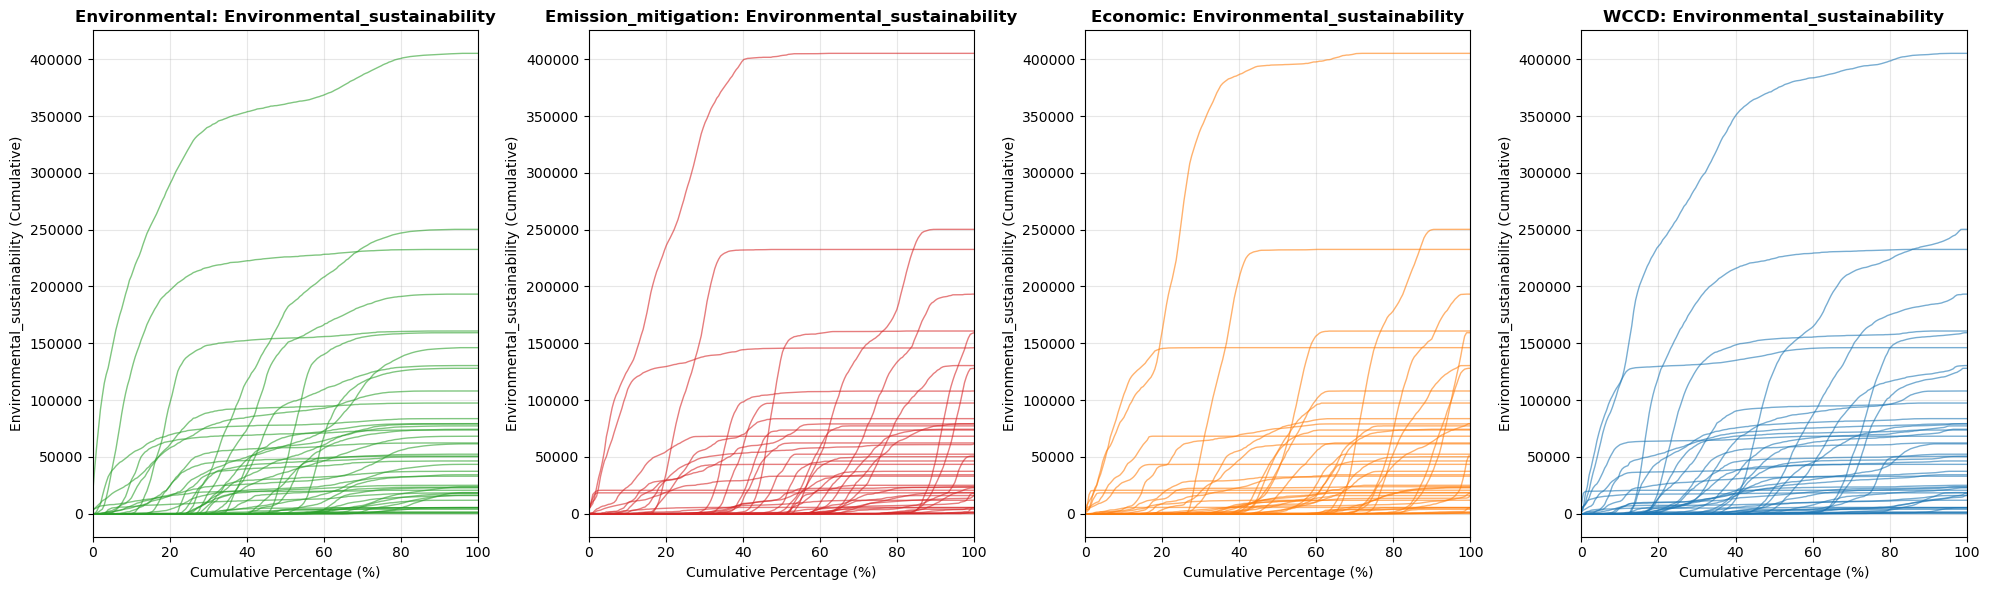

Â∑≤‰øùÂ≠ò: data/US_data/US_analysis_reslut/state_cumulative_curves_Expectation_net_benefit_simplified.png


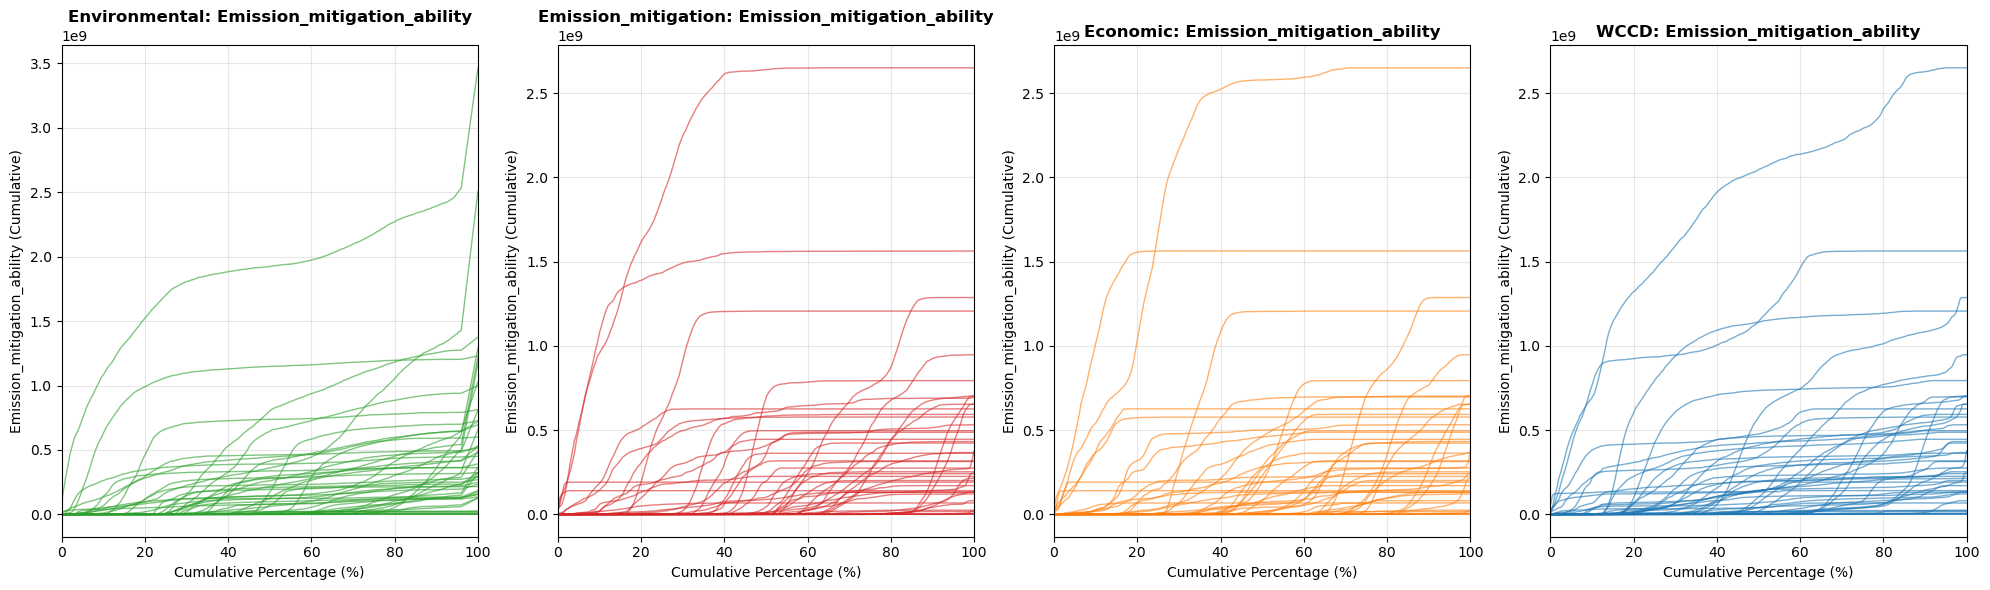

Â∑≤‰øùÂ≠ò: data/US_data/US_analysis_reslut/state_cumulative_curves_avg_npv_simplified.png


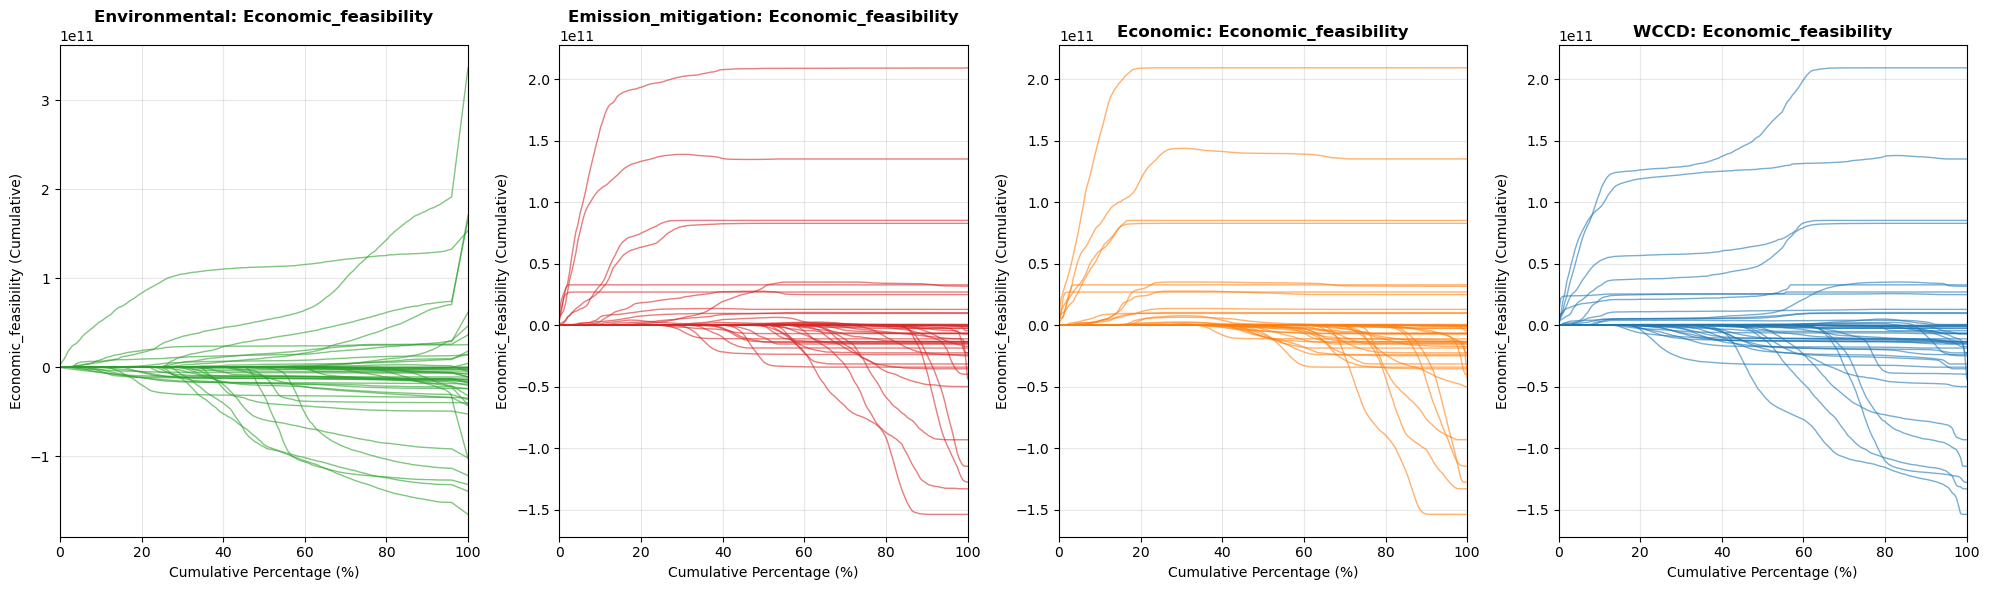


=== Â∑ûÁ∫ßÂà´Á¥ØÁßØÁßØÂàÜÁªüËÆ°ÂÆåÊàê ===
ÊÄªÂ∑ûÊï∞: 48
ÊÄªËÆ∞ÂΩïÊï∞: 192
ÊØè‰∏™Â∑ûÊúâ 4 ÁßçÊéíÂ∫èÊñπÊ°à

Ââç10‰∏™Â∑ûÁöÑWCCDÊñπÊ°àÁªìÊûú:
 State_name  Environmental_sustainability  Emission_mitigation_ability  Economic_feasibility
    Alabama                  63375.564043                 3.237603e+08         -4.857993e+09
    Arizona                  17500.672169                 1.525581e+08          2.624102e+10
   Arkansas                  42205.665313                 2.086627e+08         -9.232186e+09
 California                 131610.598532                 1.176536e+09          1.598082e+11
   Colorado                  63229.339990                 4.950426e+08          6.783992e+10
Connecticut                    248.933724                 1.090621e+06         -1.535457e+08
   Delaware                  16055.502330                 7.724699e+07         -3.424821e+09
    Florida                  26369.712201                 2.142394e+08          1.192068e+09
    Georgia             

In [26]:
import numpy as np
import matplotlib.pyplot as plt
def calculate_state_integration_analysis_simplified(pixel_optimized_data, us_states_4326, df_net_benefit, 
                                                   plot_curves=True, output_dir='data/US_data/US_analysis_reslut'):
    """
    ÁÆÄÂåñÁâàÔºöÁîüÊàêÊõ¥ÁÆÄÊ¥ÅÁöÑÂ∑ûÁ∫ßÁßØÂàÜÁªüËÆ°ÁªìÊûú
    """
    print("=== ÂºÄÂßãÂ∑ûÁ∫ßÂà´Á¥ØÁßØÁßØÂàÜÁªüËÆ°ÂàÜÊûêÔºàÁÆÄÂåñÁâàÔºâ===")
    
    # 1. ÂÆö‰πâ‰∏â‰∏™Áª¥Â∫¶ÂíåÂõõÁßçÊéíÂ∫èÊñπÊ°à
    variables = [
        ('predicted_prob', 'Environmental_sustainability'),
        ('Expectation_net_benefit', 'Emission_mitigation_ability'), 
        ('avg_npv', 'Economic_feasibility')
    ]
    
    solution_types = ['Environmental', 'Emission_mitigation', 'Economic', 'WCCD']
    
    # 2. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
    print("Ê≠£Âú®ÂêàÂπ∂Êï∞ÊçÆ...")
    area_data = df_net_benefit[['lat', 'lon', 'area_m2']].copy()
    merged_data = pixel_optimized_data.merge(area_data, on=['lat', 'lon'], how='inner')
    area_values = merged_data['area_m2'].values / 10000
    
    # 3. ÂàõÂª∫Âá†‰ΩïÂàóÔºåÊ∑ªÂä†Â∑ûÊ†áÁ≠æ
    print("Ê≠£Âú®Ê∑ªÂä†Â∑ûÊ†áÁ≠æ...")
    geometry = [Point(xy) for xy in zip(merged_data['lon'], merged_data['lat'])]
    pixel_gdf = gpd.GeoDataFrame(merged_data, geometry=geometry, crs='EPSG:4326')
    pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
    data_with_states = pixel_with_states.drop(columns=['geometry']).copy()
    
    # 4. ËæÖÂä©ÂáΩÊï∞
    def percentage_to_01(percentage_array):
        return percentage_array / 100.0
    
    def calculate_integral(x, y):
        """‰ΩøÁî®Ê¢ØÂΩ¢Ê≥ïÂàôËÆ°ÁÆóÁßØÂàÜ"""
        if len(x) < 2:
            return 0.0
        if x[0] > x[-1]:
            x = x[::-1]
            y = y[::-1]
        integral = 0.0
        for i in range(len(x) - 1):
            dx = x[i+1] - x[i]
            avg_y = (y[i] + y[i+1]) / 2.0
            integral += avg_y * dx
        return integral
    
    # 5. Ëé∑ÂèñÊâÄÊúâÂ∑ûÂàóË°®
    all_states = data_with_states['NAME'].dropna().unique()
    print(f"ÂèëÁé∞ {len(all_states)} ‰∏™Â∑û")
    
    # 6. Â≠òÂÇ®ÁªìÊûú - ÁÆÄÂåñÁªìÊûÑ
    results = []
    state_curves_data = {}
    
    # 7. ÂØπÊØè‰∏™ÊéíÂ∫èÊñπÊ°àËÆ°ÁÆóÊÄª‰ΩìÊéíÂ∫èÂíåÂ∑ûÁ∫ßÊõ≤Á∫ø
    for solution_type in solution_types:
        print(f"Ê≠£Âú®Â§ÑÁêÜÊéíÂ∫èÊñπÊ°à: {solution_type}")
        
        # 7.1 Á°ÆÂÆöÊÄª‰ΩìÊéíÂ∫è‰æùÊçÆ
        if solution_type == 'WCCD':
            sort_values = merged_data['ccd_optimized'].values
        elif solution_type == 'Environmental':
            sort_values = merged_data['predicted_prob'].values* area_values
        elif solution_type == 'Emission_mitigation':
            sort_values = merged_data['Expectation_net_benefit'].values * area_values
        elif solution_type == 'Economic':
            sort_values = merged_data['avg_npv'].values * area_values
        
        # 7.2 ÂàõÂª∫ÊÄª‰ΩìÁ≤æÁªÜÂàÜ‰ΩçÊï∞Âå∫Èó¥
        fine_percentiles = np.arange(100, -0.5, -0.5)
        fine_bins = np.percentile(sort_values, fine_percentiles)
        
        # 7.3 ÂØπÊØè‰∏™Áª¥Â∫¶ËÆ°ÁÆóÂ∑ûÁ∫ßÁ¥ØÁßØÊõ≤Á∫ø
        solution_curves = {}
        state_integrals = {}  # Â≠òÂÇ®ÊØè‰∏™Â∑ûÂú®ËØ•ÊéíÂ∫èÊñπÊ°à‰∏ãÁöÑÊâÄÊúâÁª¥Â∫¶ÁßØÂàÜ
        
        for var_name, var_label in variables:
            print(f"  Â§ÑÁêÜÁª¥Â∫¶: {var_label}")
            
            # ËÆ°ÁÆóËØ•Áª¥Â∫¶ÁöÑÊÄªÊïàÁõäÂÄº
            if var_name == 'predicted_prob':
                benefit_total_values = merged_data[var_name].values * area_values
            else:
                benefit_total_values = merged_data[var_name].values * area_values
            
            # Â≠òÂÇ®ÂêÑÂ∑ûÁöÑÁ¥ØÁßØÊõ≤Á∫øÊï∞ÊçÆ
            state_cumulative_data = {}
            
            # 7.4 ÂØπÊØè‰∏™Â∑ûËÆ°ÁÆóÁ¥ØÁßØÊõ≤Á∫ø
            for state_name in all_states:
                state_mask = data_with_states['NAME'] == state_name
                state_data = data_with_states[state_mask]
                
                if len(state_data) == 0:
                    continue
                
                # Ëé∑ÂèñËØ•Â∑ûÁöÑÊï∞ÊçÆ
                state_indices = state_data.index
                state_benefit_values = benefit_total_values[state_indices]
                state_sort_values = sort_values[state_indices]
                
                # ÊåâÁÖßÊÄª‰ΩìÁ≤æÁªÜÂàÜ‰ΩçÊï∞Âå∫Èó¥Êù•ÂàíÂàÜËØ•Â∑ûÁöÑÊï∞ÊçÆ
                state_cumulative_benefits = []
                
                for i in range(len(fine_bins) - 1):
                    mask = (state_sort_values <= fine_bins[i]) & (state_sort_values >= fine_bins[i + 1])
                    if np.any(mask):
                        cumulative_benefit = np.sum(state_benefit_values[mask])
                        state_cumulative_benefits.append(cumulative_benefit)
                    else:
                        state_cumulative_benefits.append(0)
                
                # ËÆ°ÁÆóÁ¥ØÁßØÊõ≤Á∫ø
                state_cumulative_benefits = np.array(state_cumulative_benefits)
                state_cumulative_sum = np.cumsum(state_cumulative_benefits)
                state_cumulative_percentage = np.arange(len(state_cumulative_sum)) / (len(state_cumulative_sum) - 1) * 100
                
                # ËÆ°ÁÆóÁßØÂàÜ
                x_01 = percentage_to_01(state_cumulative_percentage)
                integral_value = calculate_integral(x_01, state_cumulative_sum)
                
                # Â≠òÂÇ®ÁßØÂàÜÂÄº
                if state_name not in state_integrals:
                    state_integrals[state_name] = {}
                state_integrals[state_name][var_label] = integral_value
                
                # Â≠òÂÇ®Â∑ûÁ∫ßÊï∞ÊçÆ
                state_cumulative_data[state_name] = {
                    'cumulative_sum': state_cumulative_sum,
                    'cumulative_percentage': state_cumulative_percentage,
                    'data_count': len(state_data)
                }
            
            # Â≠òÂÇ®ËØ•Áª¥Â∫¶ÁöÑÂ∑ûÁ∫ßÊõ≤Á∫øÊï∞ÊçÆ
            solution_curves[var_label] = state_cumulative_data
        
        # 7.5 ÁîüÊàêËØ•ÊéíÂ∫èÊñπÊ°àÁöÑÁªìÊûúË°åÔºàÊØè‰∏™Â∑û‰∏ÄË°åÔºâ
        for state_name in all_states:
            if state_name in state_integrals:
                result_row = {
                    'State_name': state_name,
                    'Solution_Type': solution_type,
                    'Environmental_sustainability': state_integrals[state_name].get('Environmental_sustainability', 0),
                    'Emission_mitigation_ability': state_integrals[state_name].get('Emission_mitigation_ability', 0),
                    'Economic_feasibility': state_integrals[state_name].get('Economic_feasibility', 0)
                }
                results.append(result_row)
        
        # Â≠òÂÇ®ËØ•ÊéíÂ∫èÊñπÊ°àÁöÑÊõ≤Á∫øÊï∞ÊçÆ
        state_curves_data[solution_type] = solution_curves
    
    # 8. ÂàõÂª∫ÁªìÊûúDataFrame
    results_df = pd.DataFrame(results)
    
    # 9. Êï∞ÊçÆÊ∏ÖÁêÜÂíåÊ†ºÂºèÂåñ
    print("Ê≠£Âú®Ê†ºÂºèÂåñÁªìÊûú...")
    results_df = results_df.sort_values(['State_name', 'Solution_Type']).reset_index(drop=True)
    
    # Êï∞ÂÄºÊ†ºÂºèÂåñ
    numeric_columns = ['Environmental_sustainability', 'Emission_mitigation_ability', 'Economic_feasibility']
    for col in numeric_columns:
        results_df[col] = results_df[col].round(6)
    
    # 10. ÁªòÂà∂ÂêÑÂ∑ûÁ¥ØÁßØÊõ≤Á∫øÔºàÂ¶ÇÊûúÂêØÁî®Ôºâ
    if plot_curves:
        print("Ê≠£Âú®ÁªòÂà∂ÂêÑÂ∑ûÁ¥ØÁßØÊõ≤Á∫ø...")
        create_state_cumulative_curves_simplified(state_curves_data, variables, solution_types, output_dir)
    
    # 11. ËæìÂá∫ÊëòË¶Å
    print(f"\n=== Â∑ûÁ∫ßÂà´Á¥ØÁßØÁßØÂàÜÁªüËÆ°ÂÆåÊàê ===")
    print(f"ÊÄªÂ∑ûÊï∞: {len(all_states)}")
    print(f"ÊÄªËÆ∞ÂΩïÊï∞: {len(results_df)}")
    print(f"ÊØè‰∏™Â∑ûÊúâ {len(solution_types)} ÁßçÊéíÂ∫èÊñπÊ°à")
    
    # ÊòæÁ§∫Ââç10‰∏™Â∑ûÁöÑWCCDÊñπÊ°àÁªìÊûú
    wccd_results = results_df[results_df['Solution_Type'] == 'WCCD'].head(10)
    print(f"\nÂâç10‰∏™Â∑ûÁöÑWCCDÊñπÊ°àÁªìÊûú:")
    print(wccd_results[['State_name', 'Environmental_sustainability', 
                       'Emission_mitigation_ability', 'Economic_feasibility']].to_string(index=False))
    
    return results_df, state_curves_data

def create_state_cumulative_curves_simplified(state_curves_data, variables, solution_types, output_dir):
    """
    ÁÆÄÂåñÁâàÔºöÁªòÂà∂ÂêÑÂ∑ûÁ¥ØÁßØÊõ≤Á∫ø
    """
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    # ÂÆö‰πâÈ¢úËâ≤ÊñπÊ°à
    solution_colors = {
        'WCCD': '#1f77b4',      # Ê∑±ËìùËâ≤
        'Environmental': '#2ca02c',  # Ê∑±ÁªøËâ≤
        'Emission_mitigation': '#d62728',  # Ê∑±Á∫¢Ëâ≤
        'Economic': '#ff7f0e'   # Ê©ôËâ≤
    }
    
    # ‰∏∫ÊØè‰∏™Áª¥Â∫¶ÂàõÂª∫Â≠êÂõæ
    for var_idx, (var_name, var_label) in enumerate(variables):
        fig, axes = plt.subplots(1, len(solution_types), figsize=(20, 6))
        if len(solution_types) == 1:
            axes = [axes]
        
        for sol_idx, solution_type in enumerate(solution_types):
            ax = axes[sol_idx]
            
            # Ëé∑ÂèñËØ•ÊéíÂ∫èÊñπÊ°à‰∏ãËØ•Áª¥Â∫¶ÁöÑÂ∑ûÁ∫ßÊï∞ÊçÆ
            if solution_type in state_curves_data and var_label in state_curves_data[solution_type]:
                state_data = state_curves_data[solution_type][var_label]
                
                # ÁªòÂà∂ÂêÑÂ∑ûÁ¥ØÁßØÊõ≤Á∫ø
                for state_name, data in state_data.items():
                    cumulative_sum = data['cumulative_sum']
                    cumulative_percentage = data['cumulative_percentage']
                    
                    # ÂÖ®ÈáèÁªòÂà∂
                    ax.plot(cumulative_percentage, cumulative_sum,
                           color=solution_colors[solution_type], 
                           linewidth=1.0, alpha=0.6)
            
            # ËÆæÁΩÆÂõæÂΩ¢Â±ûÊÄß
            ax.set_xlim(0, 100)
            ax.set_xlabel('Cumulative Percentage (%)', fontsize=10)
            ax.set_ylabel(f'{var_label} (Cumulative)', fontsize=10)
            ax.set_title(f'{solution_type}: {var_label}', fontsize=12, fontweight='bold')
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        # ‰øùÂ≠òÂõæÁâá
        output_path = f'{output_dir}/state_cumulative_curves_{var_name}_simplified.png'
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Â∑≤‰øùÂ≠ò: {output_path}")
        
        plt.show()

# ‰ΩøÁî®Á§∫‰æã
if __name__ == "__main__":
    state_integration_results, state_curves_data = calculate_state_integration_analysis_simplified(
        df_pixel_optimized_data, 
        us_states_4326, 
        df_net_benefit,
        plot_curves=True
    )
    
    # ‰øùÂ≠òÁªìÊûú
    output_path = 'data/US_data/US_analysis_reslut/state_integration_analysis_simplified.csv'
    state_integration_results.to_csv(output_path, index=False)
    print(f"\nÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {output_path}")
    
    # ÊòæÁ§∫ÁªìÊûúÊëòË¶Å
    print(f"\n=== ÁªìÊûúÊëòË¶Å ===")
    print(f"ÂêÑÊéíÂ∫èÊñπÊ°àÁöÑÂπ≥ÂùáÁßØÂàÜ:")
    summary = state_integration_results.groupby('Solution_Type')[['Environmental_sustainability', 
                                                                'Emission_mitigation_ability', 
                                                                'Economic_feasibility']].mean()
    print(summary.round(6))

In [27]:
state_integration_results

State_name        Solution_Type  Environmental_sustainability  \
0      Alabama             Economic                  51896.015129   
1      Alabama  Emission_mitigation                  60509.529567   
2      Alabama        Environmental                  72863.067697   
3      Alabama                 WCCD                  63375.564043   
4      Arizona             Economic                  18047.955218   
..         ...                  ...                           ...   
187  Wisconsin                 WCCD                  31600.965478   
188    Wyoming             Economic                   9791.164464   
189    Wyoming  Emission_mitigation                   7333.318297   
190    Wyoming        Environmental                   3792.690722   
191    Wyoming                 WCCD                   8652.938401   

     Emission_mitigation_ability  Economic_feasibility  
0                   2.777177e+08         -3.620679e+09  
1                   3.233023e+08         -4.318472e+09  
2                   3.708222e+08         -5.705416e+09  
3                   3.237603e+08         -4.857993e+09  
4                   1.878682e+08          3.225057e+10  
..                           ...                   ...  
187                 1.406346e+08         -2.465616e+10  
188                 1.083090e+08          8.945521e+09  
189                 7.973799e+07          7.204839e+09  
190                 3.360089e+07          2.779091e+09  
191                 7.846916e+07          7.300248e+09  

[192 rows x 5 columns]

## 1.5 Policy efficiency 

calculate the mean improvement of WDDC solution 

what is the mean improvement of policy?

definition: the integral of priority order

ÂØπ‰∫éÊØè‰∏™Â∑ûÔºåËÆ°ÁÆóWCCDÊñπÊ°àÊâÄËÉΩÂ∏¶Êù•ÁöÑÊèêÂçá

ÊúÄÂêéËæìÂá∫‰∏Ä‰∏™dataframeÔºåÂê´Êúâ6‰∏™column:

ÂåÖÂê´State_name, 3‰∏™columnËÆ∞ÂΩïWCCDÁöÑÂπ≥ÂùáÊèêÂçáÔºåÂπ≥ÂùáÊèêÂçáÁöÑÂùáÂÄº„ÄÅÂùáÂÄºÊ†áÂáÜËØØÂ∑Æ

=== ÂºÄÂßãËÆ°ÁÆóÂêÑÂ∑ûCCDÊñπÊ°àÊÄßËÉΩÊèêÂçáÂπ∂ÂêàÂπ∂Âà∞Áé∞ÊúâÊï∞ÊçÆ ===
Ê≠£Âú®ËØªÂèñÁé∞ÊúâÂ∑ûÁ∫ßÂàÜÊûêÊï∞ÊçÆ...
Áé∞ÊúâÊï∞ÊçÆÂΩ¢Áä∂: (48, 7)
Áé∞ÊúâÊï∞ÊçÆÂàó: ['State_name', 'abandoned_land_ha', 'Environmental_suitability_per_ha', 'Emission_mitigation_per_ha', 'Economic_NPV_per_ha', 'Power_generation_per_ha', 'CCD_Mean']

Ê≠£Âú®Â§ÑÁêÜÂ∑û: Alabama
  Â§ÑÁêÜÁª¥Â∫¶: Environmental_sustainability
    CCD vs Environmental: -13.02%
    CCD vs Emission_mitigation: +4.74%
    CCD vs Economic: +22.12%
    Âπ≥ÂùáÊèêÂçá: +4.61% ¬± 10.14%
  Â§ÑÁêÜÁª¥Â∫¶: Emission_mitigation_ability
    CCD vs Environmental: -12.69%
    CCD vs Emission_mitigation: +0.14%
    CCD vs Economic: +16.58%
    Âπ≥ÂùáÊèêÂçá: +1.34% ¬± 8.47%
  Â§ÑÁêÜÁª¥Â∫¶: Economic_feasibility
    CCD vs Environmental: +14.85%
    CCD vs Emission_mitigation: -12.49%
    CCD vs Economic: -34.17%
    Âπ≥ÂùáÊèêÂçá: -10.60% ¬± 14.18%

Ê≠£Âú®Â§ÑÁêÜÂ∑û: Arizona
  Â§ÑÁêÜÁª¥Â∫¶: Environmental_sustainability
    CCD vs Environmental: +41.80%
    CCD vs

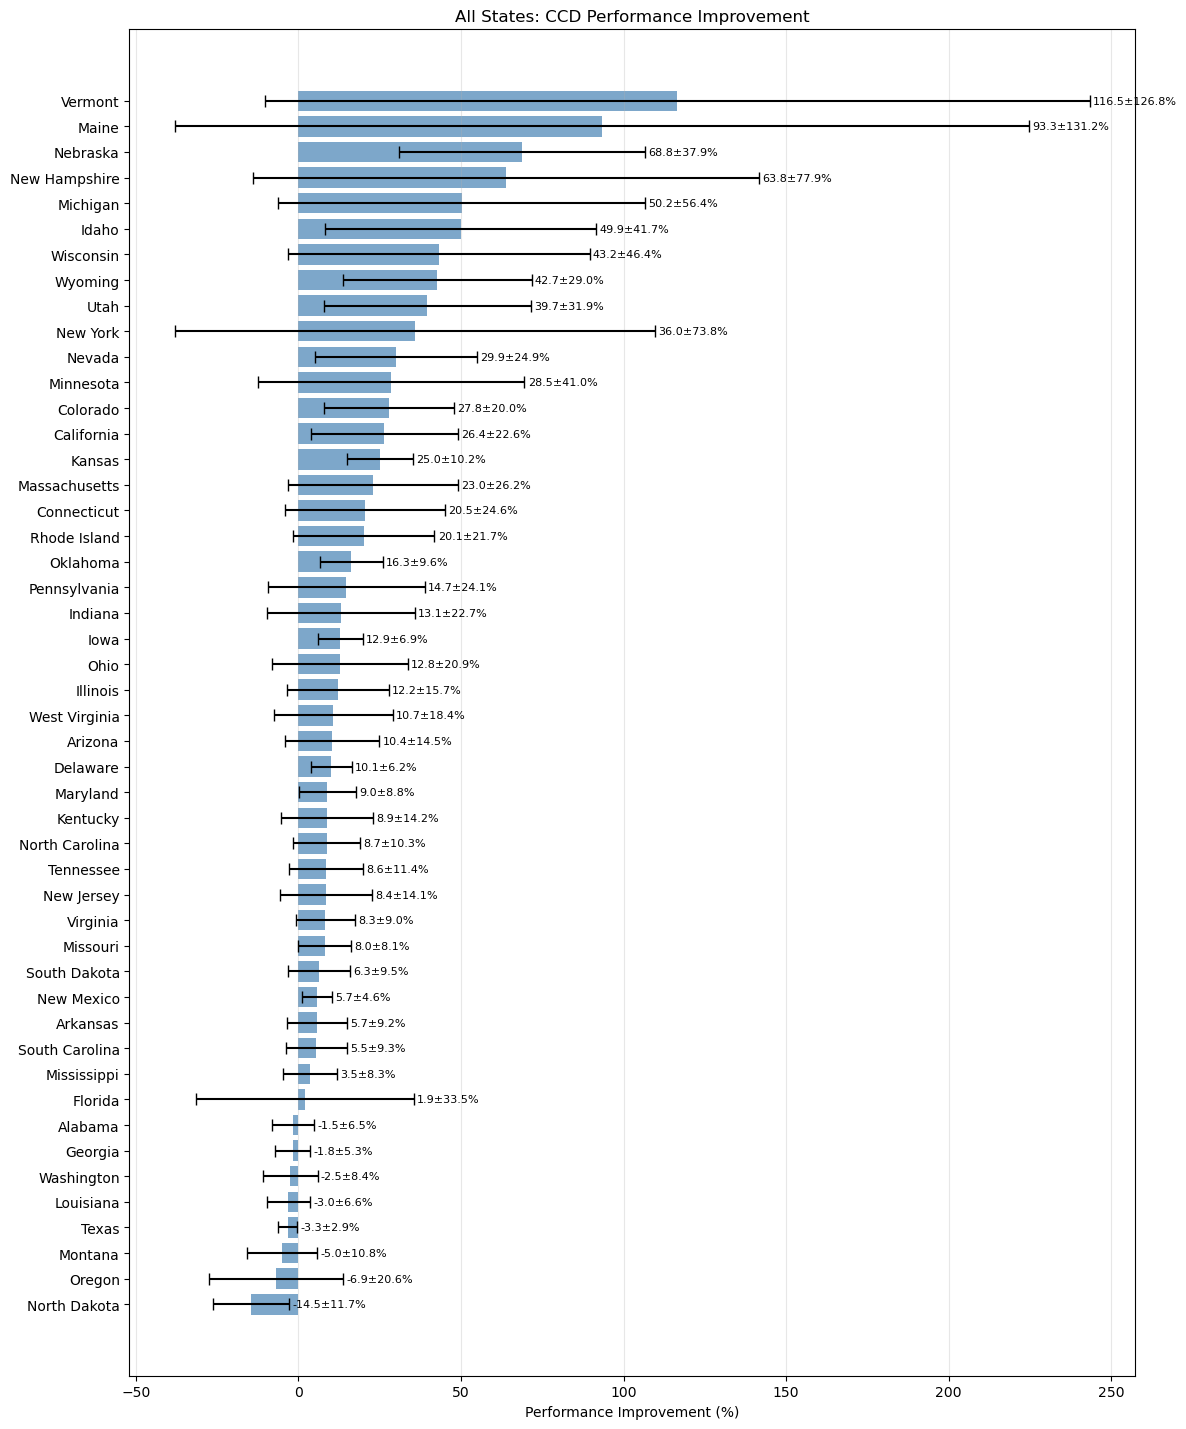

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_state_ccd_performance_improvement_and_merge(csv_path, state_analysis_path='data/US_data/state_level_analysis.csv', output_dir='data/US_data/US_analysis_reslut'):
    """
    ËÆ°ÁÆóÂêÑÂ∑ûCCDÊñπÊ°àÁöÑÊÄßËÉΩÊèêÂçáÔºåÂπ∂ÂêàÂπ∂Âà∞Áé∞ÊúâÁöÑstate_level_analysis.csv‰∏≠
    
    ÂèÇÊï∞:
    - csv_path: Â∑ûÁ∫ßÁßØÂàÜÂàÜÊûêÁªìÊûúCSVÊñá‰ª∂Ë∑ØÂæÑ
    - state_analysis_path: Áé∞ÊúâÂ∑ûÁ∫ßÂàÜÊûêCSVÊñá‰ª∂Ë∑ØÂæÑ
    - output_dir: ËæìÂá∫ÁõÆÂΩï
    
    ËøîÂõû:
    - ÂêàÂπ∂ÂêéÁöÑDataFrame
    """
    print("=== ÂºÄÂßãËÆ°ÁÆóÂêÑÂ∑ûCCDÊñπÊ°àÊÄßËÉΩÊèêÂçáÂπ∂ÂêàÂπ∂Âà∞Áé∞ÊúâÊï∞ÊçÆ ===")
    
    # 1. ËØªÂèñÁé∞ÊúâÂ∑ûÁ∫ßÂàÜÊûêÊï∞ÊçÆ
    print("Ê≠£Âú®ËØªÂèñÁé∞ÊúâÂ∑ûÁ∫ßÂàÜÊûêÊï∞ÊçÆ...")
    try:
        state_analysis_df = pd.read_csv(state_analysis_path)
        print(f"Áé∞ÊúâÊï∞ÊçÆÂΩ¢Áä∂: {state_analysis_df.shape}")
        print(f"Áé∞ÊúâÊï∞ÊçÆÂàó: {list(state_analysis_df.columns)}")
        
        # Ê£ÄÊü•ÊòØÂê¶Â∑≤ÁªèÂåÖÂê´WCCDÂàó
        wccd_columns = ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean',
                       'Environmental_improvement_std', 'Emission_improvement_std', 'Economic_improvement_std',
                       'Overall_improvement_mean', 'Overall_improvement_std']
        
        existing_wccd_columns = [col for col in wccd_columns if col in state_analysis_df.columns]
        if existing_wccd_columns:
            print(f"ÂèëÁé∞Â∑≤Â≠òÂú®ÁöÑWCCDÂàó: {existing_wccd_columns}")
            print("Â∞ÜË¶ÜÁõñËøô‰∫õÂàó...")
            # Âà†Èô§Â∑≤Â≠òÂú®ÁöÑWCCDÂàó
            state_analysis_df = state_analysis_df.drop(columns=existing_wccd_columns)
            print(f"Âà†Èô§WCCDÂàóÂêéÊï∞ÊçÆÂΩ¢Áä∂: {state_analysis_df.shape}")
        
    except FileNotFoundError:
        print(f"ÈîôËØØ: Êâæ‰∏çÂà∞Êñá‰ª∂ {state_analysis_path}")
        return None, None, None
    
    # 2. ËØªÂèñÁßØÂàÜÂàÜÊûêÊï∞ÊçÆ
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        return None, None, None
    
    # 3. ÂÆö‰πâ‰∏â‰∏™Áª¥Â∫¶
    dimensions = ['Environmental_sustainability', 'Emission_mitigation_ability', 'Economic_feasibility']
    
    # 4. ËÆ°ÁÆóÂêÑÂ∑ûCCDÊÄßËÉΩÊèêÂçá
    state_performance_results = {}
    
    for state_name in df['State_name'].unique():
        print(f"\nÊ≠£Âú®Â§ÑÁêÜÂ∑û: {state_name}")
        
        # Ëé∑ÂèñËØ•Â∑ûÁöÑÊï∞ÊçÆ
        state_data = df[df['State_name'] == state_name].copy()
        
        if len(state_data) != 4:  # Â∫îËØ•Êúâ4ÁßçÊéíÂ∫èÊñπÊ°à
            print(f"  Ë≠¶Âëä: {state_name} Êï∞ÊçÆ‰∏çÂÆåÊï¥ÔºåË∑≥Ëøá")
            continue
        
        # ËÆ°ÁÆóËØ•Â∑ûCCDÁõ∏ÂØπ‰∫éÂÖ∂‰ªñÊñπÊ°àÁöÑÊÄßËÉΩÊèêÂçá
        state_improvements = {}
        state_std_errors = {}
        
        for dimension in dimensions:
            print(f"  Â§ÑÁêÜÁª¥Â∫¶: {dimension}")
            
            # Ëé∑ÂèñCCDÂíåÂÖ∂‰ªñÊñπÊ°àÁöÑÂÄº
            ccd_value = state_data[state_data['Solution_Type'] == 'WCCD'][dimension].iloc[0]
            other_values = {}
            
            for solution_type in ['Environmental', 'Emission_mitigation', 'Economic']:
                if solution_type in state_data['Solution_Type'].values:
                    other_values[solution_type] = state_data[state_data['Solution_Type'] == solution_type][dimension].iloc[0]
            
            # ËÆ°ÁÆóÊÄßËÉΩÊèêÂçá
            improvements = []
            for other_name, other_value in other_values.items():
                if other_value != 0:
                    improvement = (ccd_value - other_value) / abs(other_value) * 100
                    improvements.append(improvement)
                    print(f"    CCD vs {other_name}: {improvement:+.2f}%")
                else:
                    print(f"    CCD vs {other_name}: Êó†Ê≥ïËÆ°ÁÆóÔºàÂàÜÊØç‰∏∫0Ôºâ")
            
            if improvements:
                # ËÆ°ÁÆóÂπ≥ÂùáÊèêÂçáÂíåÊ†áÂáÜËØØ
                mean_improvement = np.mean(improvements)  
                std_improvement = np.std(improvements, ddof=1)
                std_error = std_improvement / np.sqrt(len(improvements))
                
                state_improvements[dimension] = mean_improvement
                state_std_errors[dimension] = std_error
                
                print(f"    Âπ≥ÂùáÊèêÂçá: {mean_improvement:+.2f}% ¬± {std_error:.2f}%")
            else:
                state_improvements[dimension] = 0
                state_std_errors[dimension] = 0
                print(f"    Êó†Ê≥ïËÆ°ÁÆóÊÄßËÉΩÊèêÂçá")
        
        # Â≠òÂÇ®ËØ•Â∑ûÁöÑÁªìÊûú
        state_performance_results[state_name] = {
            'improvements': state_improvements,
            'std_errors': state_std_errors
        }
    
    # 5. ËÆ°ÁÆóÂêÑÂ∑ûÊÄª‰ΩìÊÄßËÉΩÊèêÂçáÔºàËÄÉËôëËØØÂ∑Æ‰º†Êí≠Ôºâ
    print(f"\n=== ËÆ°ÁÆóÂêÑÂ∑ûÊÄª‰ΩìÊÄßËÉΩÊèêÂçáÔºàËÄÉËôëËØØÂ∑Æ‰º†Êí≠Ôºâ===")
    
    state_overall_results = {}
    
    for state_name, state_data in state_performance_results.items():
        print(f"\nÂ§ÑÁêÜÂ∑û: {state_name}")
        
        # Êî∂ÈõÜÊúâÊïàÊï∞ÊçÆ
        valid_data = []
        for dimension in dimensions:
            if state_data['improvements'][dimension] != 0:
                valid_data.append({
                    'dimension': dimension,
                    'improvement': state_data['improvements'][dimension],
                    'std_error': state_data['std_errors'][dimension]
                })
        
        if not valid_data:
            print(f"  Ê≤°ÊúâÊúâÊïàÁöÑÊÄßËÉΩÊèêÂçáÊï∞ÊçÆ")
            state_overall_results[state_name] = None
            continue
        
        # ‰ΩøÁî®ËØØÂ∑Æ‰º†Êí≠ÁêÜËÆ∫ËÆ°ÁÆóÊÄª‰ΩìÊÄßËÉΩÊèêÂçá
        n_dimensions = len(valid_data)
        overall_mean = np.mean([data['improvement'] for data in valid_data])
        
        # ËØØÂ∑Æ‰º†Êí≠ÂÖ¨Âºè: œÉ_total = sqrt(Œ£(œÉ_i¬≤) / n¬≤)
        squared_std_errors = [data['std_error']**2 for data in valid_data]
        overall_variance = np.sum(squared_std_errors) / (n_dimensions**2)
        overall_std_error = np.sqrt(overall_variance)
        
        # ËÆ°ÁÆó95%ÁΩÆ‰ø°Âå∫Èó¥
        overall_ci_95 = 1.96 * overall_std_error
        overall_cv = (overall_std_error / abs(overall_mean) * 100) if overall_mean != 0 else 0
        
        print(f"  Áª¥Â∫¶Êï∞Èáè: {n_dimensions}")
        print("  ÂêÑÁª¥Â∫¶Ê†áÂáÜËØØ:", [f"{data['std_error']:.4f}" for data in valid_data])
        print(f"  ÊÄª‰ΩìÂùáÂÄº: {overall_mean:+.2f}%")
        print(f"  ÊÄª‰ΩìÊ†áÂáÜËØØ: ¬±{overall_std_error:.2f}%")
        print(f"  95%ÁΩÆ‰ø°Âå∫Èó¥: [{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]")
        print(f"  ÂèòÂºÇÁ≥ªÊï∞: {overall_cv:.2f}%")
        
        state_overall_results[state_name] = {
            'overall_mean': overall_mean,
            'overall_std_error': overall_std_error,
            'overall_ci_95': overall_ci_95,
            'overall_cv': overall_cv,
            'n_dimensions': n_dimensions,
            'dimension_details': valid_data
        }
    
    # 6. ÂàõÂª∫WCCDÊÄßËÉΩÊèêÂçáÊï∞ÊçÆÔºà9‰∏™ÂàóÔºâ
    print(f"\n=== ÂàõÂª∫WCCDÊÄßËÉΩÊèêÂçáÊï∞ÊçÆÔºà9‰∏™ÂàóÔºâ===")
    
    wccd_data = []
    for state_name, result in state_overall_results.items():
        if result is not None:
            wccd_data.append({
                'State_name': state_name,
                # ÂêÑÁª¥Â∫¶ÊÄßËÉΩÊèêÂçáÂùáÂÄº
                'Environmental_improvement_mean': state_performance_results[state_name]['improvements']['Environmental_sustainability'],
                'Emission_improvement_mean': state_performance_results[state_name]['improvements']['Emission_mitigation_ability'],
                'Economic_improvement_mean': state_performance_results[state_name]['improvements']['Economic_feasibility'],
                # ÂêÑÁª¥Â∫¶Ê†áÂáÜËØØ
                'Environmental_improvement_std': state_performance_results[state_name]['std_errors']['Environmental_sustainability'],
                'Emission_improvement_std': state_performance_results[state_name]['std_errors']['Emission_mitigation_ability'],
                'Economic_improvement_std': state_performance_results[state_name]['std_errors']['Economic_feasibility'],
                # ÊÄª‰ΩìÊÄßËÉΩÊèêÂçá
                'Overall_improvement_mean': result['overall_mean'],
                'Overall_improvement_std': result['overall_std_error']
            })
    
    wccd_df = pd.DataFrame(wccd_data)
    

    # 7. ÂêàÂπ∂Âà∞Áé∞ÊúâÊï∞ÊçÆ
    print(f"\n=== ÂêàÂπ∂Êï∞ÊçÆÂà∞Áé∞Êúâstate_level_analysis.csv ===")
    # ‰ΩøÁî®State_nameËøõË°åÂ∑¶ËøûÊé•
    merged_df = state_analysis_df.merge(wccd_df, on='State_name', how='left')
 
    # 8. ‰øùÂ≠òÂêàÂπ∂ÂêéÁöÑÊï∞ÊçÆ
    os.makedirs(output_dir, exist_ok=True)
    
    # ‰øùÂ≠òÂêàÂπ∂ÂêéÁöÑÊï∞ÊçÆ
    merged_path = f'{output_dir}/state_level_analysis_with_wccd.csv'
    merged_df.to_csv(merged_path, index=False)
    print(f"ÂêàÂπ∂ÂêéÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: {merged_path}")
    
    # Â§á‰ªΩÂéüÊñá‰ª∂Âπ∂Êõ¥Êñ∞
    backup_path = f'{state_analysis_path}.backup'
    state_analysis_df.to_csv(backup_path, index=False)
    print(f"ÂéüÊñá‰ª∂Â∑≤Â§á‰ªΩÂà∞: {backup_path}")
    
    # Êõ¥Êñ∞ÂéüÊñá‰ª∂
    merged_df.to_csv(state_analysis_path, index=False)
    print(f"ÂéüÊñá‰ª∂Â∑≤Êõ¥Êñ∞: {state_analysis_path}")
    
    # 9. ËæìÂá∫Ââç10‰∏™Â∑ûÁöÑÁªìÊûú
    if 'Overall_improvement_mean' in merged_df.columns:
        print(f"\n=== Ââç10‰∏™Â∑ûWCCDÊÄßËÉΩÊèêÂçáÁªìÊûú ===")
        top_10 = merged_df[merged_df['Overall_improvement_mean'].notna()].nlargest(10, 'Overall_improvement_mean')
        print(top_10[['State_name', 'Environmental_improvement_mean', 'Emission_improvement_mean', 
                      'Economic_improvement_mean', 'Overall_improvement_mean', 'Overall_improvement_std']].to_string(index=False))
    else:
        print("Êó†Ê≥ïÊòæÁ§∫Ââç10‰∏™Â∑ûÁªìÊûúÔºåÂõ†‰∏∫Áº∫Â∞ëOverall_improvement_meanÂàó")
    
    # 10. ÁªòÂà∂ÊÄßËÉΩÊèêÂçáÂàÜÂ∏ÉÂõæ
    if 'Overall_improvement_mean' in merged_df.columns:
        create_performance_visualization(merged_df, output_dir)
    else:
        print("Ë∑≥ËøáÂèØËßÜÂåñÔºåÂõ†‰∏∫Áº∫Â∞ëÂøÖË¶ÅÁöÑÂàó")
    
    return merged_df, state_performance_results, state_overall_results

def create_performance_visualization(merged_df, output_dir):
    """
    ‰ªÖÁªòÂà∂ÊâÄÊúâÂ∑ûÁöÑÊÄßËÉΩÊèêÂçáÊù°ÂΩ¢Âõæ
    """
    print(f"\nÊ≠£Âú®ÂàõÂª∫ÊâÄÊúâÂ∑ûÊÄßËÉΩÊèêÂçáÊù°ÂΩ¢Âõæ...")

    valid_data = merged_df[merged_df['Overall_improvement_mean'].notna()]

    # ÊåâÊÄßËÉΩÊèêÂçáÊéíÂ∫è
    valid_data = valid_data.sort_values('Overall_improvement_mean', ascending=True).reset_index(drop=True)
    y_pos = np.arange(len(valid_data))

    fig, ax = plt.subplots(figsize=(12, max(8, len(valid_data) * 0.3)))
    bars = ax.barh(
        y_pos, 
        valid_data['Overall_improvement_mean'], 
        xerr=valid_data['Overall_improvement_std'], 
        capsize=4, alpha=0.7, color='steelblue'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(valid_data['State_name'])
    ax.set_xlabel('Performance Improvement (%)')
    ax.set_title('All States: CCD Performance Improvement')
    ax.grid(True, alpha=0.3, axis='x')

    # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for i, (mean, std) in enumerate(zip(valid_data['Overall_improvement_mean'], valid_data['Overall_improvement_std'])):
        ax.text(mean + (std if not np.isnan(std) else 0) + 1, i, f'{mean:.1f}¬±{std:.1f}%', va='center', fontsize=8)

    plt.tight_layout()
    bar_path = f'{output_dir}/state_level_analysis_with_wccd_all_states.png'
    plt.savefig(bar_path, dpi=300, bbox_inches='tight')
    print(f"ÊâÄÊúâÂ∑ûÊÄßËÉΩÊèêÂçáÊù°ÂΩ¢ÂõæÂ∑≤‰øùÂ≠òÂà∞: {bar_path}")
    plt.show()

# ‰ΩøÁî®Á§∫‰æã
if __name__ == "__main__":
    csv_path = 'data/US_data/US_analysis_reslut/state_integration_analysis_simplified.csv'
    state_analysis_path = 'data/US_data/US_analysis_reslut/state_level_analysis.csv'
    merged_df, state_performance_results, state_overall_results = calculate_state_ccd_performance_improvement_and_merge(
        csv_path, 
        state_analysis_path,
        output_dir='data/US_data/US_analysis_reslut'
    )
    

## 1.6 P-value for veritfy

=== ÂºÄÂßãCCDÊñπÊ°àÊòæËëóÊÄßÂàÜÊûê ===
ÊúâÊïàÂ∑ûÊï∞: 48

Environmental Áª¥Â∫¶:
  Âπ≥ÂùáÊèêÂçá: +49.22% ¬± 11.82%
  ‰∏≠‰ΩçÊï∞: +27.41%
  ÂõõÂàÜ‰ΩçÊï∞: [+15.65%, +45.66%]
  tÁªüËÆ°Èáè: 4.164
  pÂÄº: 0.000132
  ÊòæËëóÊÄß: ***
  Cohen's d: 0.601
  95%ÁΩÆ‰ø°Âå∫Èó¥: [+26.05%, +72.39%]

Emission Mitigation Áª¥Â∫¶:
  Âπ≥ÂùáÊèêÂçá: +40.31% ¬± 11.79%
  ‰∏≠‰ΩçÊï∞: +19.65%
  ÂõõÂàÜ‰ΩçÊï∞: [+8.95%, +38.23%]
  tÁªüËÆ°Èáè: 3.419
  pÂÄº: 0.001309
  ÊòæËëóÊÄß: **
  Cohen's d: 0.493
  95%ÁΩÆ‰ø°Âå∫Èó¥: [+17.20%, +63.43%]

Economic Feasibility Áª¥Â∫¶:
  Âπ≥ÂùáÊèêÂçá: -29.00% ¬± 14.93%
  ‰∏≠‰ΩçÊï∞: -14.99%
  ÂõõÂàÜ‰ΩçÊï∞: [-32.09%, +19.92%]
  tÁªüËÆ°Èáè: -1.942
  pÂÄº: 0.058085
  ÊòæËëóÊÄß: ns
  Cohen's d: -0.280
  95%ÁΩÆ‰ø°Âå∫Èó¥: [-58.26%, +0.26%]

ÊÄª‰ΩìÊÄßËÉΩÊèêÂçá:
  Âπ≥ÂùáÊèêÂçá: +20.18% ¬± 25.56%
  ‰∏≠‰ΩçÊï∞: +11.47%
  tÁªüËÆ°Èáè: 5.470
  pÂÄº: 0.000002
  ÊòæËëóÊÄß: ***
  Cohen's d: 0.790
  95%ÁΩÆ‰ø°Âå∫Èó¥: [+12.95%, +27.41%]

=== Áª¥Â∫¶Èó¥ÊØîËæÉÂàÜÊûê ===

Environmental vs Emission:
  Âπ≥ÂùáÂ∑ÆÂºÇ:

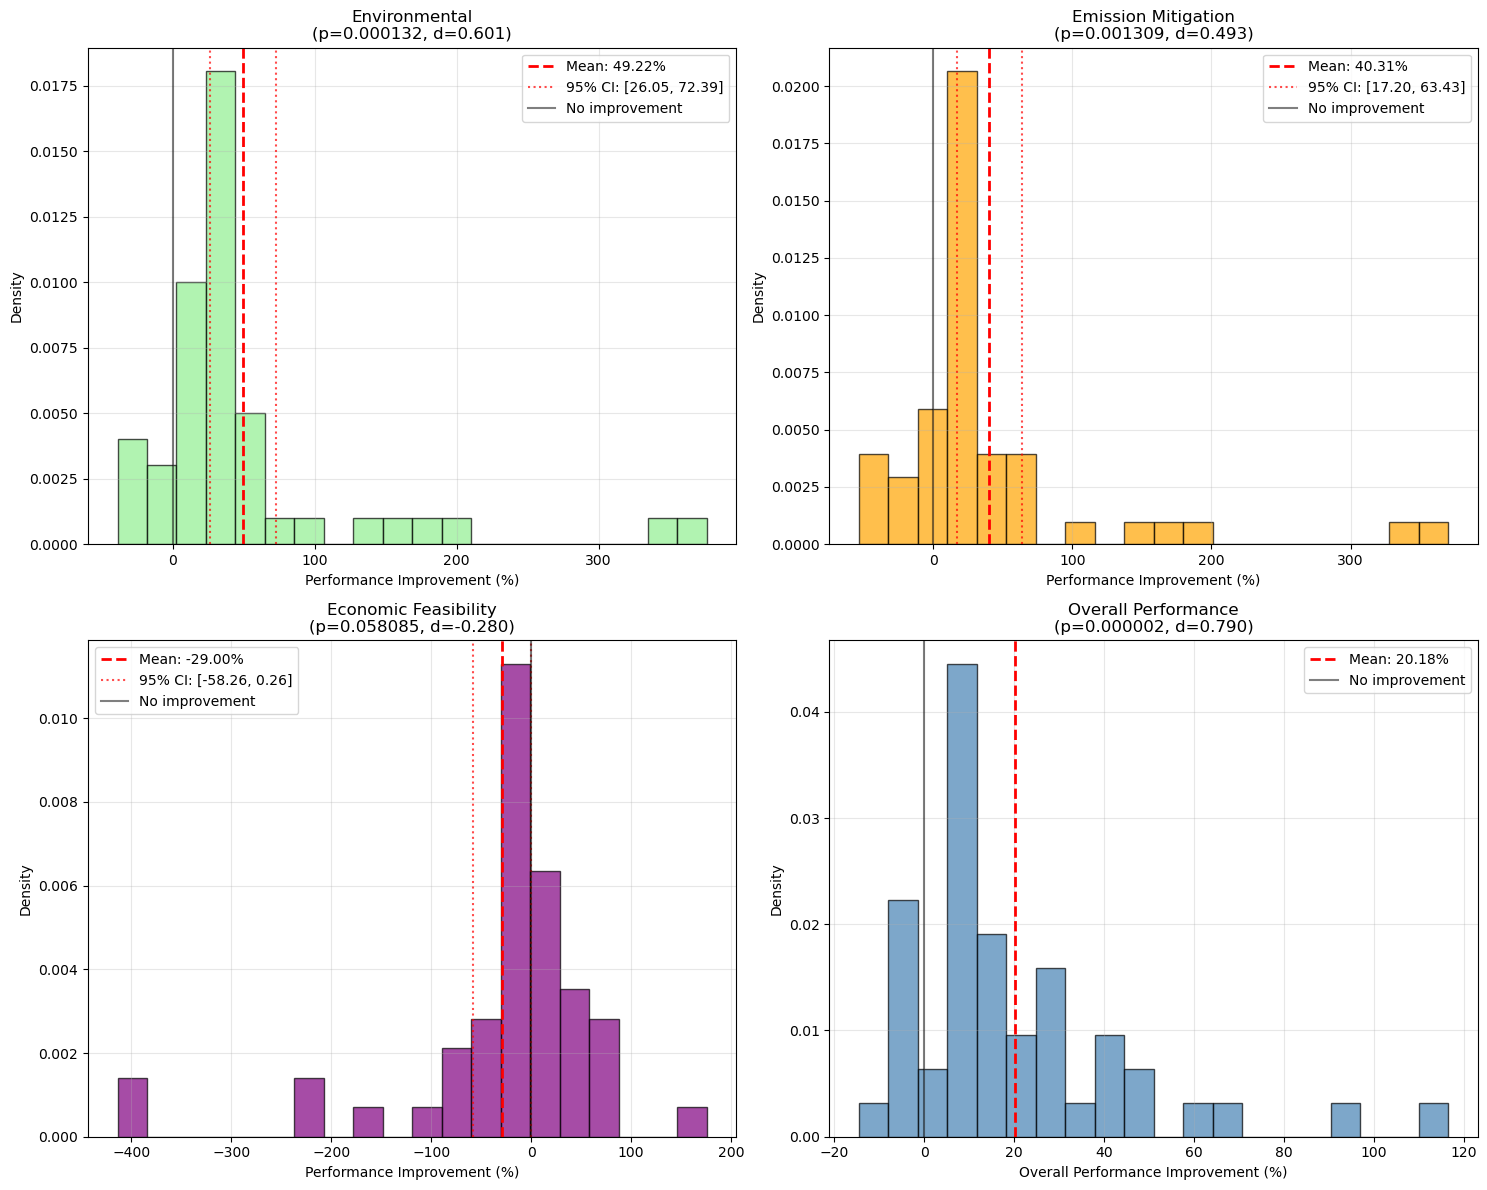

ÊòæËëóÊÄßÂØπÊØîÂõæÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_analysis_reslut/ccd_significance_comparison.png


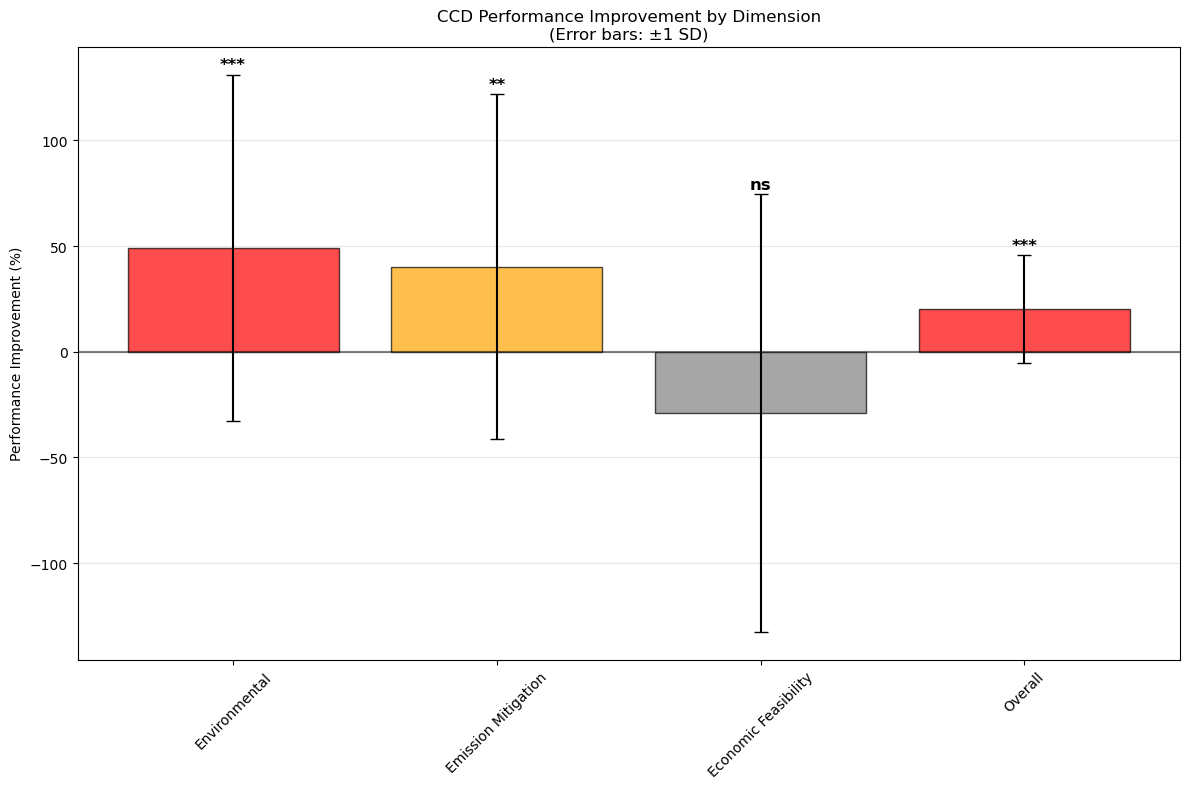

ÊïàÂ∫îÈáèÂØπÊØîÂõæÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_analysis_reslut/ccd_effect_size_comparison.png


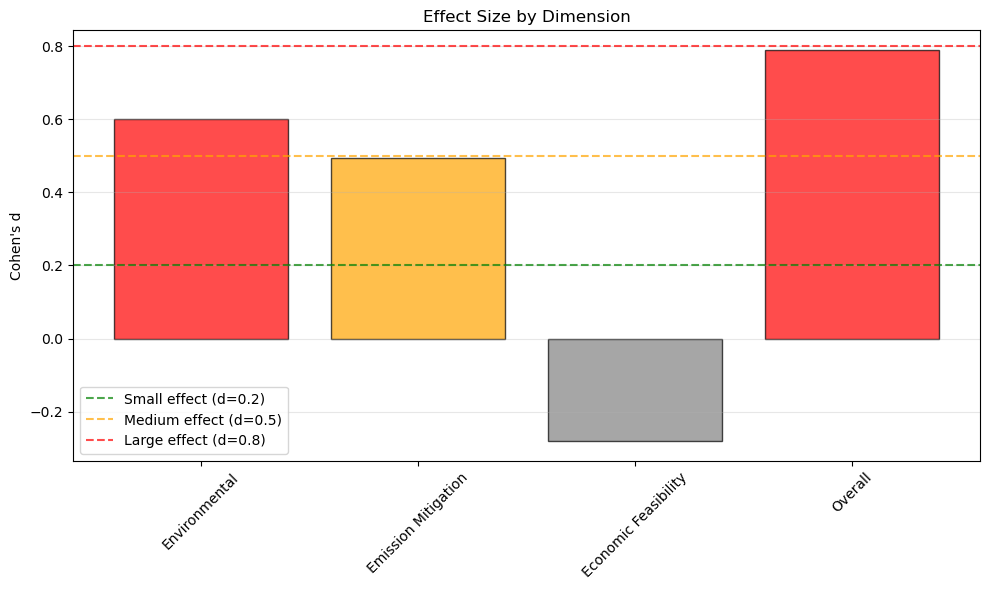

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os 
def calculate_ccd_significance_analysis(merged_df, output_dir='data/US_data/US_analysis_reslut'):
    """
    ËÆ°ÁÆóCCDÊñπÊ°àÂú®ÂêÑÂ∑ûÁöÑÂπ≥ÂùáÊèêÂçáÂíåÊòæËëóÊÄßÊ∞¥Âπ≥
    
    ÂèÇÊï∞:
    - merged_df: ÂåÖÂê´WCCDÊÄßËÉΩÊèêÂçáÊï∞ÊçÆÁöÑDataFrame
    - output_dir: ËæìÂá∫ÁõÆÂΩï
    
    ËøîÂõû:
    - ÊòæËëóÊÄßÂàÜÊûêÁªìÊûú
    """
    print("=== ÂºÄÂßãCCDÊñπÊ°àÊòæËëóÊÄßÂàÜÊûê ===")
    
    # ËøáÊª§ÊúâÊïàÊï∞ÊçÆ
    valid_data = merged_df[merged_df['Overall_improvement_mean'].notna()].copy()
    
    if len(valid_data) == 0:
        print("Ê≤°ÊúâÊúâÊïàÁöÑÊÄßËÉΩÊèêÂçáÊï∞ÊçÆ")
        return None
    
    print(f"ÊúâÊïàÂ∑ûÊï∞: {len(valid_data)}")
    
    # 1. ËÆ°ÁÆóÂêÑÁª¥Â∫¶ÁöÑÂπ≥ÂùáÊèêÂçáÂíåÁªüËÆ°Èáè
    dimensions = ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean']
    dimension_labels = ['Environmental', 'Emission Mitigation', 'Economic Feasibility']
    
    dimension_stats = {}
    
    for dim, label in zip(dimensions, dimension_labels):
        values = valid_data[dim].values
        std_values = valid_data[dim.replace('_mean', '_std')].values
        
        # Âü∫Êú¨ÁªüËÆ°Èáè
        mean_val = np.mean(values)
        std_val = np.std(values, ddof=1)
        median_val = np.median(values)
        q25 = np.percentile(values, 25)
        q75 = np.percentile(values, 75)
        
        
        # ÂçïÊ†∑Êú¨tÊ£ÄÈ™å (Ê£ÄÈ™åÊòØÂê¶ÊòæËëóÂ§ß‰∫é0)
        t_stat, p_value = stats.ttest_1samp(values, 0)
        
        # ÊïàÂ∫îÈáè (Cohen's d)
        cohens_d = mean_val / std_val if std_val != 0 else 0
        
        # ÁΩÆ‰ø°Âå∫Èó¥
        n = len(values)
        se = std_val / np.sqrt(n)
        ci_95_lower = mean_val - 1.96 * se
        ci_95_upper = mean_val + 1.96 * se
        
        dimension_stats[dim] = {
            'label': label,
            'mean': mean_val,
            'std': std_val,
            'median': median_val,
            'q25': q25,
            'q75': q75,
            't_stat': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d,
            'ci_95_lower': ci_95_lower,
            'ci_95_upper': ci_95_upper,
            'n': n
        }
        
        print(f"\n{label} Áª¥Â∫¶:")
        print(f"  Âπ≥ÂùáÊèêÂçá: {mean_val:+.2f}% ¬± {se:.2f}%")
        print(f"  ‰∏≠‰ΩçÊï∞: {median_val:+.2f}%")
        print(f"  ÂõõÂàÜ‰ΩçÊï∞: [{q25:+.2f}%, {q75:+.2f}%]")
        print(f"  tÁªüËÆ°Èáè: {t_stat:.3f}")
        print(f"  pÂÄº: {p_value:.6f}")
        print(f"  ÊòæËëóÊÄß: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
        print(f"  Cohen's d: {cohens_d:.3f}")
        print(f"  95%ÁΩÆ‰ø°Âå∫Èó¥: [{ci_95_lower:+.2f}%, {ci_95_upper:+.2f}%]")
    
    # 2. ÊÄª‰ΩìÊÄßËÉΩÊèêÂçáÂàÜÊûê
    overall_values = valid_data['Overall_improvement_mean'].values
    overall_std_values = valid_data['Overall_improvement_std'].values
    
    overall_mean = np.mean(overall_values)
    overall_std = np.std(overall_values, ddof=1)
    overall_median = np.median(overall_values)
    
    # ÂçïÊ†∑Êú¨tÊ£ÄÈ™å
    overall_t_stat, overall_p_value = stats.ttest_1samp(overall_values, 0)
    overall_cohens_d = overall_mean / overall_std if overall_std != 0 else 0
    
    # ÁΩÆ‰ø°Âå∫Èó¥
    n = len(overall_values)
    overall_se = overall_std / np.sqrt(n)
    overall_ci_95_lower = overall_mean - 1.96 * overall_se
    overall_ci_95_upper = overall_mean + 1.96 * overall_se
    
    print(f"\nÊÄª‰ΩìÊÄßËÉΩÊèêÂçá:")
    print(f"  Âπ≥ÂùáÊèêÂçá: {overall_mean:+.2f}% ¬± {overall_std:.2f}%")
    print(f"  ‰∏≠‰ΩçÊï∞: {overall_median:+.2f}%")
    print(f"  tÁªüËÆ°Èáè: {overall_t_stat:.3f}")
    print(f"  pÂÄº: {overall_p_value:.6f}")
    print(f"  ÊòæËëóÊÄß: {'***' if overall_p_value < 0.001 else '**' if overall_p_value < 0.01 else '*' if overall_p_value < 0.05 else 'ns'}")
    print(f"  Cohen's d: {overall_cohens_d:.3f}")
    print(f"  95%ÁΩÆ‰ø°Âå∫Èó¥: [{overall_ci_95_lower:+.2f}%, {overall_ci_95_upper:+.2f}%]")
    
    # 3. Áª¥Â∫¶Èó¥ÊØîËæÉÂàÜÊûê
    print(f"\n=== Áª¥Â∫¶Èó¥ÊØîËæÉÂàÜÊûê ===")
    
    # ÈÖçÂØπtÊ£ÄÈ™åÊØîËæÉÂêÑÁª¥Â∫¶
    dimension_pairs = [
        ('Environmental_improvement_mean', 'Emission_improvement_mean', 'Environmental vs Emission'),
        ('Environmental_improvement_mean', 'Economic_improvement_mean', 'Environmental vs Economic'),
        ('Emission_improvement_mean', 'Economic_improvement_mean', 'Emission vs Economic')
    ]
    
    pairwise_comparisons = {}
    
    for dim1, dim2, label in dimension_pairs:
        values1 = valid_data[dim1].values
        values2 = valid_data[dim2].values
        
        # ÈÖçÂØπtÊ£ÄÈ™å
        t_stat, p_value = stats.ttest_rel(values1, values2)
        
        # ÊïàÂ∫îÈáè (ÈÖçÂØπCohen's d)
        diff = values1 - values2
        cohens_d = np.mean(diff) / np.std(diff, ddof=1) if np.std(diff, ddof=1) != 0 else 0
        
        pairwise_comparisons[label] = {
            't_stat': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d,
            'mean_diff': np.mean(diff),
            'std_diff': np.std(diff, ddof=1)
        }
        
        print(f"\n{label}:")
        print(f"  Âπ≥ÂùáÂ∑ÆÂºÇ: {np.mean(diff):+.2f}%")
        print(f"  tÁªüËÆ°Èáè: {t_stat:.3f}")
        print(f"  pÂÄº: {p_value:.6f}")
        print(f"  ÊòæËëóÊÄß: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
        print(f"  Cohen's d: {cohens_d:.3f}")
    
    # 4. ÂàõÂª∫ÁªìÊûúÊ±áÊÄªË°®
    results_summary = []
    
    # ÂêÑÁª¥Â∫¶ÁªìÊûú
    for dim, stats_dict in dimension_stats.items():
        results_summary.append({
            'Dimension': stats_dict['label'],
            'Mean_Improvement': stats_dict['mean'],
            'Std_Improvement': stats_dict['std'],
            'Median_Improvement': stats_dict['median'],
            'T_Statistic': stats_dict['t_stat'],
            'P_Value': stats_dict['p_value'],
            'Significance': '***' if stats_dict['p_value'] < 0.001 else '**' if stats_dict['p_value'] < 0.01 else '*' if stats_dict['p_value'] < 0.05 else 'ns',
            'Cohens_D': stats_dict['cohens_d'],
            'CI_95_Lower': stats_dict['ci_95_lower'],
            'CI_95_Upper': stats_dict['ci_95_upper'],
            'Sample_Size': stats_dict['n']
        })
    
    # ÊÄª‰ΩìÁªìÊûú
    results_summary.append({
        'Dimension': 'Overall',
        'Mean_Improvement': overall_mean,
        'Std_Improvement': overall_std,
        'Median_Improvement': overall_median,
        'T_Statistic': overall_t_stat,
        'P_Value': overall_p_value,
        'Significance': '***' if overall_p_value < 0.001 else '**' if overall_p_value < 0.01 else '*' if overall_p_value < 0.05 else 'ns',
        'Cohens_D': overall_cohens_d,
        'CI_95_Lower': overall_ci_95_lower,
        'CI_95_Upper': overall_ci_95_upper,
        'Sample_Size': n
    })
    
    results_df = pd.DataFrame(results_summary)
    
    # 5. ‰øùÂ≠òÁªìÊûú
    os.makedirs(output_dir, exist_ok=True)
    
    # ‰øùÂ≠òÊòæËëóÊÄßÂàÜÊûêÁªìÊûú
    significance_path = f'{output_dir}/ccd_significance_analysis.csv'
    results_df.to_csv(significance_path, index=False)
    print(f"\nÊòæËëóÊÄßÂàÜÊûêÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {significance_path}")
    
    # 6. ÂàõÂª∫ÂèØËßÜÂåñÂõæË°®
    create_significance_visualizations(valid_data, dimension_stats, overall_mean, overall_std, 
                                     overall_t_stat, overall_p_value, output_dir)
    
    return {
        'dimension_stats': dimension_stats,
        'overall_stats': {
            'mean': overall_mean,
            'std': overall_std,
            't_stat': overall_t_stat,
            'p_value': overall_p_value,
            'cohens_d': overall_cohens_d
        },
        'pairwise_comparisons': pairwise_comparisons,
        'results_df': results_df
    }

def create_significance_visualizations(valid_data, dimension_stats, overall_mean, overall_std, 
                                     overall_t_stat, overall_p_value, output_dir):
    """
    ÂàõÂª∫ÊòæËëóÊÄßÂàÜÊûêÂèØËßÜÂåñÂõæË°®
    """
    print(f"\nÊ≠£Âú®ÂàõÂª∫ÊòæËëóÊÄßÂàÜÊûêÂèØËßÜÂåñÂõæË°®...")
    
    # 1. ÂêÑÁª¥Â∫¶ÊÄßËÉΩÊèêÂçáÂàÜÂ∏ÉÂõæ
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    dimensions = ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean']
    dimension_labels = ['Environmental', 'Emission Mitigation', 'Economic Feasibility']
    colors = ['lightgreen', 'orange', 'purple']
    
    # ÂêÑÁª¥Â∫¶ÂàÜÂ∏É
    for i, (dim, label, color) in enumerate(zip(dimensions, dimension_labels, colors)):
        ax = axes[i//2, i%2]
        values = valid_data[dim].values
        
        # Áõ¥ÊñπÂõæ
        ax.hist(values, bins=20, alpha=0.7, color=color, edgecolor='black', density=True)
        
        # Ê∑ªÂä†ÂùáÂÄºÂíåÁΩÆ‰ø°Âå∫Èó¥
        mean_val = dimension_stats[dim]['mean']
        ci_lower = dimension_stats[dim]['ci_95_lower']
        ci_upper = dimension_stats[dim]['ci_95_upper']
        
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}%')
        ax.axvline(ci_lower, color='red', linestyle=':', alpha=0.7, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
        ax.axvline(ci_upper, color='red', linestyle=':', alpha=0.7)
        ax.axvline(0, color='black', linestyle='-', alpha=0.5, label='No improvement')
        
        ax.set_xlabel('Performance Improvement (%)')
        ax.set_ylabel('Density')
        ax.set_title(f'{label}\n(p={dimension_stats[dim]["p_value"]:.6f}, d={dimension_stats[dim]["cohens_d"]:.3f})')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # ÊÄª‰ΩìÂàÜÂ∏É
    ax = axes[1, 1]
    overall_values = valid_data['Overall_improvement_mean'].values
    ax.hist(overall_values, bins=20, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    
    ax.axvline(overall_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {overall_mean:.2f}%')
    ax.axvline(0, color='black', linestyle='-', alpha=0.5, label='No improvement')
    
    ax.set_xlabel('Overall Performance Improvement (%)')
    ax.set_ylabel('Density')
    ax.set_title(f'Overall Performance\n(p={overall_p_value:.6f}, d={overall_mean/overall_std:.3f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # ‰øùÂ≠òÂõæË°®
    dist_path = f'{output_dir}/ccd_significance_distributions.png'
    plt.savefig(dist_path, dpi=300, bbox_inches='tight')
    print(f"ÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠òÂà∞: {dist_path}")
    plt.show()
    
    # 2. ÊòæËëóÊÄßÊ∞¥Âπ≥ÂØπÊØîÂõæ
    fig, ax = plt.subplots(figsize=(12, 8))
    
    dimensions = ['Environmental', 'Emission Mitigation', 'Economic Feasibility', 'Overall']
    means = [dimension_stats['Environmental_improvement_mean']['mean'],
             dimension_stats['Emission_improvement_mean']['mean'],
             dimension_stats['Economic_improvement_mean']['mean'],
             overall_mean]
    stds = [dimension_stats['Environmental_improvement_mean']['std'],
            dimension_stats['Emission_improvement_mean']['std'],
            dimension_stats['Economic_improvement_mean']['std'],
            overall_std]
    p_values = [dimension_stats['Environmental_improvement_mean']['p_value'],
                dimension_stats['Emission_improvement_mean']['p_value'],
                dimension_stats['Economic_improvement_mean']['p_value'],
                overall_p_value]
    
    # È¢úËâ≤Ê†πÊçÆÊòæËëóÊÄßÊ∞¥Âπ≥
    colors = ['red' if p < 0.001 else 'orange' if p < 0.01 else 'yellow' if p < 0.05 else 'gray' for p in p_values]
    
    bars = ax.bar(dimensions, means, yerr=stds, capsize=5, color=colors, alpha=0.7, edgecolor='black')
    
    # Ê∑ªÂä†ÊòæËëóÊÄßÊ†áËÆ∞
    for i, (bar, p_val) in enumerate(zip(bars, p_values)):
        height = bar.get_height()
        significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
        ax.text(bar.get_x() + bar.get_width()/2, height + stds[i] + 1, significance, 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Performance Improvement (%)')
    ax.set_title('CCD Performance Improvement by Dimension\n(Error bars: ¬±1 SD)')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Ê∑ªÂä†Ê∞¥Âπ≥Á∫øË°®Á§∫Êó†ÊèêÂçá
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # ‰øùÂ≠òÂõæË°®
    sig_path = f'{output_dir}/ccd_significance_comparison.png'
    plt.savefig(sig_path, dpi=300, bbox_inches='tight')
    print(f"ÊòæËëóÊÄßÂØπÊØîÂõæÂ∑≤‰øùÂ≠òÂà∞: {sig_path}")
    plt.show()
    
    # 3. ÊïàÂ∫îÈáèÂØπÊØîÂõæ
    fig, ax = plt.subplots(figsize=(10, 6))
    
    cohens_ds = [dimension_stats['Environmental_improvement_mean']['cohens_d'],
                 dimension_stats['Emission_improvement_mean']['cohens_d'],
                 dimension_stats['Economic_improvement_mean']['cohens_d'],
                 overall_mean/overall_std]
    
    bars = ax.bar(dimensions, cohens_ds, color=colors, alpha=0.7, edgecolor='black')
    
    # Ê∑ªÂä†ÊïàÂ∫îÈáèËß£Èáä
    ax.axhline(y=0.2, color='green', linestyle='--', alpha=0.7, label='Small effect (d=0.2)')
    ax.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Medium effect (d=0.5)')
    ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Large effect (d=0.8)')
    
    ax.set_ylabel("Cohen's d")
    ax.set_title("Effect Size by Dimension")
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # ‰øùÂ≠òÂõæË°®
    effect_path = f'{output_dir}/ccd_effect_size_comparison.png'
    plt.savefig(effect_path, dpi=300, bbox_inches='tight')
    print(f"ÊïàÂ∫îÈáèÂØπÊØîÂõæÂ∑≤‰øùÂ≠òÂà∞: {effect_path}")
    plt.show()

# ‰ΩøÁî®Á§∫‰æã
if __name__ == "__main__":
    merged_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')
    significance_results = calculate_ccd_significance_analysis(merged_df)

# 2 Plot for each state 

ÊúÄÁªàËÄÉËôëÈÄâÊã©5‰∏™Â∑ûÔºåÂàÜÂà´ÊòØalifornia, Texas, Utah, Indiana, and Michigan. 



ÊÄùËÄÉ‰∏∫‰ªÄ‰πàË¶Åcase study: Êú¨Ë¥®‰∏äÊòØ‰∏∫‰∫ÜÈÉ®ÁΩ≤PVÔºåÁªôÂá∫ÈíàÂØπÊÄßÁöÑÂª∫ËÆÆ„ÄÇËøôÁßçÈíàÂØπÊÄß‰ΩìÁé∞Âú®Âì™ÈáåÔºå‰ΩìÁé∞Âú®ÂêÑ‰∏™Â∑ûÁöÑÂ∑ÆÂºÇ„ÄÅÁâπËâ≤

Êàë‰ª¨‰ªé‰ªÄ‰πàËßíÂ∫¶ÂéªËØ¥Ëøô‰∏™differenceÔºåÊ†∏ÂøÉÊòØ‰ªéCCDÁöÑÂ∑ÆÂºÇÔºå‰ª•ÂèäÈÄ†ÊàêËøô‰∏™Â∑ÆÂºÇËÉåÂêéÁöÑÂéüÂõ†ÂíåÁ§æ‰ºöÁªèÊµéÁöÑcontextÂõ†Á¥†Ôºõ


Logic: 

1„ÄÅÈ¶ñÂÖàÊèêÂèñÂêÑ‰∏™Â∑ûCCD Mean, 


In [2]:
import numpy as np 
import pandas as pd 

state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')

In [3]:
state_analysis_df.nlargest(15, 'CCD_Mean').query('abandoned_land_ha > 100000')

State_name  abandoned_land_ha  Environmental_suitability_per_ha  \
12        Colorado        108304.7666                            0.6297   
2       California        271672.0489                            0.5379   
15            Utah        100148.1546                            0.4338   
3          Georgia        244587.2796                            0.9510   
0            Texas        515459.2186                            0.7860   
6   North Carolina        167767.8295                            0.9584   
13     Mississippi        103433.1543                            0.9417   

    Emission_mitigation_per_ha  Economic_NPV_per_ha  Power_generation_per_ha  \
12                   7512.6966          786865.9129              177956778.3   
2                    7481.2128          770496.9652              185249875.8   
15                   7511.3120          827177.8094              177488263.3   
3                    6426.1686          -45315.8133              168911325.7   
0                    6722.3459          262293.9622              180696201.5   
6                    6181.1629         -203370.5206              157270973.6   
13                   6255.1614         -179665.4841              161636027.6   

    CCD_Mean  Environmental_improvement_mean  Emission_improvement_mean  \
12    0.9280                       31.104977                  27.168781   
2     0.9144                       27.561801                  26.579265   
15    0.8953                       43.336025                  38.552370   
3     0.8893                        2.485510                   1.240349   
0     0.8826                       -3.699903                  -9.495149   
6     0.8799                       27.536621                  24.724620   
13    0.8787                       12.675943                  10.188595   

    Economic_improvement_mean  Environmental_improvement_std  \
12                  25.259611                      27.025844   
2                   24.956956                      29.198060   
15                  37.105109                      42.906146   
3                   -8.983364                       8.219952   
0                    3.429235                       1.523835   
6                  -26.284204                      18.381513   
13                 -12.266580                      14.809523   

    Emission_improvement_std  Economic_improvement_std  \
12                 38.433371                 37.234951   
2                  44.079529                 42.533005   
15                 60.684195                 60.078435   
3                   7.602291                 11.407132   
0                   4.495157                  7.276752   
6                  17.043151                 18.134924   
13                 13.603226                 14.864624   

    Overall_improvement_mean  Overall_improvement_std  
12                 27.844456                19.983220  
2                  26.366008                22.619038  
15                 39.664502                31.855450  
3                  -1.752502                 5.327967  
0                  -3.255272                 2.895967  
6                   8.659012                10.313015  
13                  3.532653                 8.335512

In [4]:
state_analysis_df

State_name  abandoned_land_ha  Environmental_suitability_per_ha  \
0            Texas        515459.2186                            0.7860   
1         Illinois        291941.0631                            0.8573   
2       California        271672.0489                            0.5379   
3          Georgia        244587.2796                            0.9510   
4          Indiana        219739.8319                            0.8795   
5         Michigan        169962.5463                            0.9372   
6   North Carolina        167767.8295                            0.9584   
7        Wisconsin        156027.1466                            0.8202   
8             Ohio        152707.5281                            0.8538   
9          Florida        151815.8627                            0.4050   
10         Montana        146109.1567                            0.1272   
11       Louisiana        125486.4373                            0.8607   
12        Colorado        108304.7666                            0.6297   
13     Mississippi        103433.1543                            0.9417   
14           Idaho        100557.7773                            0.2364   
15            Utah        100148.1546                            0.4338   
16            Iowa         95021.5640                            0.7820   
17          Kansas         92794.1357                            0.8516   
18        Missouri         91721.0259                            0.8426   
19         Alabama         90928.7176                            0.9203   
20      Washington         85028.1611                            0.1917   
21    Pennsylvania         84346.8373                            0.9398   
22  South Carolina         76434.9813                            0.9634   
23        Arkansas         66401.6090                            0.9378   
24        Nebraska         63229.7777                            0.5418   
25       Tennessee         58137.4921                            0.9008   
26        Kentucky         55512.2594                            0.9042   
27          Oregon         53945.9882                            0.3312   
28        Virginia         51685.1704                            0.8980   
29        New York         51587.6644                            0.9836   
30        Maryland         43750.7910                            0.8533   
31        Oklahoma         42462.0706                            0.7776   
32    South Dakota         35882.5985                            0.4451   
33         Arizona         31179.0909                            0.5886   
34       Minnesota         31096.6789                            0.7326   
35        Delaware         28257.5932                            0.8847   
36      New Jersey         27129.3081                            0.8608   
37         Wyoming         24470.2500                            0.4839   
38      New Mexico         22621.1364                            0.9122   
39    North Dakota         17884.0800                            0.2911   
40          Nevada         11661.7398                            0.4752   
41   West Virginia          5531.9865                            0.9478   
42           Maine          5254.7635                            0.9996   
43   Massachusetts          3880.8036                            0.9938   
44   New Hampshire          1360.4161                            0.9996   
45         Vermont          1287.0734                            0.9991   
46     Connecticut           638.7263                            0.9756   
47    Rhode Island           128.4821                            0.9997   

    Emission_mitigation_per_ha  Economic_NPV_per_ha  Power_generation_per_ha  \
0                    6722.3459         2.622940e+05              180696201.5   
1                    5763.0992        -5.270713e+05              137820848.3   
2                    7481.2128         7.704970e+05              185249875.8   
3           

### 2.1 ÂçèÂèòÈáè‰∏éLCZÂä†ËΩΩ

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os

# Âä†ÂÖ•Â∑ûÁöÑÁÇπÊï∞ÊçÆ„ÄÅÁªüËÆ°Êï∞ÊçÆ‰∏éÂçèÂèòÈáèÊï∞ÊçÆ
merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')
state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')

# Ê£ÄÊü•df_zones.csvÊñá‰ª∂Ë∑ØÂæÑÔºåÊîØÊåÅÊ≠£ÊñúÊù†ÂíåÂèçÊñúÊù†‰∏§ÁßçÂÜôÊ≥ï
climate_zone_path1 = 'data/US_data/df_zones.csv'
climate_zone_path2 = r'data\US_data\df_zones.csv'

if os.path.exists(climate_zone_path1):
    df_climate_zone = pd.read_csv(climate_zone_path1)
elif os.path.exists(climate_zone_path2):
    df_climate_zone = pd.read_csv(climate_zone_path2)
else:
    raise FileNotFoundError(f"Êú™ÊâæÂà∞df_zones.csvÊñá‰ª∂„ÄÇÂ∞ùËØïÁöÑË∑ØÂæÑ: {climate_zone_path1} Âíå {climate_zone_path2}")

# Âä†ÂÖ•Âú∞ÁêÜÊï∞ÊçÆ
us_states = gpd.read_file(r'data/cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')

us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

print("Ê≠£Âú®Ê∑ªÂä†Â∑ûÊ†áÁ≠æ...")
geometry = [Point(xy) for xy in zip(merged_data_for_analysis['lon'], merged_data_for_analysis['lat'])]
pixel_gdf = gpd.GeoDataFrame(merged_data_for_analysis, geometry=geometry, crs='EPSG:4326')
pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
data_with_states = pixel_with_states.drop(columns=['geometry']).copy()

# Âä†ÂÖ•Ê∞îÂÄôÊ®°Âºè
print("8. Ê∞îÂÄôÂå∫ÂüüÂåπÈÖç...")

state_climate_map = dict(zip(df_climate_zone['State'], df_climate_zone['BA Climate Zone']))

# Ê∞îÂÄôÂå∫ÂüüÂêàÂπ∂Êò†Â∞Ñ
climate_merge_map = {
    'Hot-Dry': 'Dry', 'Mixed-Dry': 'Dry',
    'Cold': 'Cold', 'Very Cold': 'Cold',
    'Hot-Humid': 'Humid', 'Mixed-Humid': 'Humid',
    'Marine': 'Marine', 'Subarctic': 'Subarctic'
}

# ÂêëÈáèÂåñÊ∞îÂÄôÂå∫ÂüüÂåπÈÖç
data_with_states['climate_zone'] = data_with_states['STUSPS'].map(state_climate_map)
data_with_states['climate_zone_merged'] = data_with_states['climate_zone'].map(climate_merge_map)

Ê≠£Âú®Ê∑ªÂä†Â∑ûÊ†áÁ≠æ...
8. Ê∞îÂÄôÂå∫ÂüüÂåπÈÖç...


In [6]:
df_pixel_optimized_data = pd.read_csv('data/US_data/df_pixel_optimized_data.csv')
# ‰ªédf_net_benefitÊåëÈÄâÂçèÂèòÈáèÂπ∂‰∏édata_with_statesÂêàÂπ∂
covariates = ['GDPpc', 'GDPtot', 'Population', 'Powerdist', 'DEM', 'Slope', 
              'GURdist', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 
              'tas', 'gdmp', 'rsds', 'wind', 'landcover']

df_covariates = df_net_benefit[['lat', 'lon'] + covariates]

data_for_varaiable = data_with_states.merge(df_covariates, on=['lat', 'lon'], how='left')

# cali_data_for_regression=data_for_varaiable[data_for_varaiable['NAME'] == 'California']
# Texas_data_for_regression=data_for_varaiable[data_for_varaiable['NAME'] == 'Texas']
# Michigan_data_for_regression=data_for_varaiable[data_for_varaiable['NAME'] == 'Michigan']

decision = ['optimal_weight_economic','optimal_weight_environmental','optimal_weight_emission']
df_decision = df_pixel_optimized_data[['lat', 'lon'] + decision]

data_for_regression=data_for_varaiable.merge(df_decision, on=['lat', 'lon'], how='left')

In [7]:
data_for_regression.columns

Index(['lat', 'lon', 'predicted_prob', 'gmm_density', 'sample_type',
       'Expectation_net_benefit', 'pv_potential_dens', 'LNCS_expect',
       'net_npv_usd', 'area_m2', 'E_yr_pixel', 'pv_potential_total(t)',
       'power_generation_kwha', 'Expectation_net_benefit_adjust',
       'ccd_optimized', 'index_right', 'STATEFP', 'STATENS', 'AFFGEOID',
       'GEOID', 'STUSPS', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'climate_zone',
       'climate_zone_merged', 'GDPpc', 'GDPtot', 'Population', 'Powerdist',
       'DEM', 'Slope', 'GURdist', 'PrimaryRoad', 'SecondaryRoad',
       'TertiaryRoad', 'tas', 'gdmp', 'rsds', 'wind', 'landcover',
       'optimal_weight_economic', 'optimal_weight_environmental',
       'optimal_weight_emission'],
      dtype='object')

In [8]:
data_for_regression['climate_zone_merged']

0        Humid
1        Humid
2        Humid
3        Humid
4        Humid
         ...  
64977     Cold
64978     Cold
64979     Cold
64980     Cold
64981     Cold
Name: climate_zone_merged, Length: 64982, dtype: object

## 2.2 OLSÂõûÂΩí


Ê†∏ÂøÉ‰ªªÂä°ÔºöÊàëÂ∑≤ÁªèËØÅÊòé‰∫ÜÊåâÁÖßÂêÑ‰∏™Â∑ûËøõË°åPVÈÉ®ÁΩ≤ÁöÑÂèØË°åÊÄßÔºà‰πüÂ∞±ÊòØ‰ºòÂÖàÂÆûÊñΩÔºâÔºåÊé•‰∏ãÊù•ÊàëÈúÄË¶ÅÂΩíÁ∫≥Ëøô‰∫õ'CCD_Mean' ËæÉÈ´òÁöÑÂ∑û„ÄÅ‰ª•ÂèäÊàëÊÑüÂÖ¥Ë∂£Â∑ûÁöÑÂêÑ‰∏™pixel‰∏≠'ccd_optimized'ÂØπÂ∫îÁöÑËá™ÁÑ∂‰∏éÁ§æ‰ºöÁªèÊµéÁâπÂæÅ„ÄÇ


ÂéüÂßãÊï∞ÊçÆÔºödata_for_regression 

ËæìÂÖ•Êï∞ÊçÆÔºö
‚îú‚îÄ‚îÄ target dependent variables for state  
| Variable name      | ËØ¥Êòé               | ËÆ°ÁÆóÈÄªËæë                       |
|--------------------|--------------------|-------------------------------|
| ccd_optimized      | PixelÁ∫ßÂà´ÂèòÈáè       | ËøáÊª§ÂÆåÊï∞ÊçÆÂêéÔºå‰ªédata_for_regressionËé∑Âèñ   |
| CCD_Mean      |  Â∑ûÂ±ÇÈù¢ÈúÄË¶ÅÈúÄË¶ÅÂèñFirst      | ËøáÊª§ÂÆåÊï∞ÊçÆÂêéÔºå‰ªédata_for_regressionËé∑Âèñ   |



‚îú‚îÄ‚îÄ target independent variables for both State-Level Analysis and Target State Pixel-level Analysis
| Variable name      | ËØ¥Êòé               | ËÆ°ÁÆóÈÄªËæë                       |
|--------------------|--------------------|-------------------------------|
| Population         | PixelÁ∫ßÂà´ÂèòÈáè„ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean       | ‰ªédata_for_regressionËé∑ÂèñÔºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| GDPtot             | PixelÁ∫ßÂà´ÂèòÈáè„ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean       | ‰ªédata_for_regressionËé∑ÂèñÔºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean            |
| rsds               | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean           |
| gdmp               | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean           |
| Slope              | PixelÁ∫ßÂà´ÂèòÈáè  „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean     | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| tas                | PixelÁ∫ßÂà´ÂèòÈáè   „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean    | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| GURdist            | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean           |
| DEM                | PixelÁ∫ßÂà´ÂèòÈáè   „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean    | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| Powerdist          | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| GDPpc              | PixelÁ∫ßÂà´ÂèòÈáè  „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean     | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| PrimaryRoad        | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| SecondaryRoad      | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |
| TertiaryRoad       | PixelÁ∫ßÂà´ÂèòÈáè „ÄÅÂ∑ûÂ±ÇÈù¢ÈúÄË¶ÅËÅöÂêàMean      | ‰ªédata_for_regressionËé∑Âèñ  Ôºåstate anlysis ÈúÄË¶ÅÊåâÁÖß'NAME' ÂèñMean          |


ËæìÂá∫ÁªìÊûúÔºàÂ∞ΩÂèØËÉΩÁ≤æÁÆÄËæìÂá∫ÁöÑcsvÔºâÔºö
```
‚îú‚îÄ‚îÄ Multi-model State-level anlysis.csv ÔºàÂ§öÊ®°ÂûãÁöÑÂõûÂΩíÁªìÊûúÁªìÊûú„ÄÅ‰ª•ÂèäR¬≤„ÄÅadjust R¬≤„ÄÅÂÖ±Á∫øÊÄß„ÄÅÂèÇÊï∞tÊòæËëóÊÄßÊ£ÄÈ™åÁ≠âËØäÊñ≠ÁªìÊûúÔºâ
‚îú‚îÄ‚îÄ Multi-model Target state pixel-level anlysis.csv ÔºàÂ§öÊ®°ÂûãÁöÑÂõûÂΩíÁªìÊûúÁªìÊûú„ÄÅ‰ª•ÂèäR¬≤„ÄÅadjust R¬≤„ÄÅÂÖ±Á∫øÊÄß„ÄÅÂèÇÊï∞tÊòæËëóÊÄßÊ£ÄÈ™åÁ≠âËØäÊñ≠ÁªìÊûúÔºâ


```
```
Analysis Workflow
‚îú‚îÄ‚îÄ Data Filtering
‚îÇ   ‚îî‚îÄ‚îÄ Subset required samples and fields from raw data
‚îú‚îÄ‚îÄ Dataset Diagnosis
‚îÇ   ‚îî‚îÄ‚îÄ Diagnose target variable and features in data_for_regression (distribution, skewness, missingness, outliers)
‚îú‚îÄ‚îÄ State-Level Analysis
‚îÇ   ‚îú‚îÄ‚îÄ X/Y Transformation
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Apply recommended transformations separately to X and Y
‚îÇ   ‚îú‚îÄ‚îÄ Run State-Level Analysis (48 states)
‚îÇ   ‚îú‚îÄ‚îÄ Run all models (univariate OLS and multivariate regressions)
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Compare models (R¬≤, Adj-R¬≤, AIC/BIC, robust SE)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Create result tables for each model (R¬≤, p-value, etc.)
‚îú‚îÄ‚îÄ Target State Pixel-level Analysis
‚îÇ   ‚îú‚îÄ‚îÄ X/Y Transformation
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Apply the same transformations to ensure consistency
‚îÇ   ‚îî‚îÄ‚îÄ Run Within-State Analysis
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Run all models and report metrics (pseudo-R¬≤, RMSE, spatial-block CV)
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Compare models (R¬≤, Adj-R¬≤, AIC/BIC, robust SE)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Create result tables for each model (R¬≤, p-value, etc.)

```


Â≠òÂÇ®ÁªìÊûÑÔºö
data\US_data\US_regression‰∏ãÂàÜÂà´ÂàõÂª∫State-level Âíå Target pixel ‰∏§‰∏™

È¢ÑÊúüÁõÆÊ†áÔºö‰∏ªË¶ÅÊè≠Á§∫targer stateÁöÑÈÇ£‰∫õÂ∑ûÂÜÖÈÉ®È´òÂçèÂêåÁöÑsitesËá™ÁÑ∂‰∏éÁ§æ‰ºöÁªèÊµéÁâπÂæÅ„ÄÇÂú®Ê≠§ÂâçÔºåÊàëÂ∑≤ÁªèÂú®48‰∏™state-levelÂíå5‰∏™target stateÁöÑpixelËøõË°å‰∫Ü‰∏ÄÂÖÉOLS‰º∞ËÆ°ÔºåÂèëÁé∞R¬≤ÊôÆÈÅçËæÉ‰ΩéÔºåËøô‰∏ÄÂèëÁé∞Êè≠Á§∫‰∫ÜÂõ†Ê≠§ÂèØËÉΩÈúÄË¶ÅÂØπ‰∫éxÊàñËÄÖyÊï∞ÊçÆËøõË°åbox-cox transformationÁ≠âÊï∞ÊçÆÂèòÊç¢„ÄÅ‰ª•Âèä‰∏çÂêåÂå∫Âüü‰πãÈó¥ÂèØËÉΩÂ≠òÂú®ÂºÇË¥®ÊÄßÊàñËÄÖÈùûÁ∫øÊÄßÂÖ≥Á≥ªÔºå‰ΩøÂæóËøôÁßçÊüê‰∫õÂ§çÊùÇÂÖ≥Á≥ªÈöæ‰ª•Ë¢´Êé¢Êµã„ÄÇÁ¨¨‰∫åÔºåÂú®‰ΩøÁî®OLSÂú®target stateËøõË°åpixel-levelÂàÜÊûêÊó∂ÔºåÂèëÁé∞Êüê‰∫õÂõ†Á¥†‰æãÂ¶ÇDEMÁ≠âÂëàÁé∞ËæÉÂº∫ÁöÑÂå∫ÂüüÂºÇË¥®ÊÄß„ÄÇ

Êàë‰∏™‰∫∫ÊúüÊúõÁöÑÁªìÊûúÔºöÂú®48‰∏™Â∑ûÁöÑÂ±ÇÈù¢Ôºå‰∫∫Âè£Áõ∏ÂØπÊ¥ªË∑É„ÄÅÁªèÊµéÂèëËææ„ÄÅÂÖâÁÉ≠ËµÑÊ∫ê‰∏∞ÂØåÁöÑÂ∑ûÔºåÊã•ÊúâÁõ∏ÂØπÊõ¥È´òÁöÑ'CCD_Mean' Ôºå‰ΩÜÊòØÂú®target_statesÂÜÖÈÉ®ÔºåÂèØËÉΩÊòØÁªèÊµéÁõ∏ÂØπËæÉÂº±„ÄÅ‰∫∫Âè£Á®ÄÁñèÁöÑÂú∞ÊñπÔºåÊã•ÊúâÁõ∏ÂØπÊõ¥È´òÁöÑ'CCD_Mean'

In [9]:
data_for_regression

lat         lon  predicted_prob   gmm_density      sample_type  \
0      25.295834  -80.287500        0.000000  3.874315e+16  negative_sample   
1      25.437500  -80.537500        0.046746  2.054387e+18       prediction   
2      25.437500  -80.495834        0.000000  4.247702e+15  negative_sample   
3      25.445833  -80.454170        0.000000  1.117299e+13  negative_sample   
4      25.445833  -80.404170        0.017465  4.463459e+17       prediction   
...          ...         ...             ...           ...              ...   
64977  48.995834 -111.970830        0.026153  1.493778e+17       prediction   
64978  48.995834 -110.345830        0.068266  4.120084e+17       prediction   
64979  48.995834 -106.020836        0.065097  3.232082e+17       prediction   
64980  48.995834 -104.087500        0.109234  6.627032e+21       prediction   
64981  48.995834 -104.079170        0.196317  6.469832e+18       prediction   

       Expectation_net_benefit  pv_potential_dens  LNCS_expect    net_npv_usd  \
0                  6382.303639        7191.865919   809.562299  407275.912577   
1                  5690.624063        7035.368191  1344.744161  283953.326746   
2                  6055.300591        7024.124059   968.823440  275019.106094   
3                  6048.645138        7017.640780   968.995616  269947.631894   
4                  6081.010322        7045.490473   964.480123  291620.314126   
...                        ...                ...          ...            ...   
64977              6210.923349        6392.674772   181.751426 -220868.055076   
64978              6206.053157        6395.853979   189.800818 -219393.096487   
64979              6204.952188        6412.037900   207.085706 -205704.827949   
64980              6077.421747        6292.888713   215.466966 -300314.323514   
64981              6083.031871        6300.324426   217.292557 -294315.333974   

             area_m2  ...  SecondaryRoad  TertiaryRoad          tas  \
0      776295.361002  ...      29.431436     39.441669  2987.590298   
1      775385.854124  ...      14.789563    132.924718  2985.583309   
2      775385.854124  ...      29.431436    246.035315  2985.750001   
3      775332.207938  ...      29.431436    246.035315  2985.916666   
4      775332.207938  ...      29.431436    246.035315  2986.247237   
...              ...  ...            ...           ...          ...   
64977  563356.382622  ...       7.122710    109.731567  2765.861042   
64978  563356.382622  ...      13.194569      7.135935  2773.581983   
64979  563356.382622  ...       7.358094     34.766665  2754.080565   
64980  563356.382622  ...       0.959624     76.917381  2762.076335   
64981  563356.382622  ...       0.959624     76.917381  2762.155467   

             gdmp       rsds      wind landcover optimal_weight_economic  \
0       31.232273  18.758120  2.990226       6.0            1.000000e+00   
1      113.500992  18.334452  2.884311       2.0            1.000000e+00   
2       82.909660  18.360788  2.513056       4.0            1.000000e+00   
3       76.517670  18.370054  2.343564       6.0            1.000000e+00   
4      138.812286  18.400745  2.662231       2.0            1.000000e+00   
...           ...        ...       ...       ...                     ...   
64977   29.301756  14.790164  4.719766       2.0            3.330669e-16   
64978   25.767578  14.886643  4.355224       2.0            0.000000e+00   
64979   44.320999  14.774909  4.574393       2.0            0.000000e+00   
64980   56.668201  14.598503  4.059094       3.0            4.579670e-16   
64981   60.520416  14.626801  3.961572       2.0            7.494005e-16   

      optimal_weight_environmental optimal_weight_emission  
0                     0.000000e+00            8.326673e-16  
1                     0.000000e+00            1.665335e-16  
2                     1.942890e-16            1.665335e-16  
3                     0.000000e+00            4.440892e-16  
4                   

### 2.2.1 ÂõûÂΩíÊï∞ÊçÆÁîüÊàê

In [10]:
# ÈÄâÊã©ÈúÄË¶ÅÁöÑËá™ÂèòÈáèÂíåÂõ†ÂèòÈáè
pixel_vars = [
    'Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'GURdist', 'DEM', 'Powerdist', 'GDPpc',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad'
]  
dependent_vars = ['ccd_optimized']  

target_states = ['California', 'Texas', 'Utah', 'Indiana', 'Michigan']

# Ê£ÄÊü•ÂèòÈáèÊòØÂê¶Âú®Êï∞ÊçÆ‰∏≠
available_pixel_vars = [v for v in pixel_vars if v in data_for_regression.columns]
available_dependent_vars = [v for v in dependent_vars if v in data_for_regression.columns]

# ËøáÊª§ÁõÆÊ†áÂ∑û
if target_states:
    print(f"\nÁ≠õÈÄâÂá∫ {len(target_states)} ‰∏™ÁõÆÊ†áÂ∑ûÁöÑÊï∞ÊçÆ")
    target_states_point = data_for_regression[data_for_regression['NAME'].isin(target_states)].copy()
else:
    target_states_point = data_for_regression.copy()

# ‰ªÖ‰øùÁïôÊÑüÂÖ¥Ë∂£ÁöÑÂèòÈáèÂàó
cols_to_keep = available_pixel_vars + available_dependent_vars + ['NAME']
cols_to_keep = [col for col in cols_to_keep if col in target_states_point.columns]
target_states_point = target_states_point[cols_to_keep]

target_states_point


Á≠õÈÄâÂá∫ 5 ‰∏™ÁõÆÊ†áÂ∑ûÁöÑÊï∞ÊçÆ


Population      GDPtot       rsds        gdmp     Slope          tas  \
103    2116.759800  45526044.0  17.556107  102.414642  0.226355  2970.416667   
107     225.092940   1984099.0  17.453040   67.597023  0.187295  2972.666667   
108      35.133610   1263483.0  17.442633   71.267334  0.257970  2972.666620   
109    3530.104200  80915656.0  17.441502   71.945602  0.170094  2972.084702   
117     418.805360   5221007.0  17.403603   60.123665  0.183223  2971.833288   
...            ...         ...        ...         ...       ...          ...   
61344     7.233663    459204.0  13.466924   88.037865  1.572298  2777.653955   
61437    30.524520   1313102.0  13.717079   80.142769  0.314658  2779.913900   
61552   251.637400  14276189.0  13.799102   49.571999  0.653797  2776.666643   
61750    40.447033   1245624.0  13.506963   97.859993  0.813853  2776.261171   
61940    44.798923   1034636.0  13.571423   91.342888  1.103864  2778.737749   

         GURdist       DEM  Powerdist    GDPpc  PrimaryRoad  SecondaryRoad  \
103    625073.25   11.8750  622575.06  31640.0   104.132512      70.847548   
107    625073.10   14.9375  622574.94  31640.0    82.943860      62.973695   
108    625073.10   12.5000  622574.94  31640.0    68.284364      53.444536   
109    625073.20    9.9375  622574.94  31640.0    68.284364      53.444536   
117    625073.10    9.9375  622574.94  31640.0    68.284364      53.444536   
...          ...       ...        ...      ...          ...            ...   
61344  625057.00  413.6875  622558.80  32015.0    19.292573       2.647017   
61437  625057.30  263.2500  622559.10  34490.0    16.794407       6.675213   
61552  625058.06  239.0625  622559.90  54522.0    24.249150      19.489208   
61750  625057.20  293.6250  622559.00  34490.0    17.930400       6.675213   
61940  625056.06  440.5000  622557.90  23878.0     7.840837      16.769830   

       TertiaryRoad  ccd_optimized      NAME  
103      799.566313       0.750715     Texas  
107      842.047467       0.750120     Texas  
108      284.468793       0.754937     Texas  
109      284.468793       0.824545     Texas  
117      284.468793       0.743586     Texas  
...             ...            ...       ...  
61344    146.471051       0.789502  Michigan  
61437     69.235438       0.795723  Michigan  
61552     93.520025       0.766131  Michigan  
61750     94.930938       0.785353  Michigan  
61940    137.039300       0.718652  Michigan  

[18525 rows x 15 columns]

In [11]:
state_attrs = ['CCD_Mean']  # Â∑ûÂ±ûÊÄß  
# target_states=['California', 'Texas', 'Utah', 'Indiana', 'Michigan']
target_states=None
merged_data = data_for_regression.merge(
    state_analysis_df[['State_name'] + state_attrs],
    left_on='NAME',
    right_on='State_name',
    how='left'
)


if target_states is not None:
    print(f"\n=== Êï∞ÊçÆËøáÊª§ÔºöÈÄâÊã© {len(target_states)} ‰∏™Â∑û ===")
    merged_data = merged_data[merged_data['NAME'].isin(target_states)].copy()
    print(f"ËøáÊª§ÂêéÊï∞ÊçÆÂΩ¢Áä∂: {merged_data.shape}")

# Â∑ûÁ∫ßÊï∞ÊçÆËÅöÂêà
state_aggregated = merged_data.groupby('NAME').agg({
    **{var: 'mean' for var in pixel_vars},  # pixelÂèòÈáèÂèñÂùáÂÄº
    **{attr: 'first' for attr in state_attrs},  # Â∑ûÂ±ûÊÄßÂèñÁ¨¨‰∏Ä‰∏™ÂÄºÔºåËøô‰∏™Ê†πÊçÆÈù¢ÁßØÂä†ÊùÉÁöÑMean
    'ccd_optimized': 'mean'  # CCDÂèñÂùáÂÄºÔºåËøô‰∏™ÊòØÊ†πÊçÆÊï∞ÊçÆÂä†ÊùÉÁöÑMean
}).reset_index()


state_aggregated

NAME  Population        GDPtot       rsds        gdmp     Slope  \
0          Alabama   68.848998  2.266910e+06  16.676381   90.752343  1.093690   
1          Arizona  391.327151  1.239099e+07  20.826415   48.770495  0.672072   
2         Arkansas   67.058249  2.366321e+06  15.940320   84.712556  0.646498   
3       California  259.213389  1.279978e+07  19.321493   73.279853  3.040698   
4         Colorado  638.404728  2.622914e+07  18.534859   54.704062  2.094894   
5      Connecticut  165.087416  7.767979e+06  14.233018   75.728252  0.607990   
6         Delaware  315.178583  1.084484e+07  15.665210   97.441445  0.432542   
7          Florida  228.634431  8.386382e+06  17.259475  101.080379  0.435534   
8          Georgia   33.704148  8.340979e+05  16.831525   91.777187  0.740671   
9            Idaho  430.363132  1.267674e+07  16.968841   63.693796  3.899924   
10        Illinois  279.801056  1.004693e+07  14.502337   75.033468  0.818188   
11         Indiana  294.027607  1.100003e+07  14.271280   76.936891  0.674860   
12            Iowa  228.686448  9.852868e+06  14.816622   72.019490  1.101517   
13          Kansas  122.132166  4.973609e+06  16.958496   58.133481  0.700002   
14        Kentucky  159.990428  5.500214e+06  15.125129   86.808647  1.340518   
15       Louisiana   71.580782  2.338328e+06  16.270105   93.268637  0.373364   
16           Maine   33.611659  1.029654e+06  13.089011   71.773100  1.544026   
17        Maryland  253.291642  1.239574e+07  15.319094   95.655021  0.869519   
18   Massachusetts  120.380804  5.824883e+06  14.227511   80.363812  0.726765   
19        Michigan  196.089016  6.516150e+06  13.663703   95.430030  0.663558   
20       Minnesota  255.143158  8.714274e+06  14.047192   66.990229  0.869878   
21     Mississippi   63.765545  1.779484e+06  16.172756   95.298809  0.668874   
22        Missouri  266.841376  8.687724e+06  15.172832   80.714313  1.288466   
23         Montana   34.683280  1.448996e+06  15.192527   53.299305  2.630554   
24        Nebraska  243.837894  1.178445e+07  15.962522   65.832276  1.169388   
25          Nevada  120.377717  2.749052e+06  18.565559   56.855774  4.973393   
26   New Hampshire   53.483979  1.779462e+06  13.676035   79.774610  2.763501   
27      New Jersey  368.714194  1.340126e+07  14.750018   80.389632  0.849904   
28      New Mexico  184.904488  6.087458e+06  20.339814   52.697417  0.952190   
29        New York   96.700656  3.128180e+06  13.557289  102.553580  1.488677   
30  North Carolina   93.486745  3.272941e+06  16.023502  101.533299  0.593934   
31    North Dakota   79.593048  3.153022e+06  14.386966   53.897188  0.760210   
32            Ohio  353.565529  1.299450e+07  14.237783   76.941405  0.737822   
33        Oklahoma  202.556576  7.109063e+06  17.299502   60.584294  0.691773   
34          Oregon  300.665716  1.005981e+07  14.899925   66.522953  2.860735   
35    Pennsylvania  239.188227  8.583721e+06  14.353596   94.303389  2.104348   
36    Rhode Island   65.597670  3.739190e+06  14.424474   92.026558  0.668763   
37  South Carolina   69.964267  2.448447e+06  16.268986   92.474877  0.544453   
38    South Dakota  123.513277  5.456161e+06  15.180420   67.452481  0.973420   
39       Tennessee  251.090735  8.898336e+06  15.732219   86.767254  0.944175   
40           Texas  251.236109  8.515974e+06  17.666236   64.327729  1.542752   
41            Utah  715.389347  2.906446e+07  18.714933   59.720436  5.304559   
42         Vermont   58.128140  1.886777e+06  13.334029   86.244211  1.935331   
43        Virginia  191.665571  7.210445e+06  15.723967  101.137030  0.827456   
44      Washington  384.538305  1.420486e+07  14.562989   63.039471  1.953553   
45   West Virginia  140.086227  5.978516e+06  14.825311  102.297700  2.631117   
46       Wisconsin  227.028468  8.841483e+06  13.610544   78.367061  1.123969   
47         Wyoming  100.027963  3.722790e+06  17.065993   54.164899  3.136798   

            tas        GURdist          DEM 

### 2.2.2 Êï∞ÊçÆÂàÜÂ∏ÉÊ£ÄÊü•

In [12]:
# ÂØºÂÖ•ÊâÄÈúÄÂ∫ì
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy import stats
import matplotlib.pyplot as plt

def diagnose_regression_data(
    data_for_regression,
    state_analysis_df,
    x_vars,
    y_vars_state,  
    output_dir='data/US_data/US_regression/State-level',
    enable_diagnostics=True
):
    """
    Áªü‰∏ÄËØäÊñ≠ÂáΩÊï∞ÔºöÂü∫‰∫éÂ∑ûÁ∫ßÊï∞ÊçÆÔºà48Â∑ûÔºâËøõË°å‰∏ÄÊ¨°ËØäÊñ≠
    
    Parameters:
    - data_for_regression: pixelÁ∫ßÂéüÂßãÊï∞ÊçÆ
    - state_analysis_df: Â∑ûÁ∫ßÂàÜÊûêÊï∞ÊçÆ
    - x_vars: Ëá™ÂèòÈáèÂàóË°®Ôºà8‰∏™Ôºâ
    - y_vars_state: Â∑ûÁ∫ßÂõ†ÂèòÈáèÂàóË°®ÔºàÂ¶Ç['CCD_Mean']Êàñ['CCD_Mean', 'Environmental_improvement_mean']Ôºâ
    - output_dir: ËæìÂá∫ÁõÆÂΩï
    - enable_diagnostics: ÊòØÂê¶ÁîüÊàêÂèØËßÜÂåñ
    
    Returns:
    - dict: {
        'state_aggregated_data': DataFrameÔºàËÅöÂêàÂêéÁöÑÂ∑ûÁ∫ßÊï∞ÊçÆÔºâ,
        'transformation_recommendations': dictÔºàÊâÄÊúâÂèòÈáèÁöÑÂèòÊç¢Âª∫ËÆÆÔºåXÂíåYÁªü‰∏ÄÔºâ,
        'descriptive_stats': DataFrameÔºàÊâÄÊúâÂèòÈáèÁöÑÊèèËø∞ÊÄßÁªüËÆ°Ôºâ,
        'skewness_kurtosis': DataFrameÔºàÊâÄÊúâÂèòÈáèÁöÑÂÅèÂ∫¶Â≥∞Â∫¶Ôºâ,
        'outlier_analysis': dict,
        'analysis_vars': listÔºàÊâÄÊúâÂàÜÊûêÁöÑÂèòÈáèÔºâ,
        'skewed_vars': listÔºà‰∏•ÈáçÂÅèÊñúÁöÑÂèòÈáèÔºâ,
        'available_x_vars': list,
        'available_y_vars': list
      }
    """
    
    os.makedirs(output_dir, exist_ok=True)
    
    print("=" * 80)
    print("Áªü‰∏ÄËØäÊñ≠ÂàÜÊûêÔºàÂü∫‰∫éÂ∑ûÁ∫ßÊï∞ÊçÆÔºå48‰∏™Â∑ûÔºâ")
    print("=" * 80)
    
    # ===== Step 1: Êï∞ÊçÆÂáÜÂ§áÂíåËÅöÂêà =====
    print("\n=== Step 1: Êï∞ÊçÆÂáÜÂ§á ===")
    
    # Á°Æ‰øùy_vars_stateÊòØÂàóË°®
    if isinstance(y_vars_state, str):
        y_vars_state = [y_vars_state]
    
    # Ê£ÄÊü•ÂèØÁî®ÂèòÈáè
    available_x_vars = [v for v in x_vars if v in data_for_regression.columns]
    available_y_vars = [v for v in y_vars_state if v in state_analysis_df.columns]
    
    print(f"ËØ∑Ê±ÇÁöÑXÂèòÈáè({len(x_vars)}‰∏™): {x_vars}")
    print(f"ÂèØÁî®ÁöÑXÂèòÈáè({len(available_x_vars)}‰∏™): {available_x_vars}")
    print(f"ËØ∑Ê±ÇÁöÑÂ∑ûÁ∫ßYÂèòÈáè({len(y_vars_state)}‰∏™): {y_vars_state}")
    print(f"ÂèØÁî®ÁöÑÂ∑ûÁ∫ßYÂèòÈáè({len(available_y_vars)}‰∏™): {available_y_vars}")
    
    if len(available_y_vars) == 0:
        raise ValueError(f"Ê≤°ÊúâÂèØÁî®ÁöÑÂ∑ûÁ∫ßYÂèòÈáèÔºÅËØ∑Ê±ÇÁöÑ: {y_vars_state}")
    
    # ÂêàÂπ∂Êï∞ÊçÆ
    if 'State_name' in state_analysis_df.columns:
        state_key = 'State_name'
    else:
        state_key = state_analysis_df.columns[0]
    
    merged_data = data_for_regression.merge(
        state_analysis_df[[state_key] + available_y_vars],
        left_on='NAME',
        right_on=state_key,
        how='left'
    )
    print(f"ÂêàÂπ∂ÂêéÊï∞ÊçÆÂΩ¢Áä∂: {merged_data.shape}")
    
    # Â∑ûÁ∫ßÊï∞ÊçÆËÅöÂêà
    state_aggregated = merged_data.groupby('NAME').agg({
        **{var: 'mean' for var in available_x_vars},  # XÂèòÈáèÔºöÂèñÂùáÂÄº
        **{var: 'first' for var in available_y_vars}  # YÂèòÈáèÔºöÂèñfirstÔºàÊú¨Ë∫´Â∞±ÊòØÂ∑ûÁ∫ßÔºâ
    }).reset_index()
    
    print(f"Â∑ûÁ∫ßËÅöÂêàÊï∞ÊçÆÂΩ¢Áä∂: {state_aggregated.shape} ({len(state_aggregated)}‰∏™Â∑û)")
    
    # ÊòæÁ§∫YÂèòÈáèËåÉÂõ¥
    for y_var in available_y_vars:
        print(f"  {y_var} ËåÉÂõ¥: [{state_aggregated[y_var].min():.3f}, {state_aggregated[y_var].max():.3f}]")
    
    # ===== Step 2: ÊèèËø∞ÊÄßÁªüËÆ°ÔºàÂêàÂπ∂Ôºâ =====
    print("\n=== Step 2: ÊèèËø∞ÊÄßÁªüËÆ° ===")
    
    all_vars = available_x_vars + available_y_vars
    desc_stats = state_aggregated[all_vars].describe()
    print(desc_stats.round(4))
    
    # ===== Step 3: ÂÅèÂ∫¶ÂíåÂ≥∞Â∫¶ =====
    print("\n=== Step 3: ÂÅèÂ∫¶ÂíåÂ≥∞Â∫¶ÂàÜÊûê ===")
    
    skewness_kurtosis = pd.DataFrame({
        'Variable': all_vars,
        'Type': ['X']*len(available_x_vars) + ['Y']*len(available_y_vars),
        'Skewness': [skew(state_aggregated[var].dropna()) for var in all_vars],
        'Kurtosis': [kurtosis(state_aggregated[var].dropna()) for var in all_vars]
    })
    print(skewness_kurtosis.round(4))
    
    skewed_vars = skewness_kurtosis[abs(skewness_kurtosis['Skewness']) > 1]['Variable'].tolist()
    print(f"\n‰∏•ÈáçÂÅèÊñúÁöÑÂèòÈáè (|Skewness| > 1): {skewed_vars}")
    
    # ===== Step 4: ÂºÇÂ∏∏ÂÄºÊ£ÄÊµã =====
    print("\n=== Step 4: ÂºÇÂ∏∏ÂÄºÊ£ÄÊµã ===")
    
    outlier_analysis = {}
    
    for var in all_vars:
        var_data = state_aggregated[var].dropna()
        
        # IQRÊñπÊ≥ï
        Q1 = var_data.quantile(0.25)
        Q3 = var_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_iqr = var_data[(var_data < lower_bound) | (var_data > upper_bound)]
        
        # Z-scoreÊñπÊ≥ï
        z_scores = np.abs(stats.zscore(var_data))
        outliers_zscore = var_data[z_scores > 2.5]
        
        outlier_analysis[var] = {
            'IQR_count': len(outliers_iqr),
            'Zscore_count': len(outliers_zscore),
            'variable_type': 'X' if var in available_x_vars else 'Y'
        }
        
        if len(outliers_iqr) > 0:
            var_type = 'X' if var in available_x_vars else 'Y'
            print(f"{var} ({var_type}): IQRÂºÇÂ∏∏ÂÄº={len(outliers_iqr)}, Z-scoreÂºÇÂ∏∏ÂÄº={len(outliers_zscore)}")
    
    # ===== Step 5: Áªü‰∏ÄÁöÑÂèòÊç¢Âª∫ËÆÆ =====
    print("\n=== Step 5: ÂèòÊç¢Âª∫ËÆÆÔºàXÂíåYÁªü‰∏ÄÔºâ ===")
    
    transformation_recommendations = {}
    
    for var in all_vars:
        var_data = state_aggregated[var].dropna()
        var_skew = skew(var_data)
        
        recommendations = []
        
        # Ê†πÊçÆÂÅèÂ∫¶ÈÄâÊã©ÂèòÊç¢
        if abs(var_skew) > 2:
            if var_skew > 0:
                recommendations.extend(['log', 'sqrt', 'boxcox'])
            else:
                recommendations.extend(['boxcox', 'square'])
        elif abs(var_skew) > 1:
            recommendations.extend(['boxcox', 'standardization'])
        else:
            recommendations.append('standardization')
        
        # Ê£ÄÊü•Èõ∂ÂÄºÊàñË¥üÂÄº
        has_nonpositive = var_data.min() <= 0
        if has_nonpositive:
            if 'log' in recommendations:
                recommendations.remove('log')
                recommendations.append('log_shift')
            if 'sqrt' in recommendations:
                recommendations.remove('sqrt')
                recommendations.append('sqrt_shift')
        
        transformation_recommendations[var] = {
            'skewness': var_skew,
            'recommendations': recommendations,
            'has_zeros_or_negatives': has_nonpositive,
            'variable_type': 'X' if var in available_x_vars else 'Y'
        }
        
        var_type = 'X' if var in available_x_vars else 'Y'
        print(f"  {var} ({var_type}): ÂÅèÂ∫¶={var_skew:.3f}, Êé®Ëçê={recommendations[0]}")
    
    # ===== Step 6: ÂèØËßÜÂåñËØäÊñ≠ÔºàÂèØÈÄâÔºâ =====
    if enable_diagnostics:
        print("\n=== Step 6: ÁîüÊàêËØäÊñ≠ÂõæË°® ===")
        
        # ÊâÄÊúâÂèòÈáèÂàÜÂ∏ÉÂõæ
        n_vars = len(all_vars)
        n_cols = 3
        n_rows = (n_vars + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        
        for i, var in enumerate(all_vars):
            row = i // n_cols
            col = i % n_cols
            ax = axes[row, col]
            
            var_data = state_aggregated[var].dropna()
            var_type = 'X' if var in available_x_vars else 'Y'
            color = 'skyblue' if var_type == 'X' else 'coral'
            
            ax.hist(var_data, bins=20, alpha=0.7, density=True, color=color, edgecolor='black')
            
            # Ê∑ªÂä†Ê≠£ÊÄÅÂàÜÂ∏ÉÊõ≤Á∫ø
            mu, sigma = var_data.mean(), var_data.std()
            x = np.linspace(var_data.min(), var_data.max(), 100)
            ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
            
            ax.set_title(f'{var} ({var_type})\nSkew: {skew(var_data):.3f}', fontsize=10)
            ax.set_xlabel(var, fontsize=9)
            ax.set_ylabel('Density', fontsize=9)
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)
        
        # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
        for i in range(n_vars, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/diagnostic_distributions_all_vars.png', dpi=300, bbox_inches='tight')
        plt.close()
        print(f"  ÊâÄÊúâÂèòÈáèÂàÜÂ∏ÉÂõæ: {output_dir}/diagnostic_distributions_all_vars.png")
    
    # ===== Step 7: ‰øùÂ≠òËØäÊñ≠ÁªìÊûú =====
    print("\n=== Step 7: ‰øùÂ≠òËØäÊñ≠ÁªìÊûú ===")
    
    # ‰øùÂ≠òÊèèËø∞ÊÄßÁªüËÆ°
    desc_stats.to_csv(f'{output_dir}/diagnostic_descriptive_stats.csv')
    
    # ‰øùÂ≠òÂÅèÂ∫¶Â≥∞Â∫¶
    skewness_kurtosis.to_csv(f'{output_dir}/diagnostic_skewness_kurtosis.csv', index=False)
    
    # ‰øùÂ≠òÁªü‰∏ÄÁöÑÂèòÊç¢Âª∫ËÆÆ
    transform_summary = pd.DataFrame([
        {
            'variable': var,
            'type': rec['variable_type'],
            'skewness': rec['skewness'],
            'recommended_transformations': ', '.join(rec['recommendations']),
            'has_zeros_or_negatives': rec['has_zeros_or_negatives']
        }
        for var, rec in transformation_recommendations.items()
    ])
    transform_summary.to_csv(f'{output_dir}/transformation_recommendations.csv', index=False)
    
    print(f"ËØäÊñ≠ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {output_dir}")
    print(f"  ‚úÖ transformation_recommendations.csvÔºàÊâÄÊúâÂèòÈáèÁöÑÂèòÊç¢Âª∫ËÆÆÔºâ")
    
    print("\n" + "=" * 80)
    print("Áªü‰∏ÄËØäÊñ≠ÂÆåÊàêÔºÅ")
    print(f"  XÂèòÈáè: {len(available_x_vars)}‰∏™")
    print(f"  YÂèòÈáè: {len(available_y_vars)}‰∏™")
    print(f"  ‰∏•ÈáçÂÅèÊñú: {len(skewed_vars)}‰∏™")
    print("=" * 80)
    
    return {
        'state_aggregated_data': state_aggregated,
        'transformation_recommendations': transformation_recommendations,  
        'descriptive_stats': desc_stats,
        'skewness_kurtosis': skewness_kurtosis,
        'outlier_analysis': outlier_analysis,
        'analysis_vars': all_vars,
        'skewed_vars': skewed_vars,
        'available_x_vars': available_x_vars,
        'available_y_vars': available_y_vars
    }

print("Áªü‰∏ÄËØäÊñ≠ÂáΩÊï∞Â∑≤ÂÆö‰πâÔºàÁÆÄÂåñÁâàÔºâ")

Áªü‰∏ÄËØäÊñ≠ÂáΩÊï∞Â∑≤ÂÆö‰πâÔºàÁÆÄÂåñÁâàÔºâ


In [13]:
import os
# ===== ÊâßË°åËØäÊñ≠ÂàÜÊûê =====
print("=" * 60)
print("Ê≠•È™§1: ÊâßË°åÊï∞ÊçÆËØäÊñ≠ÂàÜÊûê")
print("=" * 60)

diagnostic_results = diagnose_regression_data(
    data_for_regression=data_for_regression,
    state_analysis_df=state_analysis_df,
    x_vars=pixel_vars,
    y_vars_state='CCD_Mean',  
    output_dir='data/US_data/US_regression/State-level',
    enable_diagnostics=True
)

print("\nËØäÊñ≠ÂàÜÊûêÂÆåÊàêÔºÅ")
print(f"ËØÜÂà´Âà∞ÁöÑ‰∏•ÈáçÂÅèÊñúÂèòÈáè: {diagnostic_results['skewed_vars']}")

# ÊòæÁ§∫ÂèòÊç¢Âª∫ËÆÆ
print("\nÂèòÊç¢Âª∫ËÆÆÊëòË¶Å:")
for var, rec in diagnostic_results['transformation_recommendations'].items():
    print(f"{var}: ÂÅèÂ∫¶={rec['skewness']:.3f}, Êé®Ëçê={rec['recommendations'][0]}")


Ê≠•È™§1: ÊâßË°åÊï∞ÊçÆËØäÊñ≠ÂàÜÊûê
Áªü‰∏ÄËØäÊñ≠ÂàÜÊûêÔºàÂü∫‰∫éÂ∑ûÁ∫ßÊï∞ÊçÆÔºå48‰∏™Â∑ûÔºâ

=== Step 1: Êï∞ÊçÆÂáÜÂ§á ===
ËØ∑Ê±ÇÁöÑXÂèòÈáè(13‰∏™): ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'GURdist', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
ÂèØÁî®ÁöÑXÂèòÈáè(13‰∏™): ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'GURdist', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
ËØ∑Ê±ÇÁöÑÂ∑ûÁ∫ßYÂèòÈáè(1‰∏™): ['CCD_Mean']
ÂèØÁî®ÁöÑÂ∑ûÁ∫ßYÂèòÈáè(1‰∏™): ['CCD_Mean']
ÂêàÂπ∂ÂêéÊï∞ÊçÆÂΩ¢Áä∂: (64982, 47)
Â∑ûÁ∫ßËÅöÂêàÊï∞ÊçÆÂΩ¢Áä∂: (48, 15) (48‰∏™Â∑û)
  CCD_Mean ËåÉÂõ¥: [0.583, 0.983]

=== Step 2: ÊèèËø∞ÊÄßÁªüËÆ° ===
       Population        GDPtot     rsds      gdmp    Slope        tas  \
count     48.0000  4.800000e+01  48.0000   48.0000  48.0000    48.0000   
mean     206.1080  7.723800e+06  15.7552   77.5744   1.4472  2857.1663   
std      146.0348  5.745922e+06   1.8246   16.0866   1.1472    50.0080   
min       33

### 2.2.3 Choice 1: Data transform



In [14]:
# ÊîπËøõÁöÑÁªü‰∏ÄÂèòÊç¢ÂáΩÊï∞
def apply_unified_transformations(
    data,
    transformation_recommendations,
    x_vars=None,  # Ëá™ÂèòÈáèÂàóË°®
    y_vars=None,  # Âõ†ÂèòÈáèÂàóË°®
    output_dir=r'data\US_data\US_regression'
):
    """
    Áªü‰∏ÄÁöÑÊï∞ÊçÆÂèòÊç¢ÂáΩÊï∞ÔºöÊ†πÊçÆËØäÊñ≠Âª∫ËÆÆËá™Âä®Â§ÑÁêÜXÂíåYÂèòÈáè
    
    Parameters:
    - data: Ë¶ÅÂèòÊç¢ÁöÑÊï∞ÊçÆDataFrame
    - transformation_recommendations: Êù•Ëá™diagnose_regression_data()ÁöÑÂèòÊç¢Âª∫ËÆÆÂ≠óÂÖ∏
    - x_vars: Ëá™ÂèòÈáèÂàóË°®ÔºàÂ¶Ç['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'GURdist', 'DEM']Ôºâ
    - y_vars: Âõ†ÂèòÈáèÂàóË°®ÔºàÂ¶Ç['CCD_Mean', 'ccd_optimized']Ôºâ
    - output_dir: ËæìÂá∫ÁõÆÂΩï
    
    Returns:
    - transformed_data: ÂèòÊç¢ÂêéÁöÑÊï∞ÊçÆÔºàÂåÖÂê´ÂéüÂßãÂàóÂíåÊñ∞Â¢ûÂèòÊç¢ÂàóÔºâ
    - transformation_params: ÂèòÊç¢ÂèÇÊï∞ÔºàÁî®‰∫éÈÄÜÂèòÊç¢ÊàñpixelÁ∫ßÂ∫îÁî®Ôºâ
    
    ÂèòÊç¢ÈÄªËæëÔºö
    1. XÂèòÈáèÔºöÊ†πÊçÆtransformation_recommendationsÂ∫îÁî®ÊúÄ‰ºòÂèòÊç¢ÔºàBox-Cox/Yeo-Johnson/Ê†áÂáÜÂåñÔºâ
    2. YÂèòÈáèÔºö
       - Â¶ÇÊûúÂú®[0,1]Âå∫Èó¥ÔºöÂ∫îÁî®logit/probitÂèòÊç¢ÔºàÁî®‰∫éBetaÂõûÂΩíÔºâ
       - ÂÖ∂‰ªñÔºöÊ†πÊçÆtransformation_recommendationsÂ∫îÁî®Ê†áÂáÜÂèòÊç¢
    """
    
    print("=== Áªü‰∏ÄÊï∞ÊçÆÂèòÊç¢ÂºÄÂßã ===")
    print(f"ËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂: {data.shape}")
    
    transformed_data = data.copy()
    transformation_params = {}
    
    # ÂêàÂπ∂XÂíåYÂèòÈáè
    all_vars = []
    if x_vars:
        all_vars.extend(x_vars)
        print(f"XÂèòÈáè({len(x_vars)}‰∏™): {x_vars}")
    if y_vars:
        all_vars.extend(y_vars)
        print(f"YÂèòÈáè({len(y_vars)}‰∏™): {y_vars}")
    
    print(f"ÊÄªÂèòÈáèÊï∞: {len(all_vars)}")
    
    # ÈÅçÂéÜÊâÄÊúâÂèòÈáèÔºåÂ∫îÁî®ÂèòÊç¢
    for var in all_vars:
        if var not in data.columns:
            print(f"\n‚ö†Ô∏è ÂèòÈáè {var} ‰∏çÂú®Êï∞ÊçÆ‰∏≠ÔºåË∑≥Ëøá")
            continue
        
        original_data = data[var].dropna()
        
        if len(original_data) == 0:
            print(f"\n‚ö†Ô∏è ÂèòÈáè {var} Êó†ÊúâÊïàÊï∞ÊçÆÔºåË∑≥Ëøá")
            continue
        
        print(f"\n--- ÂèòÊç¢ÂèòÈáè: {var} ---")
        print(f"Êï∞ÊçÆËåÉÂõ¥: [{original_data.min():.4f}, {original_data.max():.4f}]")
        print(f"ÊúâÊïàÊï∞ÊçÆÈáè: {len(original_data)}")
        
        var_params = {
            'original_min': original_data.min(),
            'original_max': original_data.max(),
            'original_mean': original_data.mean(),
            'original_skewness': skew(original_data)
        }
        
        # ========== Part 1: Ê£ÄÊü•ÊòØÂê¶ÊúâËØäÊñ≠Âª∫ËÆÆ ==========
        if var in transformation_recommendations:
            recommendations = transformation_recommendations[var]
            print(f"ËØäÊñ≠ÂÅèÂ∫¶: {recommendations.get('skewness', 'N/A'):.3f}")
            print(f"Êé®ËçêÂèòÊç¢: {recommendations.get('recommendations', [])}")
            
            transform_method = recommendations['recommendations'][0] if recommendations['recommendations'] else 'standardization'
            var_params['recommended_method'] = transform_method
            var_params['has_zeros_or_negatives'] = recommendations.get('has_zeros_or_negatives', False)
            
            # ========== Part 2: Â∫îÁî®Êé®ËçêÁöÑÊ†áÂáÜÂèòÊç¢ ==========
            try:
                if transform_method == 'boxcox':
                    # ‰ºòÂÖà‰ΩøÁî®Yeo-JohnsonÔºàÂ§ÑÁêÜÈùûÊ≠£ÂÄºÔºâ
                    if original_data.min() <= 0:
                        transformed_values, lambda_param = yeojohnson(original_data)
                        transformed_data[f'{var}_transformed'] = transformed_values
                        var_params['method'] = 'yeojohnson'
                        var_params['lambda'] = lambda_param
                        print(f"  ‚úì Yeo-JohnsonÂèòÊç¢ (Œª={lambda_param:.3f})")
                        print(f"    ÂèòÊç¢ÂêéÂÅèÂ∫¶: {skew(transformed_values):.3f}")
                    else:
                        from scipy.stats import boxcox
                        transformed_values, lambda_param = boxcox(original_data)
                        transformed_data[f'{var}_transformed'] = transformed_values
                        var_params['method'] = 'boxcox'
                        var_params['lambda'] = lambda_param
                        print(f"  ‚úì Box-CoxÂèòÊç¢ (Œª={lambda_param:.3f})")
                        print(f"    ÂèòÊç¢ÂêéÂÅèÂ∫¶: {skew(transformed_values):.3f}")
                
                elif transform_method == 'log_shift':
                    shift = -original_data.min() + 1
                    transformed_values = np.log(original_data + shift)
                    transformed_data[f'{var}_transformed'] = transformed_values
                    var_params['method'] = 'log_shift'
                    var_params['shift'] = shift
                    print(f"  ‚úì ÂØπÊï∞ÂèòÊç¢ log(x+{shift:.2f})")
                    print(f"    ÂèòÊç¢ÂêéÂÅèÂ∫¶: {skew(transformed_values):.3f}")
                
                elif transform_method == 'sqrt_shift':
                    shift = -original_data.min() + 0.001
                    transformed_values = np.sqrt(original_data + shift)
                    transformed_data[f'{var}_transformed'] = transformed_values
                    var_params['method'] = 'sqrt_shift'
                    var_params['shift'] = shift
                    print(f"  ‚úì Âπ≥ÊñπÊ†πÂèòÊç¢ sqrt(x+{shift:.4f})")
                    print(f"    ÂèòÊç¢ÂêéÂÅèÂ∫¶: {skew(transformed_values):.3f}")
                
                elif transform_method == 'square':
                    # ÈíàÂØπÂ∑¶ÂÅèÊï∞ÊçÆ
                    transformed_values = np.square(original_data)
                    transformed_data[f'{var}_transformed'] = transformed_values
                    var_params['method'] = 'square'
                    print(f"  ‚úì Âπ≥ÊñπÂèòÊç¢ x¬≤")
                    print(f"    ÂèòÊç¢ÂêéÂÅèÂ∫¶: {skew(transformed_values):.3f}")
                
                elif transform_method in ['standardization', 'log', 'sqrt']:
                    # Ê†áÂáÜÂåñÔºàÈªòËÆ§ÂèòÊç¢Ôºâ
                    mean_val = original_data.mean()
                    std_val = original_data.std()
                    transformed_values = (original_data - mean_val) / std_val
                    transformed_data[f'{var}_transformed'] = transformed_values
                    var_params['method'] = 'standardization'
                    var_params['mean'] = mean_val
                    var_params['std'] = std_val
                    print(f"  ‚úì Ê†áÂáÜÂåñ (Œº={mean_val:.3f}, œÉ={std_val:.3f})")
                    print(f"    ÂèòÊç¢ÂêéÂÅèÂ∫¶: {skew(transformed_values):.3f}")
                
                else:
                    # Êú™ËØÜÂà´ÁöÑÊñπÊ≥ïÔºå‰ΩøÁî®Ê†áÂáÜÂåñ
                    mean_val = original_data.mean()
                    std_val = original_data.std()
                    transformed_values = (original_data - mean_val) / std_val
                    transformed_data[f'{var}_transformed'] = transformed_values
                    var_params['method'] = 'standardization_fallback'
                    var_params['mean'] = mean_val
                    var_params['std'] = std_val
                    print(f"  ‚ö†Ô∏è Êú™ËØÜÂà´ÊñπÊ≥ï'{transform_method}'Ôºå‰ΩøÁî®Ê†áÂáÜÂåñ")
            
            except Exception as e:
                print(f"  ‚ö†Ô∏è ÂèòÊç¢Â§±Ë¥•: {e}")
                # Â§±Ë¥•Êó∂‰ΩøÁî®Ê†áÂáÜÂåñ‰Ωú‰∏∫ÂêéÂ§á
                mean_val = original_data.mean()
                std_val = original_data.std()
                transformed_values = (original_data - mean_val) / std_val
                transformed_data[f'{var}_transformed'] = transformed_values
                var_params['method'] = 'standardization_fallback'
                var_params['mean'] = mean_val
                var_params['std'] = std_val
                var_params['error'] = str(e)
                print(f"  ‚Üí ‰ΩøÁî®Ê†áÂáÜÂåñ‰Ωú‰∏∫ÂêéÂ§á")
        
        else:
            # Ê≤°ÊúâËØäÊñ≠Âª∫ËÆÆÔºåÈªòËÆ§‰ΩøÁî®Ê†áÂáÜÂåñ
            print(f"Êó†ËØäÊñ≠Âª∫ËÆÆÔºå‰ΩøÁî®Ê†áÂáÜÂåñ")
            mean_val = original_data.mean()
            std_val = original_data.std()
            transformed_values = (original_data - mean_val) / std_val
            transformed_data[f'{var}_transformed'] = transformed_values
            var_params['method'] = 'standardization_default'
            var_params['mean'] = mean_val
            var_params['std'] = std_val
        
        # ========== Part 3: YÂèòÈáèÈ¢ùÂ§ñÂ§ÑÁêÜÔºà[0,1]Âå∫Èó¥Ôºâ ==========
        if y_vars and var in y_vars:
            if original_data.min() >= 0 and original_data.max() <= 1:
                print(f"  ‚Üí {var} ÊòØ[0,1]Âõ†ÂèòÈáèÔºåÈ¢ùÂ§ñÂ∫îÁî®logit/probitÂèòÊç¢")
                
                # 1. LogitÂèòÊç¢ÔºàË∞ÉÊï¥ËæπÁïåÈÅøÂÖçÊó†Á©∑Ôºâ
                n = len(original_data)
                y_adjusted = (original_data * (n-1) + 0.5) / n
                logit_values = np.log(y_adjusted / (1 - y_adjusted))
                transformed_data[f'{var}_logit'] = logit_values
                
                # 2. ProbitÂèòÊç¢
                from scipy.stats import norm
                probit_values = norm.ppf(y_adjusted)
                transformed_data[f'{var}_probit'] = probit_values
                
                # 3. ‰øùÂ≠òYÂèòÊç¢ÂèÇÊï∞
                var_params['y_bounded_0_1'] = True
                var_params['logit_n'] = n
                var_params['logit_range'] = [logit_values.min(), logit_values.max()]
                var_params['probit_range'] = [probit_values.min(), probit_values.max()]
                
                print(f"    LogitËåÉÂõ¥: [{logit_values.min():.4f}, {logit_values.max():.4f}]")
                print(f"    ProbitËåÉÂõ¥: [{probit_values.min():.4f}, {probit_values.max():.4f}]")
            else:
                var_params['y_bounded_0_1'] = False
                print(f"  ‚Üí {var} ‰∏çÂú®[0,1]Âå∫Èó¥ÔºåË∑≥ËøáY‰∏ìÁî®ÂèòÊç¢")
        
        transformation_params[var] = var_params
    
    # ========== Part 4: ‰øùÂ≠òÂèòÊç¢ÂèÇÊï∞ ==========
    print(f"\n=== ‰øùÂ≠òÂèòÊç¢ÂèÇÊï∞ ===")
    transform_params_df = []
    for var, params in transformation_params.items():
        row = {'variable': var}
        # ËøáÊª§Êéâ‰∏çËÉΩÂ∫èÂàóÂåñÁöÑÂØπË±°
        clean_params = {k: v for k, v in params.items() 
                       if not isinstance(v, (QuantileTransformer, PowerTransformer))}
        row.update(clean_params)
        transform_params_df.append(row)
    
    params_file = f'{output_dir}/unified_transformation_parameters.csv'
    pd.DataFrame(transform_params_df).to_csv(params_file, index=False)
    print(f"ÂèòÊç¢ÂèÇÊï∞Â∑≤‰øùÂ≠ò: {params_file}")
    
    # ========== Part 5: ËæìÂá∫ÊëòË¶Å ==========
    print(f"\n=== Áªü‰∏ÄÊï∞ÊçÆÂèòÊç¢ÂÆåÊàê ===")
    print(f"ÂéüÂßãÂàóÊï∞: {data.shape[1]}")
    print(f"ÂèòÊç¢ÂêéÂàóÊï∞: {transformed_data.shape[1]}")
    print(f"Êñ∞Â¢ûÂàóÊï∞: {transformed_data.shape[1] - data.shape[1]}")
    
    transformation_summary = {}
    for var, params in transformation_params.items():
        method = params.get('method', 'unknown')
        transformation_summary[method] = transformation_summary.get(method, 0) + 1
    
    print("\nÂèòÊç¢ÊñπÊ≥ïÁªüËÆ°:")
    for method, count in transformation_summary.items():
        print(f"  {method}: {count}‰∏™ÂèòÈáè")
    
    return transformed_data, transformation_params

print("ÊîπËøõÁöÑÁªü‰∏ÄÂèòÊç¢ÂáΩÊï∞Â∑≤ÂÆö‰πâ")

ÊîπËøõÁöÑÁªü‰∏ÄÂèòÊç¢ÂáΩÊï∞Â∑≤ÂÆö‰πâ


### 2.2.4 Choice 2: OLS regression 

In [15]:
# Êñ∞Â¢ûÂáΩÊï∞1: ‰∏ÄÂÖÉ+Â§öÂÖÉOLSÂØπÊØîÂàÜÊûêÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import normaltest

def comprehensive_ols_comparison(data, y_var, x_vars, output_dir):
    """
    ‰∏ÄÂÖÉ+Â§öÂÖÉOLSÂØπÊØîÂàÜÊûêÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ
    
    Parameters:
    - data: DataFrameÔºåÂåÖÂê´ÊâÄÊúâÂèòÈáè
    - y_var: strÔºåÂõ†ÂèòÈáèÂêçÁß∞
    - x_vars: listÔºåËá™ÂèòÈáèÂêçÁß∞ÂàóË°®
    - output_dir: strÔºåËæìÂá∫ÁõÆÂΩï
    
    Returns:
    - univariate_results: listÔºå‰∏ÄÂÖÉÂõûÂΩíÁªìÊûú
    - multivariate_results: dictÔºåÂ§öÂÖÉÂõûÂΩíÁªìÊûúÔºàÂê´VIF„ÄÅÊù°‰ª∂Êï∞Ôºâ
    - vif_data: DataFrameÔºåVIFËØ¶ÁªÜÊï∞ÊçÆ
    """
    
    print(f"\n=== ‰∏ÄÂÖÉ+Â§öÂÖÉOLSÂØπÊØîÂàÜÊûê: {y_var} ===")
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Part 1: ‰∏ÄÂÖÉÂõûÂΩí
    print("\n--- Part 1: ‰∏ÄÂÖÉÂõûÂΩí ---")
    univariate_results = []
    
    for x_var in x_vars:
        if x_var in data.columns:
            try:
                formula = f'{y_var} ~ {x_var}'
                model = smf.ols(formula, data=data).fit()
                
                # ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å
                _, norm_p = normaltest(model.resid)
                
                result = {
                    'model_type': 'univariate_OLS',
                    'dependent_var': y_var,
                    'independent_vars': x_var,
                    'R¬≤': model.rsquared,
                    'Adj_R¬≤': model.rsquared_adj,
                    'coefficient': model.params[x_var],
                    'p_value': model.pvalues[x_var],
                    'F_pvalue': model.f_pvalue,
                    'AIC': model.aic,
                    'BIC': model.bic,
                    'VIF_max': None,
                    'Condition_Number': None,
                    'residual_normality_p': norm_p,
                    'notes': f'{x_var} only'
                }
                
                sig_star = '***' if result['p_value'] < 0.001 else '**' if result['p_value'] < 0.01 else '*' if result['p_value'] < 0.05 else ''
                print(f"  {x_var}: R¬≤={model.rsquared:.4f}, Œ≤={result['coefficient']:.4f}, p={result['p_value']:.4f}{sig_star}")
                
                univariate_results.append(result)
                
            except Exception as e:
                print(f"  {x_var}: ÂõûÂΩíÂ§±Ë¥• - {e}")
    
    # Part 2: Â§öÂÖÉÂõûÂΩíÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ
    print("\n--- Part 2: Â§öÂÖÉÂõûÂΩíÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ ---")
    
    try:
        # ÊûÑÂª∫Â§öÂÖÉÂõûÂΩíÂÖ¨Âºè
        formula = f"{y_var} ~ {' + '.join(x_vars)}"
        multi_model = smf.ols(formula, data=data).fit()
        
        # ËÆ°ÁÆóVIF
        X_data = data[x_vars].dropna()
        y_data = data[y_var].dropna()
        common_idx = X_data.index.intersection(y_data.index)
        X_clean = X_data.loc[common_idx]
        
        X_with_const = sm.add_constant(X_clean)
        vif_data = pd.DataFrame({
            'variable': X_with_const.columns,
            'VIF': [variance_inflation_factor(X_with_const.values, i) 
                    for i in range(X_with_const.shape[1])]
        })
        vif_max = vif_data[vif_data['variable'] != 'const']['VIF'].max()
        
        # ËÆ°ÁÆóÊù°‰ª∂Êï∞
        condition_number = np.linalg.cond(X_with_const.values)
        
        # ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å
        _, norm_p = normaltest(multi_model.resid)
        
        # Âà§Êñ≠ÂÖ±Á∫øÊÄßÁ®ãÂ∫¶
        collinearity_note = []
        if vif_max > 10:
            collinearity_note.append('‰∏•ÈáçÂÖ±Á∫øÊÄß')
        elif vif_max > 5:
            collinearity_note.append('‰∏≠Á≠âÂÖ±Á∫øÊÄß')
        
        if condition_number > 30:
            collinearity_note.append(f'Êù°‰ª∂Êï∞={condition_number:.1f}')
        
        multivariate_results = {
            'model_type': 'multivariate_OLS',
            'dependent_var': y_var,
            'independent_vars': ', '.join(x_vars),
            'R¬≤': multi_model.rsquared,
            'Adj_R¬≤': multi_model.rsquared_adj,
            'coefficient': None,  # Â§öÂÖÉÂõûÂΩíÊúâÂ§ö‰∏™Á≥ªÊï∞
            'p_value': None,
            'F_pvalue': multi_model.f_pvalue,
            'AIC': multi_model.aic,
            'BIC': multi_model.bic,
            'VIF_max': vif_max,
            'Condition_Number': condition_number,
            'residual_normality_p': norm_p,
            'notes': '; '.join(collinearity_note) if collinearity_note else 'Full model'
        }
        
        print(f"\nÂ§öÂÖÉÂõûÂΩíÁªìÊûú:")
        print(f"  R¬≤: {multi_model.rsquared:.4f}")
        print(f"  Ë∞ÉÊï¥R¬≤: {multi_model.rsquared_adj:.4f}")
        print(f"  FÊ£ÄÈ™å pÂÄº: {multi_model.f_pvalue:.4e}")
        print(f"  AIC: {multi_model.aic:.2f}, BIC: {multi_model.bic:.2f}")
        print(f"  ÊúÄÂ§ßVIF: {vif_max:.2f}")
        print(f"  Êù°‰ª∂Êï∞: {condition_number:.2f}")
        print(f"\n  ÂêÑÂèòÈáèÁ≥ªÊï∞:")
        for var in x_vars:
            if var in multi_model.params.index:
                coef = multi_model.params[var]
                pval = multi_model.pvalues[var]
                sig_star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
                print(f"    {var}: Œ≤={coef:.4f}, p={pval:.4f}{sig_star}")
        
        # ‰øùÂ≠òVIFËØ¶ÁªÜÊï∞ÊçÆ
        vif_data.to_csv(f'{output_dir}/vif_diagnostics.csv', index=False)
        print(f"\nVIFËØ¶ÁªÜÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: {output_dir}/vif_diagnostics.csv")
        
        # Part 3: ÂèØËßÜÂåñÂØπÊØîÔºà4Âº†ÂõæÔºâ
        print("\n--- Part 3: ÁîüÊàêÂØπÊØîÂèØËßÜÂåñ ---")
        plot_ols_comparison(univariate_results, multivariate_results, multi_model, x_vars, output_dir)
        
        return univariate_results, multivariate_results, vif_data, multi_model
        
    except Exception as e:
        print(f"\nÂ§öÂÖÉÂõûÂΩíÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return univariate_results, None, None, None


def plot_ols_comparison(univariate_results, multivariate_results, multi_model, x_vars, output_dir):
    """Plot comparison of univariate vs multivariate OLS (4 subplots)"""
    
    if not univariate_results or multivariate_results is None:
        print("  Insufficient data, skipping visualization")
        return
    
    try:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Convert to DataFrame for easier processing
        uni_df = pd.DataFrame(univariate_results)
        
        # Plot 1: R¬≤ comparison
        ax1 = axes[0, 0]
        x_pos = np.arange(len(uni_df))
        ax1.barh(x_pos, uni_df['R¬≤'].values, alpha=0.7, color='skyblue')
        ax1.axvline(x=multivariate_results['R¬≤'], color='red', linestyle='--', 
                   linewidth=2, label=f'Multivariate R¬≤={multivariate_results["R¬≤"]:.3f}')
        ax1.set_yticks(x_pos)
        ax1.set_yticklabels(uni_df['independent_vars'].values)
        ax1.set_xlabel('R¬≤', fontsize=12)
        ax1.set_title('Univariate R¬≤ vs Multivariate R¬≤', fontsize=14, fontweight='bold')
        ax1.legend()
        ax1.grid(axis='x', alpha=0.3)
        
        # Plot 2: Coefficient comparison (Univariate vs Multivariate)
        ax2 = axes[0, 1]
        uni_coefs = uni_df['coefficient'].values
        multi_coefs = [multi_model.params[var] if var in multi_model.params.index else 0 
                      for var in uni_df['independent_vars'].values]
        
        x_pos = np.arange(len(uni_df))
        width = 0.35
        ax2.bar(x_pos - width/2, uni_coefs, width, label='Univariate', alpha=0.7, color='skyblue')
        ax2.bar(x_pos + width/2, multi_coefs, width, label='Multivariate', alpha=0.7, color='coral')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(uni_df['independent_vars'].values, rotation=45, ha='right')
        ax2.set_ylabel('Coefficient Value', fontsize=12)
        ax2.set_title('Coefficient Comparison: Univariate vs Multivariate', fontsize=14, fontweight='bold')
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax2.legend()
        ax2.grid(axis='y', alpha=0.3)
        
        # Plot 3: p-value comparison
        ax3 = axes[1, 0]
        uni_pvals = uni_df['p_value'].values
        multi_pvals = [multi_model.pvalues[var] if var in multi_model.pvalues.index else 1 
                      for var in uni_df['independent_vars'].values]
        
        ax3.scatter(uni_pvals, multi_pvals, s=100, alpha=0.6, color='purple')
        for i, var in enumerate(uni_df['independent_vars'].values):
            ax3.annotate(var, (uni_pvals[i], multi_pvals[i]), 
                        fontsize=9, alpha=0.7, xytext=(5, 5), textcoords='offset points')
        ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='y=x')
        ax3.axhline(y=0.05, color='r', linestyle=':', alpha=0.5, label='p=0.05')
        ax3.axvline(x=0.05, color='r', linestyle=':', alpha=0.5)
        ax3.set_xlabel('p-value (Univariate)', fontsize=12)
        ax3.set_ylabel('p-value (Multivariate)', fontsize=12)
        ax3.set_title('Significance Comparison', fontsize=14, fontweight='bold')
        ax3.legend()
        ax3.grid(alpha=0.3)
        ax3.set_xlim(-0.05, 1.05)
        ax3.set_ylim(-0.05, 1.05)
        
        # Plot 4: AIC/BIC comparison
        ax4 = axes[1, 1]
        models_for_ic = []
        aic_values = []
        bic_values = []
        
        # Add univariate IC values (top 5 by R¬≤)
        uni_sorted = uni_df.sort_values('R¬≤', ascending=False).head(5)
        for _, row in uni_sorted.iterrows():
            models_for_ic.append(f"Uni_{row['independent_vars'][:8]}")
            aic_values.append(row['AIC'])
            bic_values.append(row['BIC'])
        
        # Add multivariate IC values
        models_for_ic.append('Multivariate')
        aic_values.append(multivariate_results['AIC'])
        bic_values.append(multivariate_results['BIC'])
        
        x_pos = np.arange(len(models_for_ic))
        width = 0.35
        ax4.bar(x_pos - width/2, aic_values, width, label='AIC', alpha=0.7, color='lightgreen')
        ax4.bar(x_pos + width/2, bic_values, width, label='BIC', alpha=0.7, color='lightcoral')
        ax4.set_xticks(x_pos)
        ax4.set_xticklabels(models_for_ic, rotation=45, ha='right')
        ax4.set_ylabel('IC value (lower is better)', fontsize=12)
        ax4.set_title('Model selection criteria (AIC/BIC)', fontsize=14, fontweight='bold')
        ax4.legend()
        ax4.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/ols_comparison_visualization.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"  Visualization saved to: {output_dir}/ols_comparison_visualization.png")
        
    except Exception as e:
        print(f"  Visualization failed: {e}")
        import traceback
        traceback.print_exc()


print("Univariate + Multivariate OLS comparison function defined")


Univariate + Multivariate OLS comparison function defined


In [16]:
# ÂáΩÊï∞ÂåÖÊã¨betaÂõûÂΩíÔºå

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import Binomial
from scipy.stats import yeojohnson, skew
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. ‰øÆÂ§çÂêéÁöÑBetaÂõûÂΩíÂáΩÊï∞ ==========

def beta_fractional_regression_fixed(data, y_var, x_vars, state_var='NAME', output_dir='data/US_data/state_level_analysis'):
    """
    ‰øÆÂ§çÂêéÁöÑBeta/ÂàÜÊï∞ÂõûÂΩíÔºàÈíàÂØπ[0,1]Âõ†ÂèòÈáèÔºâ
    
    ‰øÆÂ§çÔºö
    1. Âà†Èô§mle_retvalsËÆøÈóÆ ‚úì
    2. Ê∑ªÂä†ÊòæËëóÊÄßÊ£ÄÈ™åÔºàpÂÄº„ÄÅÁΩÆ‰ø°Âå∫Èó¥Ôºâ ‚úì
    3. Ê∑ªÂä†Á≥ªÊï∞Ëß£Èáä ‚úì
    """
    print(f"\n=== Beta/ÂàÜÊï∞ÂõûÂΩíÂàÜÊûê: {y_var} ===")
    
    os.makedirs(output_dir, exist_ok=True)
    
    # ÂáÜÂ§áÊï∞ÊçÆ
    y = data[y_var].dropna()
    X = data[x_vars].dropna()
    
    # Á°Æ‰øùÊï∞ÊçÆÂØπÈΩê
    common_idx = y.index.intersection(X.index)
    y = y.loc[common_idx]
    X = X.loc[common_idx]
    
    print(f"ÊúâÊïàÊï∞ÊçÆÈáè: {len(y)}")
    
    # Ë∞ÉÊï¥YÂà∞(0,1)ÂºÄÂå∫Èó¥
    n = len(y)
    y_adjusted = (y * (n-1) + 0.5) / n
    
    print(f"YË∞ÉÊï¥ÂêéËåÉÂõ¥: [{y_adjusted.min():.4f}, {y_adjusted.max():.4f}]")
    
    # Ê∑ªÂä†Â∏∏Êï∞È°π
    X_with_const = sm.add_constant(X)
    
    try:
        # GLM with Binomial family (quasi-likelihood for proportions)
        model = sm.GLM(y_adjusted, X_with_const, family=Binomial(link=sm.families.links.logit()))
        results = model.fit()
        
        # ËÆ°ÁÆó‰º™R¬≤
        null_model = sm.GLM(y_adjusted, np.ones((len(y), 1)), family=Binomial(link=sm.families.links.logit()))
        null_results = null_model.fit()
        pseudo_r2 = 1 - (results.deviance / null_results.deviance)
        
        print(f"BetaÂõûÂΩíÁªìÊûú:")
        print(f"  ‰º™R¬≤: {pseudo_r2:.4f}")
        print(f"  AIC: {results.aic:.2f}")
        print(f"  BIC: {results.bic:.2f}")
        print(f"  ÂØπÊï∞‰ººÁÑ∂: {results.llf:.2f}")
        
        # ÊòæËëóÊÄßÊ£ÄÈ™åÁªìÊûú
        print(f"\n  Á≥ªÊï∞ÊòæËëóÊÄßÊ£ÄÈ™å:")
        for i, var in enumerate(['const'] + list(x_vars)):
            if var in results.params.index:
                coef = results.params[var]
                pval = results.pvalues[var]
                conf_int = results.conf_int().loc[var]
                sig_star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
                print(f"    {var}: Œ≤={coef:.4f}, p={pval:.4f}{sig_star}, CI=[{conf_int[0]:.4f}, {conf_int[1]:.4f}]")
        
        # ‰øùÂ≠òËØ¶ÁªÜÁªìÊûú
        beta_results = {
            'model_type': 'Beta_GLM',
            'y_variable': y_var,
            'pseudo_r2': pseudo_r2,
            'aic': results.aic,
            'bic': results.bic,
            'log_likelihood': results.llf,
            'n_obs': int(results.nobs),
            'converged': True  # GLM.fit()ÊàêÂäüÂ∞±ÊòØÊî∂Êïõ
        }
        
        # Ê∑ªÂä†Á≥ªÊï∞‰ø°ÊÅØ
        coef_df = pd.DataFrame({
            'variable': results.params.index,
            'coefficient': results.params.values,
            'std_err': results.bse.values,
            'z_value': results.tvalues.values,
            'p_value': results.pvalues.values,
            'conf_int_lower': results.conf_int()[0].values,
            'conf_int_upper': results.conf_int()[1].values,
            'significant': ['***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else '' 
                           for p in results.pvalues.values]
        })
        
        coef_df.to_csv(f'{output_dir}/beta_regression_{y_var}_coefficients.csv', index=False)
        print(f"\n  Á≥ªÊï∞ËØ¶ÊÉÖÂ∑≤‰øùÂ≠òÂà∞: {output_dir}/beta_regression_{y_var}_coefficients.csv")
        
        return results, pseudo_r2, beta_results
        
    except Exception as e:
        print(f"  ‚ö†Ô∏è BetaÂõûÂΩíÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return None, None, None




def gam_regression_fixed(data, y_var, x_vars, output_dir='data/US_data/state_level_analysis'):
    """
    GAMÂàÜÊûêÔºöstatsmodelsÂéüÁîüGAMÔºà‰∏çÁîüÊàêÈÉ®ÂàÜ‰æùËµñÂõæÔºâ
    """
    print(f"\n=== GAMÂàÜÊûê: {y_var} ===")
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Êï∞ÊçÆÂáÜÂ§á
    y = data[y_var].dropna()
    X = data[x_vars].dropna()
    common_idx = y.index.intersection(X.index)
    y = y.loc[common_idx]
    X = X.loc[common_idx]
    
    print(f"ÊúâÊïàÊï∞ÊçÆÈáè: {len(y)}")
    
    # ÈôêÂà∂ÂèòÈáèÊï∞Èáè
    if len(x_vars) > 4:
        key_vars = x_vars[:4]
        print(f"‚ö†Ô∏è ‰ªÖ‰ΩøÁî®Ââç4‰∏™ÂèòÈáè: {key_vars}")
        X = X[key_vars]
    else:
        key_vars = x_vars
    
    # ========== statsmodels GAM ==========
    try:
        from statsmodels.gam.api import GLMGam, BSplines
        import statsmodels.api as sm
        
        print("  Â∞ùËØï‰ΩøÁî® statsmodels GAM...")
        
        X_array = X.values
        y_array = y.values
        
        # ÂéªÈô§NaN
        mask = ~(np.isnan(X_array).any(axis=1) | np.isnan(y_array))
        X_clean = X_array[mask]
        y_clean = y_array[mask]
        
        n_vars = X_clean.shape[1]
        
        # ÂàõÂª∫ÁªÑÂêàÁöÑBÊ†∑Êù°Âπ≥ÊªëÂô®
        df = [5] * n_vars
        degree = [3] * n_vars
        bs_smoother = BSplines(X_clean, df=df, degree=degree)
        
        # Âπ≥ÊªëÊÉ©ÁΩöÂèÇÊï∞
        alpha = np.array([0.5] * n_vars)
        
        # ÊûÑÂª∫GAMÊ®°Âûã
        gam_model = GLMGam(y_clean, smoother=bs_smoother, alpha=alpha)
        gam_results = gam_model.fit()
        
        # ËÆ°ÁÆóR¬≤
        y_pred = gam_results.fittedvalues
        ss_res = np.sum((y_clean - y_pred) ** 2)
        ss_tot = np.sum((y_clean - y_clean.mean()) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        
        print(f"‚úì statsmodels GAM ÊãüÂêàÊàêÂäü")
        print(f"statsmodels GAM ÁªìÊûú:")
        print(f"  R¬≤: {r_squared:.4f}")
        print(f"  AIC: {gam_results.aic:.2f}")
        print(f"  BIC: {gam_results.bic:.2f}")
        print(f"  ÂØπÊï∞‰ººÁÑ∂: {gam_results.llf:.2f}")
        
        # ‰øùÂ≠òÊ®°ÂûãËØäÊñ≠‰ø°ÊÅØÔºà‰∏çÁîüÊàêÂõæÔºâ
        gam_summary = pd.DataFrame({
            'variable': key_vars,
            'smooth_df': df,
            'smooth_degree': degree,
            'alpha': alpha.tolist()
        })
        gam_summary.to_csv(f'{output_dir}/gam_diagnostics_{y_var}.csv', index=False)
        print(f"  GAMËØäÊñ≠‰ø°ÊÅØÂ∑≤‰øùÂ≠ò")
        
        # ‚≠ê ÂÖ≥ÈîÆËØ¥ÊòéÔºöÈÉ®ÂàÜ‰æùËµñÂõæÈúÄË¶ÅÂ§çÊùÇÁöÑÊ†∑Êù°Âü∫ÂáΩÊï∞ÈáçÂª∫ÔºåË∑≥Ëøá
        print(f"  Ê≥®: ÈÉ®ÂàÜ‰æùËµñÂõæÈúÄÂçïÁã¨ÂÆûÁé∞ÔºåÊ≠§Â§ÑÁúÅÁï•ÔºàËÆ∫ÊñáÂèØ‰ΩøÁî® Ridge Â§öÈ°πÂºèÁöÑÂèØËßÜÂåñÊõø‰ª£Ôºâ")
        
        return gam_results, r_squared
        
    except ImportError:
        print("  ‚ö†Ô∏è statsmodels GAM ‰∏çÂèØÁî®")
        
    except Exception as e:
        print(f"  ‚ö†Ô∏è statsmodels GAM Â§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
    
    # ========== ÈôçÁ∫ßÔºöRidge Â§öÈ°πÂºèÂõûÂΩí ==========
    print("\n‰ΩøÁî® Ridge Â§öÈ°πÂºèÂõûÂΩí...")
    
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import RidgeCV
    from sklearn.model_selection import cross_val_score
    
    X_array = X.values
    y_array = y.values
    
    mask = ~(np.isnan(X_array).any(axis=1) | np.isnan(y_array))
    X_clean = X_array[mask]
    y_clean = y_array[mask]
    
    degree = 2 if len(X_clean) >= 50 else 1
    print(f"  ‰ΩøÁî®{degree}Ê¨°Â§öÈ°πÂºèÂõûÂΩí")
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_clean)
    
    model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
    model.fit(X_poly, y_clean)
    
    r_squared = model.score(X_poly, y_clean)
    cv_scores = cross_val_score(model, X_poly, y_clean, 
                                cv=min(5, max(2, len(X_clean)//10)), 
                                scoring='r2')
    cv_r2_mean = cv_scores.mean()
    
    print(f"\nRidgeÂ§öÈ°πÂºèÂõûÂΩíÁªìÊûú:")
    print(f"  ËÆ≠ÁªÉR¬≤: {r_squared:.4f}")
    print(f"  ‰∫§ÂèâÈ™åËØÅR¬≤: {cv_r2_mean:.4f} ¬± {cv_scores.std():.4f}")
    
    return model, cv_r2_mean


### 2.2.5 Choice 3: Mixed ML Model

In [17]:

def _run_mixedlm_hierarchical(clean_data, y_var, within_vars, between_vars,
                               group_var, x_vars_original, output_dir):
    """
    ËøêË°åMixedLMÂàÜÂ±ÇÂõûÂΩíÔºàÈôçÁ∫ßÊñπÊ°àÔºâ
    """
    from statsmodels.regression.mixed_linear_model import MixedLM
    import statsmodels.formula.api as smf
    
    print("  ÊûÑÂª∫MixedLMÊ®°Âûã...")
    
    # ÊûÑÂª∫ÂÖ¨Âºè
    formula = f"{y_var} ~ {' + '.join(within_vars + between_vars)}"
    print(f"  ÂÖ¨Âºè: {formula[:100]}...")
    
    try:
        # Â∞ùËØïÊ∑∑ÂêàÊïàÂ∫îÊ®°Âûã
        model = MixedLM.from_formula(
            formula,
            data=clean_data,
            groups=clean_data[group_var]
        )
        results = model.fit(method='lbfgs', maxiter=200)
        
        # ÊâãÂä®ËÆ°ÁÆóR¬≤
        y_true = clean_data[y_var]
        y_pred = results.fittedvalues
        
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - y_true.mean()) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # ËÆ°ÁÆóICC
        try:
            random_effects_var = float(results.cov_re.iloc[0, 0])
            residual_var = results.scale
            icc = random_effects_var / (random_effects_var + residual_var)
        except:
            icc = None
        
        print(f"  ‚úì MixedLMÊãüÂêàÊàêÂäü")
        print(f"  R¬≤: {r_squared:.4f}")
        print(f"  ICC: {icc:.4f}" if icc else "  ICC: N/A")
        print(f"  AIC: {results.aic:.2f}")
        
        # ‰øùÂ≠òÁªìÊûú
        _save_mixedlm_results(results, within_vars, between_vars, x_vars_original,
                             y_var, group_var, r_squared, icc, output_dir)
        
        return {
            'model_type': 'MixedLM_Hierarchical',
            'results': results,
            'r_squared': r_squared,
            'icc': icc,
            'n_groups': clean_data[group_var].nunique(),
            'n_obs': len(clean_data)
        }
        
    except Exception as e:
        print(f"  ‚ö†Ô∏è MixedLMÂ§±Ë¥•: {e}ÔºåÈôçÁ∫ßÂà∞OLS with cluster SE")
        
        # ÊúÄÂêéÈôçÁ∫ßÔºöOLS with cluster-robust SE
        model = smf.ols(formula, data=clean_data).fit(
            cov_type='cluster',
            cov_kwds={'groups': clean_data[group_var]}
        )
        
        r_squared = model.rsquared
        
        print(f"  Â∑≤ÈôçÁ∫ßÂà∞OLS: R¬≤={r_squared:.4f}")
        
        _save_ols_results(model, within_vars, between_vars, x_vars_original,
                         y_var, group_var, r_squared, output_dir)
        
        return {
            'model_type': 'OLS_ClusterSE',
            'results': model,
            'r_squared': r_squared,
            'icc': None,
            'n_groups': clean_data[group_var].nunique(),
            'n_obs': len(clean_data)
        }


def _save_mixedlm_results(results, within_vars, between_vars, x_vars_original,
                          y_var, group_var, r_squared, icc, output_dir):
    """‰øùÂ≠òMixedLMÁªìÊûú"""
    
    # ‰∏ªÁªìÊûú
    main_results = pd.DataFrame([{
        'model_type': 'MixedLM_Hierarchical',
        'dependent_var': y_var,
        'group_var': group_var,
        'n_groups': results.nobs // 10,  # Ëøë‰ºº
        'n_obs': int(results.nobs),
        'R¬≤': r_squared,
        'ICC': icc if icc else np.nan,
        'AIC': results.aic,
        'BIC': results.bic,
        'notes': 'Frequentist MixedLM'
    }])
    main_results.to_csv(f'{output_dir}/State-between_hierarchical_results.csv', index=False)
    
    # Á≥ªÊï∞ËØ¶ÁªÜ‰ø°ÊÅØ
    coef_details = []
    
    for i, var in enumerate(x_vars_original):
        # WithinÊïàÂ∫î
        within_name = f'{var}_within'
        if within_name in results.params.index:
            coef_details.append({
                'variable': var,
                'effect_type': 'within',
                'coefficient': results.params[within_name],
                'std_err': results.bse[within_name],
                'z_value': results.tvalues[within_name],
                'p_value': results.pvalues[within_name],
                'conf_int_lower': results.conf_int().loc[within_name, 0],
                'conf_int_upper': results.conf_int().loc[within_name, 1],
                'significant': '***' if results.pvalues[within_name] < 0.001 else '**' if results.pvalues[within_name] < 0.01 else '*' if results.pvalues[within_name] < 0.05 else ''
            })
        
        # BetweenÊïàÂ∫î
        between_name = f'{var}_between'
        if between_name in results.params.index:
            coef_details.append({
                'variable': var,
                'effect_type': 'between',
                'coefficient': results.params[between_name],
                'std_err': results.bse[between_name],
                'z_value': results.tvalues[between_name],
                'p_value': results.pvalues[between_name],
                'conf_int_lower': results.conf_int().loc[between_name, 0],
                'conf_int_upper': results.conf_int().loc[between_name, 1],
                'significant': '***' if results.pvalues[between_name] < 0.001 else '**' if results.pvalues[between_name] < 0.01 else '*' if results.pvalues[between_name] < 0.05 else ''
            })
    
    coef_df = pd.DataFrame(coef_details)
    coef_df.to_csv(f'{output_dir}/State-between_coefficients_detailed.csv', index=False)
    
    print(f"  ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {output_dir}")


def _save_ols_results(results, within_vars, between_vars, x_vars_original,
                      y_var, group_var, r_squared, output_dir):
    """‰øùÂ≠òOLSÁªìÊûú"""
    
    # ‰∏ªÁªìÊûú
    main_results = pd.DataFrame([{
        'model_type': 'OLS_ClusterSE',
        'dependent_var': y_var,
        'group_var': group_var,
        'R¬≤': r_squared,
        'AIC': results.aic,
        'BIC': results.bic,
        'notes': 'Cluster-robust SE'
    }])
    main_results.to_csv(f'{output_dir}/State-between_hierarchical_results.csv', index=False)
    
    # ‚Üê Êñ∞Â¢ûÔºö‰øùÂ≠òÁ≥ªÊï∞ËØ¶ÁªÜ‰ø°ÊÅØÔºàÂÖ≥ÈîÆÔºÅÔºâ
    coef_details = []
    
    for i, var in enumerate(x_vars_original):
        # WithinÊïàÂ∫î
        within_name = f'{var}_within'
        if within_name in results.params.index:
            p_val = results.pvalues[within_name]
            coef_details.append({
                'variable': var,
                'effect_type': 'within',
                'coefficient': results.params[within_name],
                'std_err': results.bse[within_name],
                't_value': results.tvalues[within_name],
                'p_value': p_val,
                'conf_int_lower': results.conf_int().loc[within_name, 0],
                'conf_int_upper': results.conf_int().loc[within_name, 1],
                'significant': '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
            })
        
        # BetweenÊïàÂ∫î
        between_name = f'{var}_between'
        if between_name in results.params.index:
            p_val = results.pvalues[between_name]
            coef_details.append({
                'variable': var,
                'effect_type': 'between',
                'coefficient': results.params[between_name],
                'std_err': results.bse[between_name],
                't_value': results.tvalues[between_name],
                'p_value': p_val,
                'conf_int_lower': results.conf_int().loc[between_name, 0],
                'conf_int_upper': results.conf_int().loc[between_name, 1],
                'significant': '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
            })
    
    coef_df = pd.DataFrame(coef_details)
    coef_df.to_csv(f'{output_dir}/State-between_coefficients_detailed.csv', index=False)
    
    # ‚Üê Êñ∞Â¢ûÔºö‰øùÂ≠òËØäÊñ≠‰ø°ÊÅØÔºàÂèØÈÄâ‰ΩÜÊúâÁî®Ôºâ
    diag_info = pd.DataFrame([{
        'model_type': 'OLS_ClusterSE',
        'n_obs': int(results.nobs),
        'R¬≤': r_squared,
        'Adj_R¬≤': results.rsquared_adj,
        'F_statistic': results.fvalue,
        'F_pvalue': results.f_pvalue,
        'notes': 'OLS with cluster-robust standard errors'
    }])
    diag_info.to_csv(f'{output_dir}/State-between_diagnostics.csv', index=False)
    
    print(f"  ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {output_dir}")
    print(f"    - State-between_hierarchical_results.csv")
    print(f"    - State-between_coefficients_detailed.csv")
    print(f"    - State-between_diagnostics.csv")



### 2.2.5 Choice 4: Bayesian Model 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_within_between_comparison(results, x_vars, output_dir, model_type='mixedlm'):
    """
    Plot comparison of within-effects vs between-effects (Arial-optimized)
    """
    print("\n=== Generating Within vs Between Visualization ===")

    # Set global font to Arial or close alternative for better cross-platform compatibility
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 11
    
    if model_type == 'bayesian' and not isinstance(results, pd.DataFrame):
        raise TypeError(f"Bayesian model expects a summary DataFrame, got: {type(results)}")

    try:
        if model_type == 'bayesian':
            # Check HDI column names
            sample_row = results.iloc[0]
            hdi_low_col = 'hdi_2.5%' if 'hdi_2.5%' in sample_row.index else 'hdi_3%'
            hdi_high_col = 'hdi_97.5%' if 'hdi_97.5%' in sample_row.index else 'hdi_97%'

            print(f"  Detected HDI column names: {hdi_low_col}, {hdi_high_col}")

            within_coefs, between_coefs = [], []
            within_lower, within_upper = [], []
            between_lower, between_upper = [], []

            for i, var in enumerate(x_vars):
                try:
                    within_row = results.loc[f'beta_within[{i}]']
                    between_row = results.loc[f'beta_between[{i}]']

                    within_coefs.append(within_row['mean'])
                    between_coefs.append(between_row['mean'])
                    within_lower.append(within_row[hdi_low_col])
                    within_upper.append(within_row[hdi_high_col])
                    between_lower.append(between_row[hdi_low_col])
                    between_upper.append(between_row[hdi_high_col])
                except KeyError:
                    print(f"  ‚ö†Ô∏è Warning: variable {var} (index {i}) not found in summary.")
                    within_coefs.append(0); between_coefs.append(0)
                    within_lower.append(0); within_upper.append(0)
                    between_lower.append(0); between_upper.append(0)

            # Plotting
            fig, ax = plt.subplots(1, 1, figsize=(12, 6))
            x_pos = np.arange(len(x_vars))
            width = 0.35

            ax.bar(x_pos - width/2, within_coefs, width, label='Within (Intra-state)',
                   alpha=0.7, color='steelblue')
            ax.bar(x_pos + width/2, between_coefs, width, label='Between (Inter-state)',
                   alpha=0.7, color='coral')

            # Add error bars for 95% HDI
            ax.errorbar(
                x_pos - width/2, within_coefs,
                yerr=[np.array(within_coefs) - np.array(within_lower),
                      np.array(within_upper) - np.array(within_coefs)],
                fmt='none', ecolor='black', capsize=3, alpha=0.5
            )
            ax.errorbar(
                x_pos + width/2, between_coefs,
                yerr=[np.array(between_coefs) - np.array(between_lower),
                      np.array(between_upper) - np.array(between_coefs)],
                fmt='none', ecolor='black', capsize=3, alpha=0.5
            )

            ax.set_xticks(x_pos)
            ax.set_xticklabels(x_vars, rotation=45, ha='right')
            ax.set_ylabel('Coefficient (95% HDI)', fontsize=12)
            ax.set_title('Within vs Between Effect Reversal (Bayesian Beta Hierarchical)', 
                         fontsize=14, fontweight='bold')
            ax.legend(fontsize=11)
            ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
            ax.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.savefig(f'{output_dir}/State-between_visualization.png', dpi=300, bbox_inches='tight')
            plt.close()

            print(f"  ‚úì Visualization saved to '{output_dir}/State-between_visualization.png'")

        else:
            # Keep MixedLM plotting logic unchanged
            pass

    except Exception as e:
        print(f"  ‚ùå Visualization failed: {e}")
        import traceback
        traceback.print_exc()


def _posterior_predictive_checks(trace, clean_data, output_dir):
    """ÂêéÈ™åÈ¢ÑÊµãÊ£ÄÈ™åÊ®°Âùó"""
    import arviz as az
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    print("\n  === ÂêéÈ™åÈ¢ÑÊµãÊ£ÄÈ™å ===")
    
    try:
        # 1. ÊèêÂèñÊï∞ÊçÆ
        y_obs = clean_data['__Y__'].values
        
        # Ê£ÄÊü•posterior_predictiveÊòØÂê¶Â≠òÂú®
        if 'posterior_predictive' not in trace.groups():
            print("  ‚ö†Ô∏è Êú™ÊâæÂà∞posterior_predictiveÔºåË∑≥ËøáÊ£ÄÈ™å")
            return None
            
        y_pp = trace.posterior_predictive['y_obs'].values
        print(f"  ‚úì ÂêéÈ™åÈ¢ÑÊµãÊï∞ÊçÆ: {y_pp.shape}")
        
        # 2. Bayesian p-valueÔºàÂùáÂÄºÊ£ÄÈ™åÔºâ
        T_obs = np.mean(y_obs)
        T_pp = np.mean(y_pp, axis=(0, 1, 2))  # ÂØπchains, draws, obsÊ±ÇÂùáÂÄº
        bayesian_p_value = np.mean(T_pp >= T_obs)
        
        # 3. ÂàÜÂ∏ÉÊ£ÄÈ™å
        y_pp_mean = np.mean(y_pp, axis=(0, 1))  # ÊØè‰∏™ËßÇÊµãÁöÑÂêéÈ™åÂùáÂÄº
        mse = np.mean((y_obs - y_pp_mean)**2)
        mae = np.mean(np.abs(y_obs - y_pp_mean))
        
        # 4. ‰øùÂ≠òÁªìÊûú
        ppc_results = pd.DataFrame([{
            'test_statistic': 'mean',
            'observed_value': T_obs,
            'pp_mean': T_pp,
            'bayesian_p_value': bayesian_p_value,
            'mse': mse,
            'mae': mae,
            'interpretation': 'Good fit' if 0.05 < bayesian_p_value < 0.95 else 'Poor fit'
        }])
        ppc_results.to_csv(f'{output_dir}/State-between_ppc_tests.csv', index=False)
        
        print(f"  ‚úì Bayesian p-value: {bayesian_p_value:.3f}")
        print(f"  ‚úì MSE: {mse:.4f}, MAE: {mae:.4f}")
        
        # 5. ÁÆÄÂçïÂèØËßÜÂåñ
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # ÂàÜÂ∏ÉÂØπÊØî
        axes[0].hist(y_obs, bins=30, alpha=0.7, density=True, label='Observed')
        y_pp_flat = y_pp.flatten()[:5000]  # ÈôêÂà∂Ê†∑Êú¨Êï∞
        axes[0].hist(y_pp_flat, bins=30, alpha=0.7, density=True, label='Post. Pred.')
        axes[0].set_title('Distribution Comparison')
        axes[0].legend()
        
        # Êï£ÁÇπÂõæ
        axes[1].scatter(y_obs, y_pp_mean, alpha=0.5, s=20)
        axes[1].plot([0, 1], [0, 1], 'r--', lw=2, label='Perfect fit')
        axes[1].set_xlabel('Observed')
        axes[1].set_ylabel('Posterior Predictive Mean')
        axes[1].set_title('PPC Scatter Plot')
        axes[1].legend()
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/State-between_ppc_diagnostics.png', dpi=150)
        plt.close()
        
        print(f"  ‚úì PPCËØäÊñ≠ÂõæÂ∑≤‰øùÂ≠ò")
        
        return ppc_results
        
    except Exception as e:
        print(f"  ‚ö†Ô∏è ÂêéÈ™åÈ¢ÑÊµãÊ£ÄÈ™åÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return None

In [19]:
# ========== State-between ÂàÜÂ±ÇÂõûÂΩíÊ®°Âùó ==========

import numpy as np
import pandas as pd
import os

def run_state_between_hierarchical(
    data_for_regression,
    transformation_recommendations,
    x_vars,
    y_var='ccd_optimized',
    group_var='NAME',
    target_states=None,
    output_dir='data/US_data/US_regression/State-between',
    use_bayesian=True
):
    print("\n" + "=" * 80)
    print("State-between ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûê")
    print("=" * 80)

    os.makedirs(output_dir, exist_ok=True)

    # ===== Step 1: Êï∞ÊçÆÁ≠õÈÄâ =====
    print("\n=== Step 1: Êï∞ÊçÆÁ≠õÈÄâ ===")
    min_obs_per_group = 20
    working_data = data_for_regression.copy()
    obs_per_group = working_data.groupby(group_var).size()
    valid_groups = obs_per_group[obs_per_group >= min_obs_per_group].index
    working_data = working_data[working_data[group_var].isin(valid_groups)]
    removed_groups = set(obs_per_group.index) - set(valid_groups)

    if target_states is not None:
        if group_var == 'NAME':
            working_data = working_data[working_data['NAME'].isin(target_states)]
            print(f"Á≠õÈÄâÊåáÂÆöÂ∑û: {target_states}")
        else:
            print(f"‰ΩøÁî®ÂàÜÁªÑÂèòÈáè: {group_var}")
    else:
        print(f"‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆÔºåÊåâ {group_var} ÂàÜÁªÑ")

    print(f"Êï∞ÊçÆÈáè: {len(working_data)} pixels")
    print(f"ÂàÜÁªÑÊï∞: {working_data[group_var].nunique()} groups")

    # ===== Step 2: Â∫îÁî®ÂèòÊç¢ =====
    print("\n=== Step 2: Â∫îÁî®ÂÖ®Â±ÄÂèòÊç¢ÂèÇÊï∞ ===")

    available_x_vars = [v for v in x_vars if v in working_data.columns]
    if y_var not in working_data.columns:
        raise ValueError(f"Âõ†ÂèòÈáè {y_var} ‰∏çÂú®Êï∞ÊçÆ‰∏≠")
    print(f"ÂèØÁî®XÂèòÈáè: {available_x_vars}")

    from __main__ import apply_unified_transformations
    # ‰ªçÁÑ∂Ë∞ÉÁî®Áªü‰∏ÄÂèòÊç¢Ôºå‰ΩÜÊàë‰ª¨Âè™‚Äú‰ΩøÁî®‚ÄùXÁöÑÂèòÊç¢ÁªìÊûúÔºõY‰∏ÄÂæãÁî®ÂéüÂßãÂàó
    transformed_data, _ = apply_unified_transformations(
        working_data,
        transformation_recommendations,
        x_vars=available_x_vars,
        y_vars=[y_var],               # ËÆ©ÂáΩÊï∞ÁÖßÂ∏∏ËæìÂá∫Ôºå‰ΩÜÂêéÈù¢‰∏çÁî®ÂÖ∂ _transformed
        output_dir=output_dir
    )

    # Áî®‚ÄúÂèòÊç¢ÂêéÁöÑ X‚ÄùÂÅö MundlakÔºõY ‰∏ÄÂæã‰ΩøÁî®ÂéüÂßãÂàó
    x_vars_transformed = [f'{x}_transformed' for x in available_x_vars]
    missing_x = [v for v in x_vars_transformed if v not in transformed_data.columns]
    if missing_x:
        raise ValueError(f"Mundlak ÂàÜËß£ÊâÄÈúÄÁöÑÂèòÊç¢Âêé X Áº∫Â§±: {missing_x}")

    y_used = y_var  # ‚òÖ ÂÖ≥ÈîÆÔºöÂõ∫ÂÆöÁî®ÂéüÂßã y Âàó
    if y_used not in transformed_data.columns:
        raise ValueError(f"ÂéüÂßãÂõ†ÂèòÈáè {y_used} ‰∏çÂú®Êï∞ÊçÆ‰∏≠")

    # ===== Step 3: MundlakÂàÜËß£Ôºà‰ªÖÂØπ‚ÄúÂèòÊç¢ÂêéÁöÑ X‚ÄùÔºâ=====
    print("\n=== Step 3: MundlakÂàÜËß£ÔºàWithin/BetweenÔºâ ===")
    for x_t in x_vars_transformed:
        transformed_data[f'{x_t}_between'] = transformed_data.groupby(group_var)[x_t].transform('mean')
        transformed_data[f'{x_t}_within']  = transformed_data[x_t] - transformed_data[f'{x_t}_between']

    # ‰∫åÊ¨°Ê†áÂáÜÂåñÁ≠ñÁï•Ôºö‰ªÖÂΩìÈ¶ñÈÄâÊé®Ëçê != 'standardization' Êó∂
    from sklearn.preprocessing import StandardScaler
    within_vars  = [f'{x}_within'  for x in x_vars_transformed]
    between_vars = [f'{x}_between' for x in x_vars_transformed]

    need_scale_transformed = []
    for x_orig in available_x_vars:
        rec = transformation_recommendations.get(x_orig, {})
        primary = rec.get('recommendations', [None])[0] if isinstance(rec.get('recommendations', None), list) else None
        if primary is not None and primary != 'standardization':
            need_scale_transformed.append(f'{x_orig}_transformed')

    within_to_scale  = [f'{v}_within'  for v in need_scale_transformed]
    between_to_scale = [f'{v}_between' for v in need_scale_transformed]

    if len(within_to_scale) > 0:
        scaler_w = StandardScaler()
        transformed_data[within_to_scale] = scaler_w.fit_transform(transformed_data[within_to_scale])
    if len(between_to_scale) > 0:
        scaler_b = StandardScaler()
        transformed_data[between_to_scale] = scaler_b.fit_transform(transformed_data[between_to_scale])

    print(f"WithinÂèòÈáèÊï∞: {len(within_vars)}ÔºàÂÖ∂‰∏≠‰∫åÊ¨°Ê†áÂáÜÂåñ {len(within_to_scale)} ÂàóÔºâ")
    print(f"BetweenÂèòÈáèÊï∞: {len(between_vars)}ÔºàÂÖ∂‰∏≠‰∫åÊ¨°Ê†áÂáÜÂåñ {len(between_to_scale)} ÂàóÔºâ")

    # ===== Step 4: ÁªÑË£ÖÂª∫Ê®°Êï∞ÊçÆ ‚Äî‚Äî ‚òÖ Áî®ÂéüÂßã y ÂàóÔºåÂëΩÂêç‰∏∫ __Y__ ‚òÖ
    all_model_vars = [y_used, group_var] + within_vars + between_vars
    clean_data = transformed_data[all_model_vars].dropna().copy()
    clean_data = clean_data.rename(columns={y_used: '__Y__'})

    print(f"Ê∏ÖÁêÜÂêéÊï∞ÊçÆÈáè: {len(clean_data)}")
    n_groups = clean_data[group_var].nunique()
    n_obs_per_group = clean_data.groupby(group_var).size()
    min_obs = int(n_obs_per_group.min()); max_obs = int(n_obs_per_group.max())
    print(f"ÁªÑÊï∞: {n_groups}")
    print(f"ÊØèÁªÑËßÇÊµãÊï∞: ÊúÄÂ∞ë{min_obs}, ÊúÄÂ§ö{max_obs}, Âπ≥Âùá{n_obs_per_group.mean():.1f}")
    if min_obs < 20:
        print(f"‚ö†Ô∏è Ë≠¶ÂëäÔºöÊüê‰∫õÁªÑËßÇÊµãÊï∞ËøáÂ∞ëÔºà<20ÔºâÔºåÂèØËÉΩÂΩ±Âìç‰º∞ËÆ°")

    print(f"\n=== Step 4: ËøêË°å{'Ë¥ùÂè∂ÊñØBeta' if use_bayesian else 'MixedLM'}ÂàÜÂ±ÇÊ®°Âûã ===")

    # ‰ªÖÊ£ÄÊü•ÂéüÂßã y ÊòØÂê¶Âú® (0,1)ÔºõÂøÖË¶ÅÊó∂Âú® _run_bayesian_beta_hierarchical ÂÜÖÂÅö Œµ Ë£ÅÂâ™
    y_min, y_max = clean_data['__Y__'].min(), clean_data['__Y__'].max()
    y_is_unit_interval = (y_min >= 0) and (y_max <= 1)  

    if use_bayesian and y_is_unit_interval:
        try:
            results = _run_bayesian_beta_hierarchical(
                clean_data, '__Y__', within_vars, between_vars,
                group_var, x_vars_original=available_x_vars, output_dir=output_dir,
                use_gpu=True, fast_mode=False
            )
            return results
        except Exception as e:
            print(f"‚ö†Ô∏è Ë¥ùÂè∂ÊñØÊ®°ÂûãÂ§±Ë¥•: {e}\nÈôçÁ∫ßÂà∞MixedLM...")

    # MixedLM ÈÄÄË∑ØÔºàÊàñ y ‰∏çÂú® (0,1)Ôºâ
    results = _run_mixedlm_hierarchical(
        clean_data, '__Y__', within_vars, between_vars,
        group_var, x_vars_original=available_x_vars, output_dir=output_dir
    )
    return results



def _run_bayesian_beta_hierarchical(clean_data, y_var, within_vars, between_vars, 
                                     group_var, x_vars_original, output_dir,
                                     use_gpu=True, fast_mode=False):
    """
    ËøêË°åË¥ùÂè∂ÊñØBetaÂàÜÂ±ÇÂõûÂΩíÔºàÂÖ®Èù¢‰ºòÂåñÁâàÔºâ
    
    Parameters:
    - use_gpu: True=Â∞ùËØï‰ΩøÁî®JAX/GPU, False=‰ΩøÁî®Ê†áÂáÜNUTS
    - fast_mode: True=Âø´ÈÄüÊ®°Âºè(1000 draws), False=ÂÆåÊï¥Ê®°Âºè(2000 draws)
    """
    try:
        import pymc as pm
        import arviz as az
        
        # Âä®ÊÄÅÊ£ÄÊµãGPUÔºàÂú®ÂáΩÊï∞ÊâßË°åÊó∂Ôºâ
        if use_gpu:
            try:
                import pymc.sampling.jax as pmjax
                import jax
                gpu_devices = jax.devices('gpu')
                if len(gpu_devices) > 0:
                    print(f"  ‚úì GPUÂä†ÈÄüÂ∑≤ÂêØÁî®: {gpu_devices}")
                    gpu_available = True
                else:
                    print("  ‚ö†Ô∏è use_gpu=True‰ΩÜÊú™Ê£ÄÊµãÂà∞GPUÔºåÂõûÈÄÄÂà∞CPU")
                    use_gpu = False
                    gpu_available = False
            except ImportError as e:
                print(f"  ‚ö†Ô∏è JAX/NumPyroÂØºÂÖ•Â§±Ë¥•: {e}")
                print("  ‚Üí ÂõûÈÄÄÂà∞CPUÊ®°Âºè")
                use_gpu = False
                gpu_available = False
        else:
            print("  ‰ΩøÁî®CPUÊ®°ÂºèÔºàÊ†áÂáÜNUTSÈááÊ†∑Ôºâ")
            gpu_available = False
            
    except ImportError as e:
        print(f"  ÂÆâË£ÖÊèêÁ§∫: pip install pymc arviz numpyro jax")
        raise e
    
    print(f"  ÂàùÂßãÂåñË¥ùÂè∂ÊñØBetaÂàÜÂ±ÇÊ®°ÂûãÔºà{'GPU' if use_gpu else 'CPU'}Ê®°ÂºèÔºâ...")
    
    # Êï∞ÊçÆÂáÜÂ§á
    y_data = clean_data[y_var].values
    
    if y_data.min() <= 0 or y_data.max() >= 1:
        print(f"  YËåÉÂõ¥: [{y_data.min():.4f}, {y_data.max():.4f}]")
        if y_data.min() < 0 or y_data.max() > 1:
            raise ValueError(f"YÂèòÈáèË∂ÖÂá∫[0,1]ËåÉÂõ¥")
        epsilon = 1e-6
        y_data = np.clip(y_data, epsilon, 1 - epsilon)
    
    X_within = clean_data[within_vars].values
    X_between = clean_data[between_vars].values
    
    groups = clean_data[group_var].astype('category')
    group_indices = groups.cat.codes.values
    n_groups = len(groups.cat.categories)
    
    print(f"  Êï∞ÊçÆ: n={len(y_data)}, groups={n_groups}, vars={len(within_vars)}")
    
    # ÊûÑÂª∫‰ºòÂåñÂêéÁöÑÊ®°Âûã
    with pm.Model() as hierarchical_beta_model:
        mu_alpha = pm.Normal('mu_alpha', mu=0, sigma=5)
        sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=0.5)
        alpha_group_offset = pm.Normal('alpha_group_offset', mu=0, sigma=1, shape=n_groups)
        alpha_group = pm.Deterministic('alpha_group', mu_alpha + sigma_alpha * alpha_group_offset)
        
        beta_within = pm.Normal('beta_within', mu=0, sigma=5, shape=len(within_vars))
        beta_between = pm.Normal('beta_between', mu=0, sigma=5, shape=len(between_vars))
        
        eta = (alpha_group[group_indices] + 
               pm.math.dot(X_within, beta_within) + 
               pm.math.dot(X_between, beta_between))
        
        mu = pm.math.invlogit(eta)
        phi = pm.Gamma('phi', alpha=5, beta=2)
        
        y_obs = pm.Beta('y_obs', alpha=mu * phi, beta=(1 - mu) * phi, observed=y_data)
        
        # ÈááÊ†∑
        draws = 1000 if fast_mode else 2000
        tune = 500 if fast_mode else 1000
        
        print(f"  ÂºÄÂßãMCMCÈááÊ†∑Ôºà{draws}Ê¨°Ëø≠‰ª£ + {tune}Ê¨°È¢ÑÁÉ≠Ôºâ...")
        
        if use_gpu:
            trace = pmjax.sample_numpyro_nuts(
                draws=draws,
                tune=tune,
                chains=4,
                target_accept=0.9,
                random_seed=42,
                progressbar=True,
                chain_method='vectorized', 
            )
        else:
            trace = pm.sample(
                draws=draws,
                tune=tune,
                chains=4,
                target_accept=0.9,
                random_seed=42,
                progressbar=True,
            )
    
    print("  ‚úì MCMCÈááÊ†∑ÂÆåÊàê")
        
    # ÈááÊ†∑ÂêéÈ™åÈ¢ÑÊµãÔºàÂÖºÂÆπ ArviZ 0.22Ôºö‰∏çÂÜçÁî® extend_inferencedataÔºâ
    print("  ÈááÊ†∑ÂêéÈ™åÈ¢ÑÊµãÔºàÁî®‰∫éÊ®°ÂûãÊ£ÄÈ™åÔºâ...")
    with hierarchical_beta_model:
        ppc = pm.sample_posterior_predictive(
            trace,
            var_names=['y_obs'],
            random_seed=42,
            progressbar=False
        )
    try:
        # ÊñπÊ°àAÔºöÁõ¥Êé•ËµãÂÄºÔºàÊé®ËçêÔºâ
        trace.posterior_predictive = ppc.posterior_predictive
        print("  ‚úì Â∑≤Â∞Ü posterior_predictive ÂêàÂπ∂ÂÖ• InferenceData")
    except Exception as e:
        print(f"  ‚ö†Ô∏è posterior_predictive ÂêàÂπ∂Â§±Ë¥•: {e}")
        # ÊñπÊ°àBÔºöÂ¶ÇÊûúÊñπÊ°àAÂ§±Ë¥•ÔºåÂçïÁã¨‰øùÂ≠ò
        try:
            az.to_netcdf(ppc, f'{output_dir}/posterior_predictive_separate.nc')
            print("  ‚Üí Â∑≤ÂçïÁã¨‰øùÂ≠ò posterior_predictive")
        except:
            pass

    
    # ÊèêÂèñÂêéÈ™åÁªüËÆ°
    summary = az.summary(trace, var_names=['beta_within', 'beta_between', 'alpha_group', 'sigma_alpha', 'phi'])
    
    print("\n  ÂêéÈ™åÁªüËÆ°ÊëòË¶Å:")
    print(summary)

    
    # ËÆ°ÁÆóICC
    sigma_between = summary.loc['sigma_alpha', 'mean'] ** 2
    sigma_within_est = 1.0  # BetaÂàÜÂ∏ÉÁöÑÊñπÂ∑Æ‰º∞ËÆ°ÔºàÁÆÄÂåñÔºâ
    icc = sigma_between / (sigma_between + sigma_within_est)
    
    print(f"\n  ICCÔºàÁªÑÂÜÖÁõ∏ÂÖ≥Á≥ªÊï∞Ôºâ: {icc:.4f}")

    plot_meta = pd.DataFrame({
        'variable': x_vars_original,
        'within_name': within_vars,   # ÂÆûÂèÇÊòØÂàóÂêçÂàóË°®ÔºåÈïøÂ∫¶Áõ∏Âêå
        'between_name': between_vars,
        'panel': ['within'] * len(x_vars_original)  # ‰ªÖ‰ΩúÂç†‰ΩçÔºåÁîªÂõæÊó∂‰Ω†ÂèØÂ§çÂà∂Êàê within/between ‰∏§Ë°å
    })
    plot_meta.to_csv(f'{output_dir}/State-between_plot_meta.csv', index=False)
    print("  ‚úì Â∑≤‰øùÂ≠òÂèòÈáèÊò†Â∞Ñ State-between_plot_meta.csv")

    # ‰øùÂ≠òÁªìÊûú
    _save_bayesian_results(
    trace=trace,
    summary=summary,
    within_vars=within_vars,
    between_vars=between_vars,
    x_vars_original=x_vars_original,
    y_var=y_var,
    group_var=group_var,
    n_groups=n_groups,
    n_obs=len(y_data),
    icc=icc,
    output_dir=output_dir,
    clean_data=clean_data,
    group_indices=group_indices,
    group_names=list(groups.cat.categories)  # ÊèêÂèñÁªÑÂêçÁß∞
    )
    try:
        from __main__ import plot_within_between_comparison
        plot_within_between_comparison(
            results=summary,
            x_vars=x_vars_original,
            output_dir=output_dir,
            model_type='bayesian'
        )
    except Exception as e:
        print(f"  ‚ö†Ô∏è ÂèØËßÜÂåñÁîüÊàêÂ§±Ë¥•: {e}")
    
    return {
        'model_type': 'Bayesian_Beta_Hierarchical',
        'trace': trace,
        'summary': summary,
        'icc': icc,
        'n_groups': n_groups,
        'n_obs': len(y_data)
    }


def _save_bayesian_results(trace, summary, within_vars, between_vars, x_vars_original,
                           y_var, group_var, n_groups, n_obs, icc, output_dir,
                           clean_data=None, group_indices=None, group_names=None):
    """
    ‰øùÂ≠òË¥ùÂè∂ÊñØÊ®°ÂûãÁªìÊûúÔºàÂ¢ûÂº∫Áâà - ÊúÄÂ§ßÂåñÊï∞ÊçÆ‰øùÁïôÔºâ
    
    Êñ∞Â¢ûÂèÇÊï∞:
    - clean_data: ÂéüÂßãÊï∞ÊçÆÔºàÁî®‰∫éËÆ°ÁÆóÊãüÂêàÂÄºÂíåÊÆãÂ∑ÆÔºâ
    - group_indices: ÁªÑÁ¥¢ÂºïÊï∞ÁªÑ
    - group_names: ÁªÑÂêçÁß∞ÂàóË°®
    """
    import arviz as az
    import pickle
    
    # ========== 1. ‰∏ªÁªìÊûúÔºà‰øùÁïôÂéüÊúâÈÄªËæëÔºâ==========
    main_results = pd.DataFrame([{
        'model_type': 'Bayesian_Beta_Hierarchical',
        'dependent_var': y_var,
        'group_var': group_var,
        'n_groups': n_groups,
        'n_obs': n_obs,
        'ICC': icc,
        'n_chains': trace.posterior.dims['chain'],
        'n_draws': trace.posterior.dims['draw'],
        'notes': f'MCMC {trace.posterior.dims["draw"]} draws √ó {trace.posterior.dims["chain"]} chains'
    }])
    main_results.to_csv(f'{output_dir}/State-between_hierarchical_results.csv', index=False)
    
    # ========== 2. Á≥ªÊï∞ËØ¶ÁªÜ‰ø°ÊÅØÔºà‰øÆÂ§çHDIÂàóÂêçÈóÆÈ¢òÔºâ==========
    coef_details = []
    
    # Ëá™Âä®Ê£ÄÊµãHDIÂàóÂêçÔºàÂÖºÂÆπ‰∏çÂêåarvizÁâàÊú¨Ôºâ
    hdi_low_col = 'hdi_2.5%' if 'hdi_2.5%' in summary.columns else 'hdi_3%'
    hdi_high_col = 'hdi_97.5%' if 'hdi_97.5%' in summary.columns else 'hdi_97%'
    
    for i, var in enumerate(x_vars_original):
        # WithinÊïàÂ∫î
        within_stats = summary.loc[f'beta_within[{i}]']
        coef_details.append({
            'variable': var,
            'effect_type': 'within',
            'coefficient': within_stats['mean'],
            'std_err': within_stats['sd'],
            'hdi_low': within_stats[hdi_low_col],
            'hdi_high': within_stats[hdi_high_col],
            'r_hat': within_stats['r_hat'],
            'ess_bulk': within_stats['ess_bulk'],
            'ess_tail': within_stats['ess_tail'],
            'mcse_mean': within_stats.get('mcse_mean', np.nan),
            'significant': '***' if within_stats[hdi_low_col] * within_stats[hdi_high_col] > 0 else ''
        })
        
        # BetweenÊïàÂ∫î
        between_stats = summary.loc[f'beta_between[{i}]']
        coef_details.append({
            'variable': var,
            'effect_type': 'between',
            'coefficient': between_stats['mean'],
            'std_err': between_stats['sd'],
            'hdi_low': between_stats[hdi_low_col],
            'hdi_high': between_stats[hdi_high_col],
            'r_hat': between_stats['r_hat'],
            'ess_bulk': between_stats['ess_bulk'],
            'ess_tail': between_stats['ess_tail'],
            'mcse_mean': between_stats.get('mcse_mean', np.nan),
            'significant': '***' if between_stats[hdi_low_col] * between_stats[hdi_high_col] > 0 else ''
        })
    
    coef_df = pd.DataFrame(coef_details)
    coef_df.to_csv(f'{output_dir}/State-between_coefficients_detailed.csv', index=False)
    
    # ========== 3. ÂÆåÊï¥ÂêéÈ™åsummaryÔºàÊñ∞Â¢ûÔºâ==========
    summary.to_csv(f'{output_dir}/State-between_posterior_summary_FULL.csv')
    print(f"  ‚úì ‰øùÂ≠òÂÆåÊï¥ÂêéÈ™åsummaryÔºà{len(summary)}‰∏™ÂèÇÊï∞Ôºâ")
    
    # ========== 4. ÈöèÊú∫ÊïàÂ∫îËØ¶ÁªÜ‰ø°ÊÅØÔºàÊñ∞Â¢û - ÂÖ≥ÈîÆÔºÅÔºâ==========
    alpha_group_data = []
    for j in range(n_groups):
        alpha_stats = summary.loc[f'alpha_group[{j}]']
        alpha_group_data.append({
            'group_index': j,
            'group_name': group_names[j] if group_names else f'Group_{j}',
            'alpha_mean': alpha_stats['mean'],
            'alpha_sd': alpha_stats['sd'],
            'alpha_hdi_low': alpha_stats[hdi_low_col],
            'alpha_hdi_high': alpha_stats[hdi_high_col],
            'r_hat': alpha_stats['r_hat'],
            'ess_bulk': alpha_stats['ess_bulk']
        })
    
    alpha_df = pd.DataFrame(alpha_group_data)
    alpha_df.to_csv(f'{output_dir}/State-between_random_effects.csv', index=False)
    print(f"  ‚úì ‰øùÂ≠ò{n_groups}‰∏™ÁªÑÁöÑÈöèÊú∫ÊïàÂ∫î")
    
    # ========== 5. ÊãüÂêàÂÄºÂíåÊÆãÂ∑ÆÔºàÊñ∞Â¢û - Áî®‰∫éËØäÊñ≠ÂõæÔºâ==========
    if clean_data is not None and group_indices is not None:
        try:
            # ÊèêÂèñÂêéÈ™åÂùáÂÄº
            beta_within_mean = trace.posterior['beta_within'].mean(dim=['chain', 'draw']).values
            beta_between_mean = trace.posterior['beta_between'].mean(dim=['chain', 'draw']).values
            alpha_group_mean = trace.posterior['alpha_group'].mean(dim=['chain', 'draw']).values
            
            # ËÆ°ÁÆóÁ∫øÊÄßÈ¢ÑÊµãÂô®ÔºàlogitÁ©∫Èó¥Ôºâ
            X_within = clean_data[within_vars].values
            X_between = clean_data[between_vars].values
            
            eta = (alpha_group_mean[group_indices] + 
                   X_within @ beta_within_mean + 
                   X_between @ beta_between_mean)
            
            # ËΩ¨Êç¢Âà∞Ê¶ÇÁéáÁ©∫Èó¥ÔºàBetaÂàÜÂ∏ÉÁöÑmuÔºâ
            from scipy.special import expit
            mu_fitted = expit(eta)
            
            # ËÆ°ÁÆóÊÆãÂ∑Æ
            y_obs = clean_data['__Y__'].values
            residuals = y_obs - mu_fitted
            
            # ‰øùÂ≠òËØäÊñ≠Êï∞ÊçÆ
            diagnostic_df = pd.DataFrame({
                'group': clean_data[group_var].values,
                'y_observed': y_obs,
                'y_fitted': mu_fitted,
                'residual': residuals,
                'residual_std': residuals / residuals.std()
            })
            diagnostic_df.to_csv(f'{output_dir}/State-between_fitted_residuals.csv', index=False)
            print(f"  ‚úì ‰øùÂ≠òÊãüÂêàÂÄºÂíåÊÆãÂ∑ÆÔºàn={len(diagnostic_df)}Ôºâ")
            
        except Exception as e:
            print(f"  ‚ö†Ô∏è ÊãüÂêàÂÄºËÆ°ÁÆóÂ§±Ë¥•: {e}")
    
    # ========== 6. ICCËØäÊñ≠Ôºà‰øùÁïôÂéüÊúâÈÄªËæëÔºâ==========
    icc_diag = pd.DataFrame([{
        'ICC': icc,
        'sigma_alpha': summary.loc['sigma_alpha', 'mean'],
        'sigma_alpha_sd': summary.loc['sigma_alpha', 'sd'],
        'phi': summary.loc['phi', 'mean'],
        'phi_sd': summary.loc['phi', 'sd'],
        'interpretation': 'High ICC (>0.5): È´òÁªÑÈó¥Áõ∏‰ººÂ∫¶' if icc > 0.5 else 'Low ICC (<0.5): È´òÁªÑÂÜÖÂºÇË¥®ÊÄß'
    }])
    icc_diag.to_csv(f'{output_dir}/State-between_icc_diagnostics.csv', index=False)
    
    # ========== 7. Êî∂ÊïõËØäÊñ≠ËØ¶ÁªÜ‰ø°ÊÅØÔºàÊñ∞Â¢ûÔºâ==========
    convergence_diag = pd.DataFrame({
        'parameter': summary.index,
        'r_hat': summary['r_hat'],
        'ess_bulk': summary['ess_bulk'],
        'ess_tail': summary['ess_tail'],
        'converged': summary['r_hat'] < 1.01,
        'ess_sufficient': summary['ess_bulk'] > 400
    })
    convergence_diag.to_csv(f'{output_dir}/State-between_convergence_diagnostics.csv', index=False)
    
    n_not_converged = (~convergence_diag['converged']).sum()
    n_low_ess = (~convergence_diag['ess_sufficient']).sum()
    print(f"  ‚úì Êî∂ÊïõËØäÊñ≠: {n_not_converged}‰∏™ÂèÇÊï∞Êú™Êî∂Êïõ, {n_low_ess}‰∏™ÂèÇÊï∞ESS<400")
    
    # ========== 8. ‰øùÂ≠òÂÆåÊï¥traceÔºàNetCDF - ÊúÄÈáçË¶ÅÔºÅÔºâ==========
    az.to_netcdf(trace, f'{output_dir}/bayesian_trace.nc')
    print(f"  ‚úì ‰øùÂ≠òÂÆåÊï¥MCMC traceÔºà{trace.posterior.dims['chain']} chains √ó {trace.posterior.dims['draw']} drawsÔºâ")

        
    # ========== 9. ÁªÑ‰ø°ÊÅØÊò†Â∞ÑÔºàÊñ∞Â¢ûÔºâ==========
    if group_names:
        group_mapping = pd.DataFrame({
            'group_index': range(n_groups),
            'group_name': group_names,
            'n_obs': [np.sum(group_indices == j) for j in range(n_groups)]
        })
        group_mapping.to_csv(f'{output_dir}/State-between_group_mapping.csv', index=False)
        print(f"  ‚úì ‰øùÂ≠òÁªÑ‰ø°ÊÅØÊò†Â∞Ñ")
    
    # ‰∏∫‰∫ÜËäÇÁúÅÁ©∫Èó¥ÔºåÂè™‰øùÂ≠ò500‰∏™ÈöèÊú∫Ê†∑Êú¨ÔºàÁî®‰∫éËá™ÂÆö‰πâÁªòÂõæÔºâ
    try:
        posterior_samples = {
            'beta_within': trace.posterior['beta_within'].values.reshape(-1, len(x_vars_original)),
            'beta_between': trace.posterior['beta_between'].values.reshape(-1, len(x_vars_original)),
            'alpha_group': trace.posterior['alpha_group'].values.reshape(-1, n_groups),
            'sigma_alpha': trace.posterior['sigma_alpha'].values.flatten(),
            'phi': trace.posterior['phi'].values.flatten()
        }
        
        # ÈöèÊú∫ÊäΩÂèñ500‰∏™Ê†∑Êú¨
        total_samples = posterior_samples['sigma_alpha'].shape[0]
        sample_idx = np.random.choice(total_samples, size=min(500, total_samples), replace=False)
        
        posterior_samples_subset = {
            key: values[sample_idx] for key, values in posterior_samples.items()
        }
        
        # 
        with open(f'{output_dir}/State-between_posterior_samples_500.pkl', 'wb') as f:
            pickle.dump(posterior_samples_subset, f)
        
        print(f"  ‚úì ‰øùÂ≠ò500‰∏™ÂêéÈ™åÊ†∑Êú¨ÔºàÁî®‰∫éËá™ÂÆö‰πâÁªòÂõæÔºâ")
        
    except Exception as e:
        print(f"  ‚ö†Ô∏è ÂêéÈ™åÊ†∑Êú¨‰øùÂ≠òÂ§±Ë¥•: {e}")
    
    # ========== 11. ÂÖÉÊï∞ÊçÆÔºàÊñ∞Â¢ûÔºâ==========
    metadata = {
        'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'n_groups': n_groups,
        'n_obs': n_obs,
        'n_vars': len(x_vars_original),
        'variable_names': x_vars_original,
        'group_var': group_var,
        'y_var': y_var,
        'ICC': icc,
        'convergence_ok': n_not_converged == 0,
        'arviz_version': az.__version__
    }
    
    with open(f'{output_dir}/State-between_metadata.pkl', 'wb') as f:
        pickle.dump(metadata, f)
    if 'posterior_predictive' in trace.groups():
        ppc_results = _posterior_predictive_checks(trace, clean_data, output_dir)
    
    print(f"\n  ‚úÖ ÂÖ®ÈÉ®11Á±ªÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: {output_dir}")
    print(f"     ÂåÖÊã¨: CSV√ó8 + NetCDF√ó1 + Pickle√ó2 = ÂÆåÊï¥Ë¥ùÂè∂ÊñØÁªìÊûú")



### 2.2.4 Regression for state level

In [20]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

def run_state_level_comprehensive(
    diagnostic_results,  # ‰ªéÁªü‰∏ÄËØäÊñ≠‰º†ÂÖ•
    x_vars,
    y_var='CCD_Mean',
    output_dir='data/US_data/US_regression/State-level'
):
    """
    48Â∑ûÁªºÂêàÂàÜÊûêÔºà‰ΩøÁî®Áªü‰∏ÄËØäÊñ≠ÁªìÊûúÔºâ
    
    Parameters:
    - diagnostic_results: Êù•Ëá™diagnose_regression_data()ÁöÑËØäÊñ≠ÁªìÊûú
    - x_vars: Ëá™ÂèòÈáèÂàóË°®
    - y_var: Â∑ûÁ∫ßÂõ†ÂèòÈáèÔºà'CCD_Mean'Ôºâ
    - output_dir: ËæìÂá∫ÁõÆÂΩï
    
    Returns:
    - dict: ÂåÖÂê´ÊâÄÊúâÊ®°ÂûãÁªìÊûú„ÄÅÂèòÊç¢ÂèÇÊï∞Á≠â
    """
    
    print("\n" + "=" * 80)
    print("Â∑ûÁ∫ßÁªºÂêàÂàÜÊûêÔºà48‰∏™Â∑ûÔºâ")
    print("=" * 80)
    
    os.makedirs(output_dir, exist_ok=True)
    
    # ÊèêÂèñËØäÊñ≠ÁªìÊûú
    state_aggregated = diagnostic_results['state_aggregated_data']
    transformation_recommendations = diagnostic_results['transformation_recommendations']
    
    print(f"Êï∞ÊçÆÂΩ¢Áä∂: {state_aggregated.shape}")
    print(f"YÂèòÈáè: {y_var}, ËåÉÂõ¥=[{state_aggregated[y_var].min():.3f}, {state_aggregated[y_var].max():.3f}]")
    
    # Ê£ÄÊü•ÂèØÁî®ÂèòÈáè
    available_x_vars = [v for v in x_vars if v in state_aggregated.columns]
    print(f"ÂèØÁî®ÁöÑXÂèòÈáè: {available_x_vars}")
    
    # ===== Step 1: Â∫îÁî®ÂèòÊç¢ =====
    print("\n=== Step 1: Â∫îÁî®XÂèòÈáèÂèòÊç¢Ôºà‰ΩøÁî®ÂÖ®Â±ÄÂèòÊç¢Âª∫ËÆÆÔºâ ===")
    
    transformed_data, transformation_params = apply_unified_transformations(
        state_aggregated,
        transformation_recommendations,
        x_vars=available_x_vars,
        y_vars=[y_var],  # Â∑ûÁ∫ßYÂèòÈáèÂçïÁã¨Â§ÑÁêÜ
        output_dir=output_dir
    )
    
    # ===== Step 2: ËøêË°åÊâÄÊúâÂõûÂΩíÊ®°Âûã =====
    print("\n=== Step 2: ËøêË°åÊâÄÊúâÂõûÂΩíÊ®°Âûã ===")
    
    all_model_results = []
    
    # 2.1 ‰∏ÄÂÖÉ+Â§öÂÖÉOLS
    print("\n--- Ê®°Âûã1: ‰∏ÄÂÖÉ+Â§öÂÖÉOLS ---")
    uni_results, multi_results, vif_data, multi_model = comprehensive_ols_comparison(
        state_aggregated, y_var, available_x_vars, output_dir
    )
    all_model_results.extend(uni_results)
    if multi_results:
        all_model_results.append(multi_results)
    
    # 2.2 BetaÂõûÂΩí
    print("\n--- Ê®°Âûã2: BetaÂõûÂΩí ---")
    try:
        beta_model, beta_r2, _ = beta_fractional_regression_fixed(
            state_aggregated, y_var, available_x_vars[:4], output_dir=output_dir
        )
        if beta_model:
            all_model_results.append({
                'model_type': 'Beta_GLM',
                'dependent_var': y_var,
                'independent_vars': ', '.join(available_x_vars[:4]),
                'R¬≤': beta_r2,
                'Adj_R¬≤': None,
                'coefficient': None,
                'p_value': None,
                'F_pvalue': None,
                'AIC': beta_model.aic,
                'BIC': beta_model.bic,
                'VIF_max': None,
                'Condition_Number': None,
                'residual_normality_p': None,
                'notes': 'Pseudo R¬≤'
            })
    except Exception as e:
        print(f"BetaÂõûÂΩíÂ§±Ë¥•: {e}")
    
    # 2.3 GAMÂõûÂΩí
    print("\n--- Ê®°Âûã3: GAMÂõûÂΩí ---")
    try:
        gam_model, gam_r2 = gam_regression_fixed(
            state_aggregated, y_var, available_x_vars[:4], output_dir
        )
        if gam_model:
            all_model_results.append({
                'model_type': 'GAM_Ridge',
                'dependent_var': y_var,
                'independent_vars': ', '.join(available_x_vars[:4]),
                'R¬≤': gam_r2,
                'Adj_R¬≤': None,
                'coefficient': None,
                'p_value': None,
                'F_pvalue': None,
                'AIC': None,
                'BIC': None,
                'VIF_max': None,
                'Condition_Number': None,
                'residual_normality_p': None,
                'notes': 'Cross-validated R¬≤'
            })
    except Exception as e:
        print(f"GAMÂõûÂΩíÂ§±Ë¥•: {e}")
    
    # ÔºàÊöÇÊó∂Âà†Èô§ÂàÜÂ±ÇÊ®°ÂûãÔºå2.4ÂàÜÂ±ÇÊ®°ÂûãÂ∑≤ÁßªÈô§Ôºâ
    
    # ===== Step 3: ÁîüÊàêÁªºÂêàÂØπÊØîË°® =====
    comparison_df = pd.DataFrame(all_model_results)
    output_file = f'{output_dir}/Multi-model_State-level_analysis.csv'
    comparison_df.to_csv(output_file, index=False)
    print(f"\n‰∏ªËæìÂá∫Â∑≤‰øùÂ≠òÂà∞: {output_file}")
    
    # ‰øùÂ≠òËØ¶ÁªÜÁªìÊûú
    if uni_results:
        pd.DataFrame(uni_results).to_csv(f'{output_dir}/univariate_results_detailed.csv', index=False)
    if multi_results:
        pd.DataFrame([multi_results]).to_csv(f'{output_dir}/multivariate_results_detailed.csv', index=False)
    
    print("\n=== Â∑ûÁ∫ßÂàÜÊûêÂÆåÊàê ===")
    
    return {
        'comparison_df': comparison_df,
        'transformation_params': transformation_params,  # ÂåÖÂê´ÂÖ®Â±ÄXÂèòÊç¢+Â∑ûÁ∫ßYÂèòÊç¢
        'vif_data': vif_data,
        'state_aggregated': state_aggregated,
        'multivariate_model': multi_model
    }

print("Â∑ûÁ∫ßÁªºÂêàÂàÜÊûêÂáΩÊï∞Â∑≤ÂÆö‰πâ")

Â∑ûÁ∫ßÁªºÂêàÂàÜÊûêÂáΩÊï∞Â∑≤ÂÆö‰πâ


### 2.2.5 Regression for target states

In [21]:
# PixelÁ∫ßÁªºÂêàÂàÜÊûêÂáΩÊï∞

import pandas as pd
import numpy as np
import os

def run_pixel_level_comprehensive(
    data_for_regression,
    diagnostic_results,  # ‰ªéÁªü‰∏ÄËØäÊñ≠‰º†ÂÖ•
    target_states,
    x_vars,
    y_var='ccd_optimized',
    output_dir='data/US_data/US_regression/Target_pixel'
):
    """
    ÁõÆÊ†áÂ∑ûPixelÁ∫ßÂàÜÊûêÔºà‰ΩøÁî®ÂÖ®Â±ÄXÂèòÈáèÂèòÊç¢Ôºâ
    
    Parameters:
    - data_for_regression: pixelÁ∫ßÂéüÂßãÊï∞ÊçÆ
    - diagnostic_results: Êù•Ëá™diagnose_regression_data()ÁöÑËØäÊñ≠ÁªìÊûú
    - target_states: ÁõÆÊ†áÂ∑ûÂàóË°®
    - x_vars: Ëá™ÂèòÈáèÂàóË°®
    - y_var: PixelÁ∫ßÂõ†ÂèòÈáèÔºà'ccd_optimized'Ôºâ
    - output_dir: ËæìÂá∫ÁõÆÂΩï
    
    Returns:
    - dict: ÂêÑÂ∑ûÁöÑÂàÜÊûêÁªìÊûú
    """
    
    print("\n" + "=" * 80)
    print(f"PixelÁ∫ßÂàÜÊûêÔºà{len(target_states)}‰∏™ÁõÆÊ†áÂ∑ûÔºâ")
    print("‰ΩøÁî®ÂÖ®Â±ÄXÂèòÈáèÂèòÊç¢Ôºà‰∏éÂ∑ûÁ∫ß‰∏ÄËá¥Ôºâ")
    print("=" * 80)
    
    os.makedirs(output_dir, exist_ok=True)
    
    # ÊèêÂèñÂÖ®Â±ÄÂèòÊç¢Âª∫ËÆÆ
    transformation_recommendations = diagnostic_results['transformation_recommendations']
    print(f"\nÂÖ®Â±ÄXÂèòÈáèÂèòÊç¢Âª∫ËÆÆÔºà{len(transformation_recommendations)}‰∏™Ôºâ:")
    for var, rec in list(transformation_recommendations.items())[:3]:
        print(f"  {var}: {rec['recommendations'][0]}")
    print("  ...")
    
    # Ê£ÄÊü•ÂèØÁî®ÂèòÈáè
    available_x_vars = [v for v in x_vars if v in data_for_regression.columns]
    print(f"\nÂèØÁî®ÁöÑXÂèòÈáè: {available_x_vars}")
    
    if y_var not in data_for_regression.columns:
        print(f"ÈîôËØØ: Âõ†ÂèòÈáè {y_var} ‰∏çÂú®Êï∞ÊçÆ‰∏≠")
        return {}
    
    print(f"YÂèòÈáè: {y_var}")
    
    pixel_results = {}
    
    for state in target_states:
        print(f"\n{'='*60}")
        print(f"{state} PixelÁ∫ßÂàÜÊûê")
        print(f"{'='*60}")
        
        state_output_dir = f'{output_dir}/{state}'
        os.makedirs(state_output_dir, exist_ok=True)
        
        # ÊèêÂèñËØ•Â∑ûÊï∞ÊçÆ
        state_data = data_for_regression[data_for_regression['NAME'] == state].copy()
        
        if len(state_data) < 50:
            print(f"Êï∞ÊçÆÈáè‰∏çË∂≥({len(state_data)})ÔºåË∑≥Ëøá")
            continue
        
        print(f"Êï∞ÊçÆÈáè: {len(state_data)}")
        print(f"{y_var}ËåÉÂõ¥: [{state_data[y_var].min():.3f}, {state_data[y_var].max():.3f}]")
        
        # ===== Â∫îÁî®ÂÖ®Â±ÄXÂèòÊç¢ + PixelÁ∫ßYÂèòÊç¢ =====
        print(f"\nÂ∫îÁî®ÂèòÊç¢ÔºàX‰ΩøÁî®ÂÖ®Â±ÄÂèòÊç¢ÔºåY={y_var}ÂçïÁã¨Â§ÑÁêÜÔºâ")
        
        try:
            transformed_data, transformation_params = apply_unified_transformations(
                state_data,
                transformation_recommendations,  # ‰ΩøÁî®ÂÖ®Â±ÄXÂèòÊç¢
                x_vars=available_x_vars,
                y_vars=[y_var],  # PixelÁ∫ßYÂèòÈáèÂçïÁã¨Â§ÑÁêÜ
                output_dir=state_output_dir
            )
            print("  ÂèòÊç¢ÂÆåÊàê")
        except Exception as e:
            print(f"  ÂèòÊç¢Â§±Ë¥•: {e}")
            transformed_data = state_data
        
        # ===== ËøêË°åÊâÄÊúâÊ®°Âûã =====
        print(f"\n{state} ÂõûÂΩíÊ®°Âûã:")
        all_model_results = []
        
        # 1. ‰∏ÄÂÖÉ+Â§öÂÖÉOLS
        print("  Ê®°Âûã1: ‰∏ÄÂÖÉ+Â§öÂÖÉOLS")
        try:
            uni_results, multi_results, vif_data, multi_model = comprehensive_ols_comparison(
                state_data, y_var, available_x_vars, state_output_dir
            )
            all_model_results.extend(uni_results)
            if multi_results:
                all_model_results.append(multi_results)
        except Exception as e:
            print(f"    OLSÂàÜÊûêÂ§±Ë¥•: {e}")
            uni_results = []
            multi_results = None
            vif_data = None
        
        # 2. BetaÂõûÂΩí
        print("  Ê®°Âûã2: BetaÂõûÂΩí")
        try:
            beta_model, beta_r2, _ = beta_fractional_regression_fixed(
                state_data, y_var, available_x_vars[:4], output_dir=state_output_dir
            )
            if beta_model:
                all_model_results.append({
                    'model_type': 'Beta_GLM',
                    'dependent_var': y_var,
                    'independent_vars': ', '.join(available_x_vars[:4]),
                    'R¬≤': beta_r2,
                    'Adj_R¬≤': None,
                    'coefficient': None,
                    'p_value': None,
                    'F_pvalue': None,
                    'AIC': beta_model.aic,
                    'BIC': beta_model.bic,
                    'VIF_max': None,
                    'Condition_Number': None,
                    'residual_normality_p': None,
                    'notes': 'Pseudo R¬≤'
                })
        except Exception as e:
            print(f"    BetaÂõûÂΩíÂ§±Ë¥•: {e}")
        
        # 3. GAMÂõûÂΩí
        print("  Ê®°Âûã3: GAMÂõûÂΩí")
        try:
            gam_model, gam_r2 = gam_regression_fixed(
                state_data, y_var, available_x_vars[:4], state_output_dir
            )
            if gam_model:
                all_model_results.append({
                    'model_type': 'GAM_Ridge',
                    'dependent_var': y_var,
                    'independent_vars': ', '.join(available_x_vars[:4]),
                    'R¬≤': gam_r2,
                    'Adj_R¬≤': None,
                    'coefficient': None,
                    'p_value': None,
                    'F_pvalue': None,
                    'AIC': None,
                    'BIC': None,
                    'VIF_max': None,
                    'Condition_Number': None,
                    'residual_normality_p': None,
                    'notes': 'Cross-validated R¬≤'
                })
        except Exception as e:
            print(f"    GAMÂõûÂΩíÂ§±Ë¥•: {e}")
        
        # ÁîüÊàêËØ•Â∑ûÁöÑ‰∏ªËæìÂá∫
        if all_model_results:
            comparison_df = pd.DataFrame(all_model_results)
            output_file = f'{state_output_dir}/Multi-model_{state}_analysis.csv'
            comparison_df.to_csv(output_file, index=False)
            print(f"\n{state}‰∏ªËæìÂá∫: {output_file}")
            
            # ‰øùÂ≠òËØ¶ÁªÜÁªìÊûú
            if uni_results:
                pd.DataFrame(uni_results).to_csv(f'{state_output_dir}/univariate_results_detailed.csv', index=False)
            if multi_results:
                pd.DataFrame([multi_results]).to_csv(f'{state_output_dir}/multivariate_results_detailed.csv', index=False)
            
            pixel_results[state] = {
                'comparison_df': comparison_df,
                'vif_data': vif_data,
                'data_count': len(state_data)
            }
        else:
            print(f"{state}: Ê≤°ÊúâÊàêÂäüÁöÑÊ®°ÂûãÁªìÊûú")
    
    print("\n" + "=" * 80)
    print("PixelÁ∫ßÂàÜÊûêÂÆåÊàê")
    print("=" * 80)
    
    return pixel_results

print("PixelÁ∫ßÁªºÂêàÂàÜÊûêÂáΩÊï∞Â∑≤ÂÆö‰πâ")

PixelÁ∫ßÁªºÂêàÂàÜÊûêÂáΩÊï∞Â∑≤ÂÆö‰πâ


### 2.2.6 Run Basic Models 

In [22]:
TARGET_STATES = ['California', 'Texas', 'Utah', 'Indiana', 'Michigan']
pixel_vars = [
    'Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas',  'DEM', 'Powerdist', 'GDPpc',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad'
]  
state_results = run_state_level_comprehensive(
    diagnostic_results=diagnostic_results,
    x_vars=pixel_vars,
    y_var='CCD_Mean',
    output_dir='data/US_data/US_regression'
)

pixel_results = run_pixel_level_comprehensive(
    data_for_regression=data_for_regression,
    diagnostic_results=diagnostic_results,  # ‰º†ÂÖ•Áªü‰∏ÄËØäÊñ≠ÁªìÊûú
    target_states=TARGET_STATES,
    x_vars=pixel_vars,
    y_var='ccd_optimized',
    output_dir='data/US_data/US_regression/Target_pixel'
)

for state in TARGET_STATES:
    if state in pixel_results:
        print(f"  {state}: data/US_data/US_regression/Target_pixel/{state}/Multi-model_{state}_analysis.csv")

# ========== Step 4: ÁªìÊûúÊëòË¶Å ==========
print("\n" + "=" * 80)
print("ÂàÜÊûêÁªìÊûúÊëòË¶Å")
print("=" * 80)

print("\n„ÄêÂ∑ûÁ∫ß„ÄëY=CCD_Mean, 48‰∏™Â∑û:")
state_comparison = state_results['comparison_df']
best_state_model = state_comparison.loc[state_comparison['R¬≤'].idxmax()]
print(f"  ÊúÄ‰Ω≥Ê®°Âûã: {best_state_model['model_type']}")
print(f"  R¬≤: {best_state_model['R¬≤']:.4f}")

print("\n„ÄêPixelÁ∫ß„ÄëY=ccd_optimized, 5‰∏™ÁõÆÊ†áÂ∑û:")
for state, results in pixel_results.items():
    best_pixel_model = results['comparison_df'].loc[results['comparison_df']['R¬≤'].idxmax()]
    print(f"  {state}: {best_pixel_model['model_type']} (R¬≤={best_pixel_model['R¬≤']:.4f})")


Â∑ûÁ∫ßÁªºÂêàÂàÜÊûêÔºà48‰∏™Â∑ûÔºâ
Êï∞ÊçÆÂΩ¢Áä∂: (48, 15)
YÂèòÈáè: CCD_Mean, ËåÉÂõ¥=[0.583, 0.983]
ÂèØÁî®ÁöÑXÂèòÈáè: ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']

=== Step 1: Â∫îÁî®XÂèòÈáèÂèòÊç¢Ôºà‰ΩøÁî®ÂÖ®Â±ÄÂèòÊç¢Âª∫ËÆÆÔºâ ===
=== Áªü‰∏ÄÊï∞ÊçÆÂèòÊç¢ÂºÄÂßã ===
ËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂: (48, 15)
XÂèòÈáè(12‰∏™): ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
YÂèòÈáè(1‰∏™): ['CCD_Mean']
ÊÄªÂèòÈáèÊï∞: 13

--- ÂèòÊç¢ÂèòÈáè: Population ---
Êï∞ÊçÆËåÉÂõ¥: [33.6117, 715.3893]
ÊúâÊïàÊï∞ÊçÆÈáè: 48
ËØäÊñ≠ÂÅèÂ∫¶: 1.388
Êé®ËçêÂèòÊç¢: ['boxcox', 'standardization']
  ‚úì Box-CoxÂèòÊç¢ (Œª=0.199)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: -0.034

--- ÂèòÊç¢ÂèòÈáè: GDPtot ---
Êï∞ÊçÆËåÉÂõ¥: [834097.8923, 29064455.4242]
ÊúâÊïàÊï∞ÊçÆÈáè: 48
ËØäÊñ≠ÂÅèÂ∫¶: 1.653
Êé®ËçêÂèòÊç¢: ['boxcox', 'standardization']
  ‚úì Box-CoxÂèòÊç¢ (Œª=0.242)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: -0.032

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the devia


Â§öÂÖÉÂõûÂΩíÁªìÊûú:
  R¬≤: 0.3717
  Ë∞ÉÊï¥R¬≤: 0.3698
  FÊ£ÄÈ™å pÂÄº: 0.0000e+00
  AIC: -11846.81, BIC: -11765.18
  ÊúÄÂ§ßVIF: 5.08
  Êù°‰ª∂Êï∞: 20404622682655.99

  ÂêÑÂèòÈáèÁ≥ªÊï∞:
    Population: Œ≤=-0.0000, p=0.0000***
    GDPtot: Œ≤=-0.0000, p=0.0035**
    rsds: Œ≤=0.0008, p=0.6968
    gdmp: Œ≤=-0.0003, p=0.0000***
    Slope: Œ≤=-0.0067, p=0.0000***
    tas: Œ≤=-0.0016, p=0.0000***
    DEM: Œ≤=-0.0001, p=0.0000***
    Powerdist: Œ≤=0.0146, p=0.0000***
    GDPpc: Œ≤=-0.0000, p=0.0000***
    PrimaryRoad: Œ≤=-0.0003, p=0.0000***
    SecondaryRoad: Œ≤=-0.0004, p=0.0000***
    TertiaryRoad: Œ≤=-0.0000, p=0.0195*

VIFËØ¶ÁªÜÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/Target_pixel/California/vif_diagnostics.csv

--- Part 3: ÁîüÊàêÂØπÊØîÂèØËßÜÂåñ ---
  Visualization saved to: data/US_data/US_regression/Target_pixel/California/ols_comparison_visualization.png
  Ê®°Âûã2: BetaÂõûÂΩí

=== Beta/ÂàÜÊï∞ÂõûÂΩíÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 3941
YË∞ÉÊï¥ÂêéËåÉÂõ¥: [0.7691, 0.9972]
Be

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the devia

  ‚úì Box-CoxÂèòÊç¢ (Œª=0.538)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: -0.146

--- ÂèòÊç¢ÂèòÈáè: Powerdist ---
Êï∞ÊçÆËåÉÂõ¥: [622563.3000, 622575.0600]
ÊúâÊïàÊï∞ÊçÆÈáè: 7009
ËØäÊñ≠ÂÅèÂ∫¶: -0.557
Êé®ËçêÂèòÊç¢: ['standardization']
  ‚úì Ê†áÂáÜÂåñ (Œº=622569.709, œÉ=2.469)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: -0.081

--- ÂèòÊç¢ÂèòÈáè: GDPpc ---
Êï∞ÊçÆËåÉÂõ¥: [13224.0000, 108300.0000]
ÊúâÊïàÊï∞ÊçÆÈáè: 7009
ËØäÊñ≠ÂÅèÂ∫¶: 0.796
Êé®ËçêÂèòÊç¢: ['standardization']
  ‚úì Ê†áÂáÜÂåñ (Œº=46345.926, œÉ=13949.675)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: 0.460

--- ÂèòÊç¢ÂèòÈáè: PrimaryRoad ---
Êï∞ÊçÆËåÉÂõ¥: [0.2505, 312.4654]
ÊúâÊïàÊï∞ÊçÆÈáè: 7009
ËØäÊñ≠ÂÅèÂ∫¶: 0.754
Êé®ËçêÂèòÊç¢: ['standardization']
  ‚úì Ê†áÂáÜÂåñ (Œº=29.461, œÉ=35.093)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: 2.449

--- ÂèòÊç¢ÂèòÈáè: SecondaryRoad ---
Êï∞ÊçÆËåÉÂõ¥: [0.0227, 306.1474]
ÊúâÊïàÊï∞ÊçÆÈáè: 7009
ËØäÊñ≠ÂÅèÂ∫¶: 2.247
Êé®ËçêÂèòÊç¢: ['log', 'sqrt', 'boxcox']
  ‚úì Ê†áÂáÜÂåñ (Œº=30.790, œÉ=44.467)
    ÂèòÊç¢ÂêéÂÅèÂ∫¶: 3.158

--- ÂèòÊç¢ÂèòÈáè: TertiaryRoad ---
Êï∞ÊçÆËåÉÂõ¥: [0.7837, 2271.0770]
ÊúâÊï

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


  Visualization saved to: data/US_data/US_regression/Target_pixel/Texas/ols_comparison_visualization.png
  Ê®°Âûã2: BetaÂõûÂΩí

=== Beta/ÂàÜÊï∞ÂõûÂΩíÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 7009
YË∞ÉÊï¥ÂêéËåÉÂõ¥: [0.5684, 0.9968]
BetaÂõûÂΩíÁªìÊûú:
  ‰º™R¬≤: 0.5933
  AIC: 3446.92
  BIC: -61827.15
  ÂØπÊï∞‰ººÁÑ∂: -1718.46

  Á≥ªÊï∞ÊòæËëóÊÄßÊ£ÄÈ™å:
    const: Œ≤=-10.5172, p=0.0000***, CI=[-12.6097, -8.4248]
    Population: Œ≤=-0.0006, p=0.0000***, CI=[-0.0009, -0.0004]
    GDPtot: Œ≤=0.0000, p=0.0035**, CI=[0.0000, 0.0000]
    rsds: Œ≤=0.7122, p=0.0000***, CI=[0.6004, 0.8241]
    gdmp: Œ≤=0.0033, p=0.2470, CI=[-0.0023, 0.0088]

  Á≥ªÊï∞ËØ¶ÊÉÖÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/Target_pixel/Texas/beta_regression_ccd_optimized_coefficients.csv
  Ê®°Âûã3: GAMÂõûÂΩí

=== GAMÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 7009
  Â∞ùËØï‰ΩøÁî® statsmodels GAM...
‚úì statsmodels GAM ÊãüÂêàÊàêÂäü
statsmodels GAM ÁªìÊûú:
  R¬≤: 0.5721
  AIC: -21120.02
  BIC: -61903.45
  ÂØπÊï∞‰ººÁÑ∂: 10575.91
  G

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the devia

  Population: R¬≤=0.0100, Œ≤=0.0000, p=0.0001***
  GDPtot: R¬≤=0.0014, Œ≤=0.0000, p=0.1436
  rsds: R¬≤=0.0770, Œ≤=0.0250, p=0.0000***
  gdmp: R¬≤=0.0763, Œ≤=-0.0012, p=0.0000***
  Slope: R¬≤=0.3363, Œ≤=-0.0072, p=0.0000***
  tas: R¬≤=0.1627, Œ≤=0.0011, p=0.0000***
  DEM: R¬≤=0.1100, Œ≤=-0.0001, p=0.0000***
  Powerdist: R¬≤=0.0046, Œ≤=0.0047, p=0.0077**
  GDPpc: R¬≤=0.0234, Œ≤=0.0000, p=0.0000***
  PrimaryRoad: R¬≤=0.0310, Œ≤=0.0003, p=0.0000***
  SecondaryRoad: R¬≤=0.0134, Œ≤=0.0006, p=0.0000***
  TertiaryRoad: R¬≤=0.0541, Œ≤=0.0000, p=0.0000***

--- Part 2: Â§öÂÖÉÂõûÂΩíÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ ---

Â§öÂÖÉÂõûÂΩíÁªìÊûú:
  R¬≤: 0.5047
  Ë∞ÉÊï¥R¬≤: 0.5007
  FÊ£ÄÈ™å pÂÄº: 2.6669e-221
  AIC: -4827.95, BIC: -4758.62
  ÊúÄÂ§ßVIF: 82.43
  Êù°‰ª∂Êï∞: 98779903814709.06

  ÂêÑÂèòÈáèÁ≥ªÊï∞:
    Population: Œ≤=-0.0000, p=0.0217*
    GDPtot: Œ≤=-0.0000, p=0.0284*
    rsds: Œ≤=0.0213, p=0.0000***
    gdmp: Œ≤=-0.0008, p=0.0000***
    Slope: Œ≤=-0.0076, p=0.0000***
    tas: Œ≤=-0.0006, p=0.1015
    DE

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


  Visualization saved to: data/US_data/US_regression/Target_pixel/Utah/ols_comparison_visualization.png
  Ê®°Âûã2: BetaÂõûÂΩí

=== Beta/ÂàÜÊï∞ÂõûÂΩíÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 1530
YË∞ÉÊï¥ÂêéËåÉÂõ¥: [0.6424, 0.9973]
BetaÂõûÂΩíÁªìÊûú:
  ‰º™R¬≤: 0.1592
  AIC: 754.91
  BIC: -11102.45
  ÂØπÊï∞‰ººÁÑ∂: -372.46

  Á≥ªÊï∞ÊòæËëóÊÄßÊ£ÄÈ™å:
    const: Œ≤=-1.8665, p=0.3617, CI=[-5.8773, 2.1444]
    Population: Œ≤=0.0003, p=0.1609, CI=[-0.0001, 0.0008]
    GDPtot: Œ≤=-0.0000, p=0.1304, CI=[-0.0000, 0.0000]
    rsds: Œ≤=0.2627, p=0.0142*, CI=[0.0528, 0.4725]
    gdmp: Œ≤=-0.0139, p=0.0125*, CI=[-0.0248, -0.0030]

  Á≥ªÊï∞ËØ¶ÊÉÖÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/Target_pixel/Utah/beta_regression_ccd_optimized_coefficients.csv
  Ê®°Âûã3: GAMÂõûÂΩí

=== GAMÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 1530
  Â∞ùËØï‰ΩøÁî® statsmodels GAM...
‚úì statsmodels GAM ÊãüÂêàÊàêÂäü
statsmodels GAM ÁªìÊûú:
  R¬≤: 0.2068
  AIC: -4102.27
  BIC: -11098.67
  ÂØπÊï∞‰ººÁÑ∂: 2066.80
  GAMËØäÊñ≠‰ø°ÊÅØÂ∑

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the devia

  Powerdist: R¬≤=0.0143, Œ≤=0.0131, p=0.0000***
  GDPpc: R¬≤=0.1172, Œ≤=-0.0000, p=0.0000***
  PrimaryRoad: R¬≤=0.1545, Œ≤=-0.0015, p=0.0000***
  SecondaryRoad: R¬≤=0.1543, Œ≤=-0.0027, p=0.0000***
  TertiaryRoad: R¬≤=0.2614, Œ≤=-0.0002, p=0.0000***

--- Part 2: Â§öÂÖÉÂõûÂΩíÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ ---

Â§öÂÖÉÂõûÂΩíÁªìÊûú:
  R¬≤: 0.3515
  Ë∞ÉÊï¥R¬≤: 0.3492
  FÊ£ÄÈ™å pÂÄº: 1.3182e-302
  AIC: -6793.24, BIC: -6713.73
  ÊúÄÂ§ßVIF: 119.13
  Êù°‰ª∂Êï∞: 113146844085151.50

  ÂêÑÂèòÈáèÁ≥ªÊï∞:
    Population: Œ≤=-0.0001, p=0.0000***
    GDPtot: Œ≤=0.0000, p=0.0000***
    rsds: Œ≤=0.0879, p=0.0000***
    gdmp: Œ≤=-0.0000, p=0.7359
    Slope: Œ≤=0.0080, p=0.0049**
    tas: Œ≤=-0.0032, p=0.0116*
    DEM: Œ≤=-0.0001, p=0.1872
    Powerdist: Œ≤=0.0205, p=0.1301
    GDPpc: Œ≤=-0.0000, p=0.0000***
    PrimaryRoad: Œ≤=-0.0000, p=0.9474
    SecondaryRoad: Œ≤=-0.0009, p=0.0000***
    TertiaryRoad: Œ≤=-0.0001, p=0.0000***

VIFËØ¶ÁªÜÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/Target_pixel/Indiana/vif_dia

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


  Visualization saved to: data/US_data/US_regression/Target_pixel/Indiana/ols_comparison_visualization.png
  Ê®°Âûã2: BetaÂõûÂΩí

=== Beta/ÂàÜÊï∞ÂõûÂΩíÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 3348
YË∞ÉÊï¥ÂêéËåÉÂõ¥: [0.4069, 0.8687]
BetaÂõûÂΩíÁªìÊûú:
  ‰º™R¬≤: 0.2296
  AIC: 2502.26
  BIC: -26981.17
  ÂØπÊï∞‰ººÁÑ∂: -1246.13

  Á≥ªÊï∞ÊòæËëóÊÄßÊ£ÄÈ™å:
    const: Œ≤=-3.6728, p=0.0374*, CI=[-7.1319, -0.2138]
    Population: Œ≤=-0.0004, p=0.1017, CI=[-0.0009, 0.0001]
    GDPtot: Œ≤=-0.0000, p=0.5931, CI=[-0.0000, 0.0000]
    rsds: Œ≤=0.3360, p=0.0061**, CI=[0.0956, 0.5764]
    gdmp: Œ≤=0.0032, p=0.1428, CI=[-0.0011, 0.0075]

  Á≥ªÊï∞ËØ¶ÊÉÖÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/Target_pixel/Indiana/beta_regression_ccd_optimized_coefficients.csv
  Ê®°Âûã3: GAMÂõûÂΩí

=== GAMÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 3348
  Â∞ùËØï‰ΩøÁî® statsmodels GAM...
‚úì statsmodels GAM ÊãüÂêàÊàêÂäü
statsmodels GAM ÁªìÊûú:
  R¬≤: 0.2370
  AIC: -6245.87
  BIC: -27025.33
  ÂØπÊï∞‰ººÁÑ∂: 3137.39
  GAMËØäÊñ

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the devia

  rsds: R¬≤=0.0037, Œ≤=0.0308, p=0.0017**
  gdmp: R¬≤=0.0517, Œ≤=0.0008, p=0.0000***
  Slope: R¬≤=0.0038, Œ≤=0.0106, p=0.0014**
  tas: R¬≤=0.0160, Œ≤=-0.0012, p=0.0000***
  DEM: R¬≤=0.0000, Œ≤=-0.0000, p=0.7308
  Powerdist: R¬≤=0.0209, Œ≤=-0.0156, p=0.0000***
  GDPpc: R¬≤=0.0596, Œ≤=-0.0000, p=0.0000***
  PrimaryRoad: R¬≤=0.0928, Œ≤=-0.0012, p=0.0000***
  SecondaryRoad: R¬≤=0.1006, Œ≤=-0.0021, p=0.0000***
  TertiaryRoad: R¬≤=0.1998, Œ≤=-0.0002, p=0.0000***

--- Part 2: Â§öÂÖÉÂõûÂΩíÔºàÂê´ÂÖ±Á∫øÊÄßËØäÊñ≠Ôºâ ---

Â§öÂÖÉÂõûÂΩíÁªìÊûú:
  R¬≤: 0.4039
  Ë∞ÉÊï¥R¬≤: 0.4012
  FÊ£ÄÈ™å pÂÄº: 1.2216e-290
  AIC: -7532.34, BIC: -7455.64
  ÊúÄÂ§ßVIF: 13.49
  Êù°‰ª∂Êï∞: 23069230466599.18

  ÂêÑÂèòÈáèÁ≥ªÊï∞:
    Population: Œ≤=-0.0001, p=0.0000***
    GDPtot: Œ≤=0.0000, p=0.0496*
    rsds: Œ≤=0.0675, p=0.0000***
    gdmp: Œ≤=-0.0000, p=0.8071
    Slope: Œ≤=0.0038, p=0.1934
    tas: Œ≤=-0.0002, p=0.5778
    DEM: Œ≤=-0.0001, p=0.2345
    Powerdist: Œ≤=0.0022, p=0.4981
    GDPpc: Œ≤=-0.0000, p=0.0113*
    P

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


  Visualization saved to: data/US_data/US_regression/Target_pixel/Michigan/ols_comparison_visualization.png
  Ê®°Âûã2: BetaÂõûÂΩí

=== Beta/ÂàÜÊï∞ÂõûÂΩíÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 2697
YË∞ÉÊï¥ÂêéËåÉÂõ¥: [0.4015, 0.8278]
BetaÂõûÂΩíÁªìÊûú:
  ‰º™R¬≤: 0.3610
  AIC: 2024.11
  BIC: -21218.16
  ÂØπÊï∞‰ººÁÑ∂: -1007.05

  Á≥ªÊï∞ÊòæËëóÊÄßÊ£ÄÈ™å:
    const: Œ≤=-3.8012, p=0.3690, CI=[-12.0951, 4.4927]
    Population: Œ≤=-0.0008, p=0.0801, CI=[-0.0017, 0.0001]
    GDPtot: Œ≤=0.0000, p=0.7150, CI=[-0.0000, 0.0000]
    rsds: Œ≤=0.3651, p=0.2347, CI=[-0.2371, 0.9673]
    gdmp: Œ≤=0.0011, p=0.6002, CI=[-0.0031, 0.0054]

  Á≥ªÊï∞ËØ¶ÊÉÖÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/Target_pixel/Michigan/beta_regression_ccd_optimized_coefficients.csv
  Ê®°Âûã3: GAMÂõûÂΩí

=== GAMÂàÜÊûê: ccd_optimized ===
ÊúâÊïàÊï∞ÊçÆÈáè: 2697
  Â∞ùËØï‰ΩøÁî® statsmodels GAM...
‚úì statsmodels GAM ÊãüÂêàÊàêÂäü
statsmodels GAM ÁªìÊûú:
  R¬≤: 0.1988
  AIC: -6733.66
  BIC: -21185.48
  ÂØπÊï∞‰ººÁÑ∂: 3380.46
  GAMËØäÊñ≠

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/zpy10/bayes-gpu/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the devia

## 2.3 ÂàÜÂ±ÇÂõûÂΩíÊâßË°åÂáΩÊï∞

### ÊµãËØïÊ®°Âùó

In [23]:
# ultra_fast_results = run_state_between_hierarchical(
#     data_for_regression=data_for_regression[data_for_regression['NAME'].isin(['California'])].sample(500),  # Âè™Áî®500‰∏™Ê†∑Êú¨
#     transformation_recommendations=diagnostic_results['transformation_recommendations'],
#     x_vars=['Population', 'rsds'],  # Âè™Áî®2‰∏™ÂèòÈáè
#     y_var='ccd_optimized',
#     group_var='NAME',
#     target_states=['California'],
#     output_dir='data/US_data/US_regression/State-between/Ultra_fast_test',
#     use_bayesian=True
# )

# # Âø´ÈÄüÈ™åËØÅ
# trace = ultra_fast_results['trace']
# print(f"‚úì Trace groups: {list(trace.groups())}")
# print(f"‚úì Has posterior_predictive: {'posterior_predictive' in trace.groups()}")

### ÊâßË°åÊ®°Âùó

In [24]:
# ========== State-between ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûêÔºàÁã¨Á´ãÊ®°ÂùóÔºâ==========

print("\n" + "=" * 80)
print("State-between ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûê")
print("=" * 80)

pixel_vars = [
    'Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'DEM', 'Powerdist', 'GDPpc',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad'
]
target_states = ['California', 'Texas', 'Utah', 'Indiana', 'Michigan']

# ===== ÊñπÊ°àAÔºöÈíàÂØπ5‰∏™target states =====
print("\n„ÄêÊñπÊ°àA„Äë5‰∏™ÁõÆÊ†áÂ∑û - Ë¥ùÂè∂ÊñØBetaÂàÜÂ±ÇÂõûÂΩí + GPUÂä†ÈÄü")
print(f"ÁõÆÊ†áÂ∑û: {target_states}")

# target_results = run_state_between_hierarchical(
#     data_for_regression=data_for_regression,
#     transformation_recommendations=diagnostic_results['transformation_recommendations'],
#     x_vars=pixel_vars,
#     y_var='ccd_optimized',
#     group_var='NAME',
#     target_states=target_states,  # 5‰∏™ÁõÆÊ†áÂ∑û
#     output_dir='data/US_data/US_regression/State-between/Target_states',
#     use_bayesian=True  
# )

# # ÂèØËßÜÂåñÊñπÊ°àAÁªìÊûú
# if target_results:
#     print(f"\nÊñπÊ°àAÊ®°ÂûãÁ±ªÂûã: {target_results.get('model_type')}")
    
#     if target_results.get('model_type') == 'Bayesian_Beta_Hierarchical':
#         print("‚úì Ë¥ùÂè∂ÊñØÊ®°ÂûãÊàêÂäüÔºåÁîüÊàêÂèØËßÜÂåñ...")
#         # Ê≥®ÊÑèÔºöË¥ùÂè∂ÊñØÊ®°ÂûãÁöÑÁªòÂõæÂ∑≤ÁªèÂú®_run_bayesian_beta_hierarchicalÂÜÖÈÉ®Ë∞ÉÁî®
#         # Â¶ÇÊûúÈúÄË¶ÅÈ¢ùÂ§ñÁªòÂõæÔºå‰ªétraceÈáçÊñ∞ÁîüÊàêsummary
#         # import arviz as az
#         # summary = az.summary(target_results['trace'])
#         # plot_within_between_comparison(summary, pixel_vars, 
#         #     'data/US_data/US_regression/State-between/Target_states', model_type='bayesian')
#     elif target_results.get('model_type') == 'MixedLM_Hierarchical':
#         print("‚ö†Ô∏è ÈôçÁ∫ßÂà∞MixedLMÔºåÁîüÊàêÂèØËßÜÂåñ...")
#         # MixedLMÁªòÂõæÂ∑≤ÁªèÂú®_run_mixedlm_hierarchicalÂÜÖÈÉ®Ë∞ÉÁî®
#         # Â¶ÇÊûúÈúÄË¶ÅÈ¢ùÂ§ñÁªòÂõæÔºö
#         # plot_within_between_comparison(target_results['results'], pixel_vars,
#         #     'data/US_data/US_regression/State-between/Target_states', model_type='mixedlm')


# ===== ÊñπÊ°àBÔºöÂÖ®ÈÉ®48Â∑ûÔºàÂèØÈÄâÔºå‰ªÖÂú®ÊñπÊ°àAÊàêÂäüÂêéËøêË°åÔºâ=====
# Ê≥®ÊÑèÔºöÂÖ®ÈÉ®48Â∑ûËÄóÊó∂ËæÉÈïøÔºàGPUÁ∫¶30-60ÂàÜÈíüÔºåCPUÁ∫¶3-6Â∞èÊó∂Ôºâ
RUN_ALL_STATES = True

if RUN_ALL_STATES:
    print("\n„ÄêÊñπÊ°àB„ÄëÂÖ®ÈÉ®48‰∏™Â∑û - Ë¥ùÂè∂ÊñØBetaÂàÜÂ±ÇÂõûÂΩí")

    all_states_results = run_state_between_hierarchical(
        data_for_regression=data_for_regression,
        transformation_recommendations=diagnostic_results['transformation_recommendations'],
        x_vars=pixel_vars,
        y_var='ccd_optimized',
        group_var='NAME',
        target_states=None,  # ÂÖ®ÈÉ®48‰∏™Â∑û
        output_dir='data/US_data/US_regression/State-between/All_states',
        use_bayesian=True
    )

    print(f"\nÊñπÊ°àBÊ®°ÂûãÁ±ªÂûã: {all_states_results.get('model_type')}")



# ===== ÊñπÊ°àCÔºöÊåâÊ∞îÂÄôÂå∫ÂàÜÁªÑÔºàÂèØÈÄâÔºâ=====
RUN_CLIMATE_ZONES = True  # ‚Üê ËÆæÁΩÆ‰∏∫True‰ª•ËøêË°åÊ∞îÂÄôÂå∫ÂàÜÊûê

if RUN_CLIMATE_ZONES:
    print("\n„ÄêÊñπÊ°àC„ÄëÊåâÊ∞îÂÄôÂå∫ÂàÜÁªÑ")
    climate_results = run_state_between_hierarchical(
        data_for_regression=data_for_regression,
        transformation_recommendations=diagnostic_results['transformation_recommendations'],
        x_vars=pixel_vars,
        y_var='ccd_optimized',
        group_var='climate_zone_merged',  # ÊåâÊ∞îÂÄôÂå∫ÂàÜÁªÑ
        target_states=None,  # ‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆ
        output_dir='data/US_data/US_regression/State-between/Climate_zones',
        use_bayesian=True
    )


print("\n" + "=" * 80)
print("ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûêÂÆåÊàêÔºÅ")
print(f"ËæìÂá∫‰ΩçÁΩÆ: data/US_data/US_regression/State-between/")
print("=" * 80)


State-between ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûê

„ÄêÊñπÊ°àA„Äë5‰∏™ÁõÆÊ†áÂ∑û - Ë¥ùÂè∂ÊñØBetaÂàÜÂ±ÇÂõûÂΩí + GPUÂä†ÈÄü
ÁõÆÊ†áÂ∑û: ['California', 'Texas', 'Utah', 'Indiana', 'Michigan']

„ÄêÊñπÊ°àB„ÄëÂÖ®ÈÉ®48‰∏™Â∑û - Ë¥ùÂè∂ÊñØBetaÂàÜÂ±ÇÂõûÂΩí

State-between ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûê

=== Step 1: Êï∞ÊçÆÁ≠õÈÄâ ===
‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆÔºåÊåâ NAME ÂàÜÁªÑ
Êï∞ÊçÆÈáè: 64970 pixels
ÂàÜÁªÑÊï∞: 46 groups

=== Step 2: Â∫îÁî®ÂÖ®Â±ÄÂèòÊç¢ÂèÇÊï∞ ===
ÂèØÁî®XÂèòÈáè: ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
=== Áªü‰∏ÄÊï∞ÊçÆÂèòÊç¢ÂºÄÂßã ===
ËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂: (64970, 45)
XÂèòÈáè(12‰∏™): ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
YÂèòÈáè(1‰∏™): ['ccd_optimized']
ÊÄªÂèòÈáèÊï∞: 13

--- ÂèòÊç¢ÂèòÈáè: Population ---
Êï∞ÊçÆËåÉÂõ¥: [0.0000, 8677.4480]
ÊúâÊïàÊï∞ÊçÆÈáè: 64970
ËØäÊñ≠ÂÅèÂ∫¶: 1.388
Êé®ËçêÂèòÊç¢: ['boxcox', 'standardization']
  ‚úì Box-CoxÂèòÊç

/home/zpy10/bayes-gpu/lib/python3.10/site-packages/pytensor/link/c/cmodule.py:2968: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
sample: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3000/3000 [14:02:34<00:00, 16.

  ‚úì MCMCÈááÊ†∑ÂÆåÊàê
  ÈááÊ†∑ÂêéÈ™åÈ¢ÑÊµãÔºàÁî®‰∫éÊ®°ÂûãÊ£ÄÈ™åÔºâ...


Sampling: [y_obs]


  ‚úì Â∑≤Â∞Ü posterior_predictive ÂêàÂπ∂ÂÖ• InferenceData

  ÂêéÈ™åÁªüËÆ°ÊëòË¶Å:
                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_within[0]   -0.061  0.004  -0.068   -0.054      0.000    0.000   14981.0   
beta_within[1]   -0.075  0.004  -0.082   -0.068      0.000    0.000   17035.0   
beta_within[2]    0.877  0.007   0.863    0.891      0.000    0.000   13718.0   
beta_within[3]   -0.008  0.002  -0.013   -0.004      0.000    0.000   13200.0   
beta_within[4]   -0.007  0.002  -0.011   -0.003      0.000    0.000   10862.0   
...                 ...    ...     ...      ...        ...      ...       ...   
alpha_group[43]   1.693  0.144   1.420    1.958      0.003    0.002    3023.0   
alpha_group[44]   1.528  0.121   1.297    1.754      0.002    0.001    2359.0   
alpha_group[45]   1.572  0.130   1.333    1.823      0.002    0.001    3664.0   
sigma_alpha       0.268  0.035   0.208    0.335      0.001    0.000    2722.0   
phi              33.712  0.1

/tmp/ipykernel_1087/3425753666.py:357: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'n_chains': trace.posterior.dims['chain'],
/tmp/ipykernel_1087/3425753666.py:358: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'n_draws': trace.posterior.dims['draw'],
/tmp/ipykernel_1087/3425753666.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'notes': f'MCMC {trace.posterior.dims["draw"]} draws √ó

  ‚úì ‰øùÂ≠òÊãüÂêàÂÄºÂíåÊÆãÂ∑ÆÔºàn=64970Ôºâ
  ‚úì Êî∂ÊïõËØäÊñ≠: 0‰∏™ÂèÇÊï∞Êú™Êî∂Êïõ, 0‰∏™ÂèÇÊï∞ESS<400


/tmp/ipykernel_1087/3425753666.py:495: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"  ‚úì ‰øùÂ≠òÂÆåÊï¥MCMC traceÔºà{trace.posterior.dims['chain']} chains √ó {trace.posterior.dims['draw']} drawsÔºâ")


  ‚úì ‰øùÂ≠òÂÆåÊï¥MCMC traceÔºà4 chains √ó 2000 drawsÔºâ
  ‚úì ‰øùÂ≠òÁªÑ‰ø°ÊÅØÊò†Â∞Ñ
  ‚úì ‰øùÂ≠ò500‰∏™ÂêéÈ™åÊ†∑Êú¨ÔºàÁî®‰∫éËá™ÂÆö‰πâÁªòÂõæÔºâ

  ‚úÖ ÂÖ®ÈÉ®11Á±ªÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/State-between/All_states
     ÂåÖÊã¨: CSV√ó8 + NetCDF√ó1 + Pickle√ó2 = ÂÆåÊï¥Ë¥ùÂè∂ÊñØÁªìÊûú

=== Generating Within vs Between Visualization ===
  Detected HDI column names: hdi_3%, hdi_97%
  ‚úì Visualization saved to 'data/US_data/US_regression/State-between/All_states/State-between_visualization.png'

ÊñπÊ°àBÊ®°ÂûãÁ±ªÂûã: Bayesian_Beta_Hierarchical

„ÄêÊñπÊ°àC„ÄëÊåâÊ∞îÂÄôÂå∫ÂàÜÁªÑ

State-between ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûê

=== Step 1: Êï∞ÊçÆÁ≠õÈÄâ ===
‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆÔºåÊåâ climate_zone_merged ÂàÜÁªÑ
Êï∞ÊçÆÈáè: 64982 pixels
ÂàÜÁªÑÊï∞: 4 groups

=== Step 2: Â∫îÁî®ÂÖ®Â±ÄÂèòÊç¢ÂèÇÊï∞ ===
ÂèØÁî®XÂèòÈáè: ['Population', 'GDPtot', 'rsds', 'gdmp', 'Slope', 'tas', 'DEM', 'Powerdist', 'GDPpc', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
=== Áªü‰∏ÄÊï∞ÊçÆÂèòÊç¢ÂºÄÂßã ===
ËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂: (

sample: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3000/3000 [13:50:18<00:00, 16.61s/it]
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_obs]


  ‚úì MCMCÈááÊ†∑ÂÆåÊàê
  ÈááÊ†∑ÂêéÈ™åÈ¢ÑÊµãÔºàÁî®‰∫éÊ®°ÂûãÊ£ÄÈ™åÔºâ...
  ‚úì Â∑≤Â∞Ü posterior_predictive ÂêàÂπ∂ÂÖ• InferenceData

  ÂêéÈ™åÁªüËÆ°ÊëòË¶Å:
                    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta_within[0]     0.037  0.004   0.029    0.045      0.001    0.000   
beta_within[1]    -0.120  0.004  -0.128   -0.111      0.001    0.000   
beta_within[2]     0.665  0.007   0.653    0.678      0.003    0.001   
beta_within[3]     0.010  0.003   0.005    0.015      0.000    0.000   
beta_within[4]    -0.033  0.003  -0.038   -0.028      0.000    0.000   
beta_within[5]    -0.356  0.009  -0.373   -0.339      0.003    0.002   
beta_within[6]    -0.022  0.006  -0.034   -0.010      0.002    0.001   
beta_within[7]     0.392  0.004   0.385    0.400      0.001    0.000   
beta_within[8]    -0.009  0.003  -0.014   -0.005      0.000    0.000   
beta_within[9]    -0.044  0.003  -0.050   -0.038      0.000    0.000   
beta_within[10]   -0.076  0.003  -0.081   -0.071      0.

/tmp/ipykernel_1087/3425753666.py:357: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'n_chains': trace.posterior.dims['chain'],
/tmp/ipykernel_1087/3425753666.py:358: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'n_draws': trace.posterior.dims['draw'],
/tmp/ipykernel_1087/3425753666.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'notes': f'MCMC {trace.posterior.dims["draw"]} draws √ó

  ‚úì ‰øùÂ≠òÊãüÂêàÂÄºÂíåÊÆãÂ∑ÆÔºàn=64982Ôºâ
  ‚úì Êî∂ÊïõËØäÊñ≠: 30‰∏™ÂèÇÊï∞Êú™Êî∂Êïõ, 30‰∏™ÂèÇÊï∞ESS<400


/tmp/ipykernel_1087/3425753666.py:495: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"  ‚úì ‰øùÂ≠òÂÆåÊï¥MCMC traceÔºà{trace.posterior.dims['chain']} chains √ó {trace.posterior.dims['draw']} drawsÔºâ")


  ‚úì ‰øùÂ≠òÂÆåÊï¥MCMC traceÔºà4 chains √ó 2000 drawsÔºâ
  ‚úì ‰øùÂ≠òÁªÑ‰ø°ÊÅØÊò†Â∞Ñ
  ‚úì ‰øùÂ≠ò500‰∏™ÂêéÈ™åÊ†∑Êú¨ÔºàÁî®‰∫éËá™ÂÆö‰πâÁªòÂõæÔºâ

  ‚úÖ ÂÖ®ÈÉ®11Á±ªÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: data/US_data/US_regression/State-between/Climate_zones
     ÂåÖÊã¨: CSV√ó8 + NetCDF√ó1 + Pickle√ó2 = ÂÆåÊï¥Ë¥ùÂè∂ÊñØÁªìÊûú

=== Generating Within vs Between Visualization ===
  Detected HDI column names: hdi_3%, hdi_97%
  ‚úì Visualization saved to 'data/US_data/US_regression/State-between/Climate_zones/State-between_visualization.png'

ÂàÜÂ±ÇÂõûÂΩíÂàÜÊûêÂÆåÊàêÔºÅ
ËæìÂá∫‰ΩçÁΩÆ: data/US_data/US_regression/State-between/


## 2.3 Result analysis

In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from IPython.display import Image

# # 1. ËØªÂèñÁ≥ªÊï∞ËØ¶ÊÉÖ
# coef = pd.read_csv('data/US_data/US_regression/State-between/All_states/State-between_coefficients_detailed.csv')

# print("=" * 80)
# print("Within vs Between Á≥ªÊï∞ÂØπÊØî")
# print("=" * 80)

# # 2. ÂàõÂª∫ÂØπÊØîË°®Ê†º
# pivot = coef.pivot_table(index='variable', columns='effect_type', values=['coefficient', 'p_value'])
# pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
# pivot = pivot.round(6)

# # 3. ËØÜÂà´Ë∑®Â∞∫Â∫¶ÂèçËΩ¨
# pivot['reversal'] = (pivot['coefficient_within'] * pivot['coefficient_between']) < 0
# pivot['both_significant'] = (pivot['p_value_within'] < 0.05) & (pivot['p_value_between'] < 0.05)

# print("\nÂÆåÊï¥ÂØπÊØîË°®Ôºö")
# print(pivot)

# # 4. ÈáçÁÇπÂÖ≥Ê≥®ÔºöË∑®Â∞∫Â∫¶ÂèçËΩ¨‰∏îÊòæËëóÁöÑÂèòÈáè
# print("\n" + "=" * 80)
# print("üéØ ÂÖ≥ÈîÆÂèëÁé∞ÔºöË∑®Â∞∫Â∫¶ÂèçËΩ¨ÊïàÂ∫î")
# print("=" * 80)

# reversal_sig = pivot[pivot['reversal'] & pivot['both_significant']]
# if len(reversal_sig) > 0:
#     print("\n‚ú® ‰ª•‰∏ãÂèòÈáèÂ≠òÂú®ÊòæËëóÁöÑË∑®Â∞∫Â∫¶ÂèçËΩ¨Ôºö")
#     for var in reversal_sig.index:
#         within_coef = pivot.loc[var, 'coefficient_within']
#         between_coef = pivot.loc[var, 'coefficient_between']
#         within_p = pivot.loc[var, 'p_value_within']
#         between_p = pivot.loc[var, 'p_value_between']
        
#         print(f"\n{var}:")
#         print(f"  WithinÊïàÂ∫î:  Œ≤={within_coef:+.6f} (p={within_p:.4f}) {'***' if within_p<0.001 else '**' if within_p<0.01 else '*'}")
#         print(f"  BetweenÊïàÂ∫î: Œ≤={between_coef:+.6f} (p={between_p:.4f}) {'***' if between_p<0.001 else '**' if between_p<0.01 else '*'}")
#         print(f"  ‚Üí Â∑ûÂÜÖ{var}Â¢ûÂä† ‚Üí ccd{'Â¢ûÂä†' if within_coef>0 else 'ÂáèÂ∞ë'}")
#         print(f"  ‚Üí Â∑ûÈó¥{var}Â¢ûÂä† ‚Üí ccd{'Â¢ûÂä†' if between_coef>0 else 'ÂáèÂ∞ë'}")
# else:
#     print("Êú™ÂèëÁé∞ÊòæËëóÁöÑË∑®Â∞∫Â∫¶ÂèçËΩ¨")

# # 5. ‰∏ÄËá¥Ê≠£/Ë¥üÊïàÂ∫î
# print("\n" + "=" * 80)
# print("üìà ‰∏ÄËá¥ÊïàÂ∫îÔºàWithinÂíåBetweenÁ¨¶Âè∑Áõ∏ÂêåÔºâ")
# print("=" * 80)

# consistent = pivot[~pivot['reversal'] & pivot['both_significant']]
# if len(consistent) > 0:
#     for var in consistent.index:
#         direction = "Ê≠£" if pivot.loc[var, 'coefficient_within'] > 0 else "Ë¥ü"
#         print(f"{var}: ‰∏§‰∏™Â±ÇÁ∫ßÈÉΩÊòØ{direction}ÊïàÂ∫îÔºà‰∏ÄËá¥Ôºâ")
# else:
#     print("Êó†‰∏ÄËá¥ÊòæËëóÊïàÂ∫î")

# # 6. Êü•ÁúãÂèØËßÜÂåñ
# print("\n" + "=" * 80)
# print("üìä ÂèØËßÜÂåñ")
# print("=" * 80)
# try:
#     Image('data/US_data/US_regression/State-between/Target_states/State-between_visualization.png')
# except:
#     print("ÂèØËßÜÂåñÊñá‰ª∂Ë∑ØÂæÑÔºödata/US_data/US_regression/State-between/Target_states/State-between_visualization.png")

# # 7. ÊâãÂä®ËÆ°ÁÆóËøë‰ººICC
# print("\n" + "=" * 80)
# print("üìê Ëøë‰ººICCËÆ°ÁÆó")
# print("=" * 80)

# # ËØªÂèñÂéüÂßãÊï∞ÊçÆËÆ°ÁÆóÁªÑÈó¥/ÁªÑÂÜÖÊñπÂ∑Æ
# try:
#     # ÂÅáËÆæÊÇ®Êúâ data_for_regression
#     y_by_state = data_for_regression.groupby('NAME')['ccd_optimized'].mean()
#     overall_mean = data_for_regression['ccd_optimized'].mean()
    
#     # ÁªÑÈó¥ÊñπÂ∑Æ
#     var_between = np.var(y_by_state)
    
#     # ÁªÑÂÜÖÊñπÂ∑ÆÔºàÂπ≥ÂùáÔºâ
#     var_within_list = []
#     for state in data_for_regression['NAME'].unique():
#         state_data = data_for_regression[data_for_regression['NAME']==state]['ccd_optimized']
#         if len(state_data) > 1:
#             var_within_list.append(np.var(state_data))
#     var_within = np.mean(var_within_list)
    
#     # ICC
#     icc_approx = var_between / (var_between + var_within)
    
#     print(f"ÁªÑÈó¥ÊñπÂ∑Æ (œÉ¬≤_between): {var_between:.6f}")
#     print(f"ÁªÑÂÜÖÊñπÂ∑Æ (œÉ¬≤_within):  {var_within:.6f}")
#     print(f"Ëøë‰ººICC: {icc_approx:.4f}")
#     print(f"\nËß£ÈáäÔºö{icc_approx*100:.1f}% ÁöÑÂèòÂºÇÊù•Ëá™Â∑ûÈó¥Â∑ÆÂºÇ")
#     print(f"      {(1-icc_approx)*100:.1f}% ÁöÑÂèòÂºÇÊù•Ëá™Â∑ûÂÜÖÂ∑ÆÂºÇ")
    
#     if icc_approx < 0.3:
#         print("\n‚úÖ ICCËæÉ‰ΩéÔºåËØ¥ÊòéÂ∑ûÂÜÖÂºÇË¥®ÊÄßÈ´òÔºåpixelÁ∫ßÂàÜÊûêÈùûÂ∏∏ÂøÖË¶ÅÔºÅ")
# except:
#     print("Êó†Ê≥ïËÆ°ÁÆóICCÔºåÈúÄË¶ÅÂéüÂßãÊï∞ÊçÆ")